In [324]:
# Import libraries

import pandas as pd
import plfit
import scipy
import scipy.stats as stats
from scipy import interpolate
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
# from ggplot import *
# import ggplot as gg
import math

# Suggested by https://fda.readthedocs.io/en/latest/auto_examples/plot_kernel_smoothing.html
import skfda
import skfda.preprocessing.smoothing.kernel_smoothers as ks
from skfda import FDataGrid
# from skfda.misc.hat_matrix import (
#     KNeighborsHatMatrix,
#     LocalLinearRegressionHatMatrix,
#     NadarayaWatsonHatMatrix,
# )
# from skfda.misc.kernels import uniform
# from skfda.preprocessing.smoothing import KernelSmoother
# from skfda.preprocessing.smoothing.validation import SmoothingParameterSearch

In [335]:
# Set color palette

# colors = np.array(['black', '#007C92', '#C74632', '#7F7776', 'saddlebrown', '#734675'])
colors = np.array(['black', '#007C92', '#C74632', '#D1660F', '#7F7776', 'midnightblue', '#734675'])
# colors = np.array(['black', '#007C92', '#C74632', '#D1660F', '#7F7776', '#734675'])

In [377]:
# Read in and average CDFs

def readAndAverageCDFs (filename_stub):
    cdf_1 = pd.read_csv('/Users/evansherwin/PycharmProjects/MethaneDistributionsPython37/' + filename_stub + '_1.csv', low_memory=False, na_filter=False).apply(pd.to_numeric, errors='coerce')
    cdf_2 = pd.read_csv('/Users/evansherwin/PycharmProjects/MethaneDistributionsPython37/' + filename_stub + '_2.csv', low_memory=False, na_filter=False).apply(pd.to_numeric, errors='coerce')
    cdf_3 = pd.read_csv('/Users/evansherwin/PycharmProjects/MethaneDistributionsPython37/' + filename_stub + '_3.csv', low_memory=False, na_filter=False).apply(pd.to_numeric, errors='coerce')
    cdf_4 = pd.read_csv('/Users/evansherwin/PycharmProjects/MethaneDistributionsPython37/' + filename_stub + '_4.csv', low_memory=False, na_filter=False).apply(pd.to_numeric, errors='coerce')
    cdf_5 = pd.read_csv('/Users/evansherwin/PycharmProjects/MethaneDistributionsPython37/' + filename_stub + '_5.csv', low_memory=False, na_filter=False).apply(pd.to_numeric, errors='coerce')
    cdf_6 = pd.read_csv('/Users/evansherwin/PycharmProjects/MethaneDistributionsPython37/' + filename_stub + '_6.csv', low_memory=False, na_filter=False).apply(pd.to_numeric, errors='coerce')
    cdf_7 = pd.read_csv('/Users/evansherwin/PycharmProjects/MethaneDistributionsPython37/' + filename_stub + '_7.csv', low_memory=False, na_filter=False).apply(pd.to_numeric, errors='coerce')
    cdf_8 = pd.read_csv('/Users/evansherwin/PycharmProjects/MethaneDistributionsPython37/' + filename_stub + '_8.csv', low_memory=False, na_filter=False).apply(pd.to_numeric, errors='coerce')
    cdf_9 = pd.read_csv('/Users/evansherwin/PycharmProjects/MethaneDistributionsPython37/' + filename_stub + '_9.csv', low_memory=False, na_filter=False).apply(pd.to_numeric, errors='coerce')
    cdf_10 = pd.read_csv('/Users/evansherwin/PycharmProjects/MethaneDistributionsPython37/' + filename_stub + '_10.csv', low_memory=False, na_filter=False).apply(pd.to_numeric, errors='coerce')
    cdf_final = (cdf_1 + cdf_2 + cdf_3 + cdf_4 + cdf_5 + cdf_6 + cdf_7 + cdf_8 + cdf_9 + cdf_10)/10
    return cdf_final

In [378]:
kairosPermian_test = readAndAverageCDFs('Kairos PermianPermian basin_production_20221106')
kairosPermian_test

,Emission magnitude [kgh],Log emission magnitude [log(kgh)],Cumulative emissions [kgh],Cumulative aerial emissions [kgh],Cumulative partial emissions [kgh],Cumulative simulated emissions [kgh],Cumulative fraction of sites Rutherford,Emission magnitude Rutherford [kgh],Log emission magnitude Rutherford [kgh],Cumulative emissions fraction Rutherford [%],Cumulative emissions fraction partial [%],Cumulative emissions fraction aerial [%],Cumulative emissions fraction [%],Log cumulative emissions fraction,Cumulative fraction of sites,Log cumulative fraction of sites,Fraction of sites emitting at or above this level,Fraction of aerial detect sites at or above this level,Cumulative fraction missed partial detect sites,Partial detection correction [%]
0,0.000000,-inf,100191.984301,77884.205993,5616.236022,23432.202663,NaN,0.003448,-2.462417,0.235247,0.056339,0.775746,1.000000,NaN,0.000055,1.200000e-13,1.000000,0.060067,0.007645,0.0
1,0.000034,-inf,100191.984267,77884.205993,5616.236022,23431.850955,NaN,0.003448,-2.462417,0.235243,0.056339,0.775746,1.000000,NaN,0.005713,-2.463883e-03,0.994357,0.060067,0.007645,0.0
2,0.000069,-inf,100191.984198,77884.205993,5616.236022,23431.847507,NaN,0.003448,-2.462417,0.235243,0.056339,0.775746,1.000000,NaN,0.005768,-2.488108e-03,0.994302,0.060067,0.007645,0.0
3,0.000069,-inf,100191.984129,77884.205993,5616.236022,23431.844058,NaN,0.003448,-2.462417,0.235243,0.056339,0.775746,1.000000,NaN,0.005824,-2.512335e-03,0.994246,0.060067,0.007645,0.0
4,0.000069,-inf,100191.984060,77884.205993,5616.236022,23431.840610,NaN,0.003448,-2.462417,0.235243,0.056339,0.775746,1.000000,NaN,0.005879,-2.536562e-03,0.994191,0.060067,0.007645,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17924,1753.569479,3.236960,14290.728169,16044.297649,0.000000,838.952958,NaN,118.866708,2.073905,0.008372,0.000000,0.157643,0.140270,NaN,0.999778,-3.557026e+00,0.000291,0.020255,0.000000,0.0
17925,2011.806888,3.294321,12278.921282,14290.728169,0.000000,715.316667,NaN,123.636292,2.090886,0.007131,0.000000,0.140194,0.120284,NaN,0.999834,-3.653936e+00,0.000232,0.020199,0.000000,0.0
17926,2449.266773,3.372155,9829.654509,12278.921282,0.000000,581.401917,NaN,133.914750,2.122053,0.005786,0.000000,0.120218,0.096059,NaN,0.999889,-3.778874e+00,0.000173,0.020144,0.000000,0.0
17927,3333.843475,3.500402,6495.811035,9829.654509,0.000000,398.113958,NaN,183.287958,2.214651,0.003952,0.000000,0.096007,0.063113,NaN,0.999945,-3.954966e+00,0.000114,0.020088,0.000000,0.0


In [325]:
# Kairos Permian
kairosPermian = pd.read_csv('/Users/evansherwin/PycharmProjects/MethaneDistributionsPython37/Kairos PermianPermian basin_production_20221106_1.csv', low_memory=False, na_filter=False)
kairosPermian = kairosPermian.apply(pd.to_numeric, errors='coerce')
# kairosPermianMidstream = pd.read_csv('/Users/evansherwin/PycharmProjects/MethaneDistributionsPython37/Kairos PermianPermian basin_midstream_20221106_1.csv', low_memory=False, na_filter=False)
# kairosPermianMidstream['Value'] = pd.to_numeric(kairosPermianMidstream['Value'], errors='coerce')

# CM Permian 2019
CMPermian2019 = pd.read_csv('/Users/evansherwin/PycharmProjects/KairosDistribution/P - Permian_2019Permian basin_production_20221021.csv', low_memory=False, na_filter=False)
CMPermian2019 = CMPermian2019.apply(pd.to_numeric, errors='coerce')
CMPermianByCat2019 = pd.read_csv('/Users/evansherwin/PycharmProjects/KairosDistribution/P - Permian_2019Permian basin_by_category_20221022b.csv', low_memory=False, na_filter=False)
CMPermianByCat2019['Value'] = pd.to_numeric(CMPermianByCat2019['Value'], errors='coerce')

# CM Permian 2020
CMPermian2020 = pd.read_csv('/Users/evansherwin/PycharmProjects/KairosDistribution/F - GAO_2020Permian basin_production_20221021.csv', low_memory=False, na_filter=False)
CMPermian2020 = CMPermian2020.apply(pd.to_numeric, errors='coerce')
CMPermianByCat2020 = pd.read_csv('/Users/evansherwin/PycharmProjects/KairosDistribution/F - GAO_2020Permian basin_by_category_20221022b.csv', low_memory=False, na_filter=False)
CMPermianByCat2020['Value'] = pd.to_numeric(CMPermianByCat2020['Value'], errors='coerce')

# CM Permian summer 2021
CMPermian2021Summer = pd.read_csv('/Users/evansherwin/PycharmProjects/KairosDistribution/E - Permian_2021Permian basin_production_20221021.csv', low_memory=False, na_filter=False)
CMPermian2021Summer = CMPermian2021Summer.apply(pd.to_numeric, errors='coerce')
CMPermianByCat2021Summer = pd.read_csv('/Users/evansherwin/PycharmProjects/KairosDistribution/E - Permian_2021Permian basin_by_category_20221022b.csv', low_memory=False, na_filter=False)
CMPermianByCat2021Summer['Value'] = pd.to_numeric(CMPermianByCat2021Summer['Value'], errors='coerce')

# CM Permian Fall 2021
CMPermian2021Fall = pd.read_csv('/Users/evansherwin/PycharmProjects/KairosDistribution/J - Permian Fall 2021Permian basin_production_20221021.csv', low_memory=False, na_filter=False)
CMPermian2021Fall = CMPermian2021Fall.apply(pd.to_numeric, errors='coerce')
CMPermianByCat2021Fall = pd.read_csv('/Users/evansherwin/PycharmProjects/KairosDistribution/J - Permian Fall 2021Permian basin_by_category_20221022b.csv', low_memory=False, na_filter=False)
CMPermianByCat2021Fall['Value'] = pd.to_numeric(CMPermianByCat2021Fall['Value'], errors='coerce')

# San Joaquin CM 2016-2017
CMCA20162017 = pd.read_csv('/Users/evansherwin/PycharmProjects/KairosDistribution/CM San Joaquin 2016-2017 distribution means N100 20220824.csv', low_memory=False, na_filter=False)
CMCA20162017 = CMCA20162017.apply(pd.to_numeric, errors='coerce')

# San Joaquin CM 2016
CMCA2016 = pd.read_csv('/Users/evansherwin/PycharmProjects/KairosDistribution/CA 2016San Joaquin basin_production_20221021.csv', low_memory=False, na_filter=False)
CMCA2016 = CMCA2016.apply(pd.to_numeric, errors='coerce')

# San Joaquin 2017
CMCA2017 = pd.read_csv('/Users/evansherwin/PycharmProjects/KairosDistribution/CA 2017San Joaquin basin_production_20221021.csv', low_memory=False, na_filter=False)
CMCA2017 = CMCA2017.apply(pd.to_numeric, errors='coerce')

# San Joaquin CM 2020 COVID
CMCA2020COVID = pd.read_csv('/Users/evansherwin/PycharmProjects/KairosDistribution/H - COVID_CA_2020San Joaquin basin_production_20221021.csv', low_memory=False, na_filter=False)
CMCA2020COVID = CMCA2020COVID.apply(pd.to_numeric, errors='coerce')
CMCA2020COVIDByCat = pd.read_csv('/Users/evansherwin/PycharmProjects/KairosDistribution/J - Permian Fall 2021Permian basin_by_category_20221022b.csv', low_memory=False, na_filter=False)
CMCA2020COVIDByCat['Value'] = pd.to_numeric(CMCA2020COVIDByCat['Value'], errors='coerce')

# San Joaquin CM 2020
CMCA2020 = pd.read_csv('/Users/evansherwin/PycharmProjects/KairosDistribution/G - CA_2020San Joaquin basin_production_20221021.csv', low_memory=False, na_filter=False)
CMCA2020 = CMCA2020.apply(pd.to_numeric, errors='coerce')
CMCA2020ByCat = pd.read_csv('/Users/evansherwin/PycharmProjects/KairosDistribution/J - Permian Fall 2021Permian basin_by_category_20221022b.csv', low_memory=False, na_filter=False)
CMCA2020ByCat['Value'] = pd.to_numeric(CMCA2020ByCat['Value'], errors='coerce')

# San Joaquin CM 2021
CMCA2021 = pd.read_csv('/Users/evansherwin/PycharmProjects/KairosDistribution/K - CA Fall 2021San Joaquin basin_production_20221021.csv', low_memory=False, na_filter=False)
CMCA2021 = CMCA2021.apply(pd.to_numeric, errors='coerce')
CMCA2021ByCat = pd.read_csv('/Users/evansherwin/PycharmProjects/KairosDistribution/J - Permian Fall 2021Permian basin_by_category_20221022b.csv', low_memory=False, na_filter=False)
CMCA2021ByCat['Value'] = pd.to_numeric(CMCA2021ByCat['Value'], errors='coerce')

# DJ Summer 2021
CMDJ2021Summer = pd.read_csv('/Users/evansherwin/PycharmProjects/KairosDistribution/A - DJ_Summer_2021Denver basin_production_20221021.csv', low_memory=False, na_filter=False)
CMDJ2021Summer = CMDJ2021Summer.apply(pd.to_numeric, errors='coerce')
CMDJ2021SummerByCat = pd.read_csv('/Users/evansherwin/PycharmProjects/KairosDistribution/A - DJ_Summer_2021Denver basin_by_category_20221022b.csv', low_memory=False, na_filter=False)
CMDJ2021SummerByCat['Value'] = pd.to_numeric(CMDJ2021SummerByCat['Value'], errors='coerce')

# DJ Fall 2021
CMDJ2021Fall = pd.read_csv('/Users/evansherwin/PycharmProjects/KairosDistribution/I - DJ Fall 2021Denver basin_production_20221021.csv', low_memory=False, na_filter=False)
CMDJ2021Fall = CMDJ2021Fall.apply(pd.to_numeric, errors='coerce')
CMDJ2021FallByCat = pd.read_csv('/Users/evansherwin/PycharmProjects/KairosDistribution/I - DJ Fall 2021Denver basin_by_category_20221022b.csv', low_memory=False, na_filter=False)
CMDJ2021FallByCat['Value'] = pd.to_numeric(CMDJ2021FallByCat['Value'], errors='coerce')

# Appalachia 2021
CMAppalachia2021 = pd.read_csv('/Users/evansherwin/PycharmProjects/KairosDistribution/B - NorthEast_2021Appalachian basin (eastern overthrust area)_production_20221021.csv', low_memory=False, na_filter=False)
CMAppalachia2021 = CMAppalachia2021.apply(pd.to_numeric, errors='coerce')
CMAppalachiaByCat2021 = pd.read_csv('/Users/evansherwin/PycharmProjects/KairosDistribution/B - NorthEast_2021Appalachian basin (eastern overthrust area)_by_category_20221022b.csv', low_memory=False, na_filter=False)
CMAppalachiaByCat2021['Value'] = pd.to_numeric(CMAppalachiaByCat2021['Value'], errors='coerce')

# Uinta 2020
CMUinta2020 = pd.read_csv('/Users/evansherwin/PycharmProjects/KairosDistribution/F - GAO_2020Uinta basin_production_20221021.csv', low_memory=False, na_filter=False)
CMUinta2020 = CMUinta2020.apply(pd.to_numeric, errors='coerce')
CMUinta2020ByCat = pd.read_csv('/Users/evansherwin/PycharmProjects/KairosDistribution/F - GAO_2020Uinta basin_by_category_20221022b.csv', low_memory=False, na_filter=False)
CMUinta2020ByCat['Value'] = pd.to_numeric(CMUinta2020ByCat['Value'], errors='coerce')

# Kairos Barnett
KairosBarnett = pd.read_csv('/Users/evansherwin/PycharmProjects/MethaneDistributionsPython37/Kairos BarnettFort Worth basin_production_20221106_1.csv', low_memory=False, na_filter=False)
KairosBarnett = KairosBarnett.apply(pd.to_numeric, errors='coerce')
KairosBarnettMidstream = pd.read_csv('/Users/evansherwin/PycharmProjects/MethaneDistributionsPython37/Kairos BarnettFort Worth basin_midstream_20221106_1.csv', low_memory=False, na_filter=False)
KairosBarnettMidstream = KairosBarnettMidstream.apply(pd.to_numeric, errors='coerce')


# Overall survey summary stats
surveyStats = pd.read_excel('/Users/evansherwin/PycharmProjects/KairosDistribution/Key sim results 20221031c.xlsx', sheet_name="By site", engine = 'openpyxl' )
surveyStatsByVisit = pd.read_excel('/Users/evansherwin/PycharmProjects/KairosDistribution/Key sim results 20221031.xlsx', sheet_name="By site visit", engine = 'openpyxl' )
surveyStatsNoStrat = pd.read_excel('/Users/evansherwin/PycharmProjects/KairosDistribution/Key sim results 20221031c.xlsx', sheet_name="By site no strat", engine = 'openpyxl' )
surveyStatsAerialByCat = pd.read_excel('/Users/evansherwin/PycharmProjects/KairosDistribution/Key sim results 20221031c.xlsx', sheet_name="Aerial by source", engine = 'openpyxl' )

In [ ]:
# Import Omara et al. 2018 data
Omara_plumes = pd.read_excel('/Users/evansherwin/PycharmProjects/KairosDistribution/Omara_et_Al_2018_studyData.xls', sheet_name="StudyData")

# Import Robertson et al. 2020 data
Robertson_plumes = pd.read_excel('/Users/evansherwin/PycharmProjects/KairosDistribution/permian2018data_UWyo_all.xls', sheet_name="Sheet1")

# Import Kayrros plumes
Kayrros_plumes = pd.read_excel('/Users/evansherwin/PycharmProjects/KairosDistribution/S5P_ultra_emitters_2019_2020.xls', sheet_name="S5P_ultra_emitters_2019_2020")
Kayrros_plumes = Kayrros_plumes[Kayrros_plumes['category']=='og']

# OTM 33A ceiling exercise
OTM_sim_results = pd.read_excel('/Users/evansherwin/PycharmProjects/KairosDistribution/OTM 33A ceiling exercise 20220111.xls', sheet_name="Sheet1")

# Total emissions breakdown comparison by scenario
tot_comparison_scenario = pd.read_excel('/Users/evansherwin/PycharmProjects/KairosDistribution/Total emissions comparison by scenario 20220111.xls', sheet_name="Sheet1")

# Rutherford, Alvarez, GHGI comparison
inventories = pd.read_excel('/Users/evansherwin/PycharmProjects/KairosDistribution/Rutherford Alvarez GHGI comparison production 20220208.xls', sheet_name="Sheet1")

# All Kairos Permian data (including midstream)
all_permian_plumes = pd.read_csv('/Backupworthy/Fall_2019/Gas/Kairos/Permian/Kairos_proprietary_data/tagged_plume.csv')
all_permian_plumes['emission_rate_mcfd'] = all_permian_plumes['emission_rate_mcf_day_mph']*all_permian_plumes['wind_gust_speed']
# Conversion from mcfd(CH4) to kgh(CH4)
# From Sherwin, Chen et al. 2021
kgh_per_mcfd = 0.747/0.935
all_permian_plumes['emission_rate_kgh'] = all_permian_plumes['emission_rate_mcfd']*kgh_per_mcfd

# Import emission frequency by size
# emissionFreqBySize = pd.read_csv('/Users/evansherwin/PycharmProjects/KairosDistribution/Emission frequency by size N2 20220104b.csv', low_memory=False, na_filter=False)
# emissionFreqBySize = emissionFreqBySize.apply(pd.to_numeric, errors='coerce')


In [ ]:
# emissionFreqBySize.describe()
# Omara_plumes.describe()
# Fig1distributions.describe()
# Fig1distributions.tail()


In [326]:
# Transition point for all technologies

# Transition point type
transitionPoint = 'Transition point' # 'Min detected emission'
# transitionPoint = 'Min detected emission'

KairosPermianMinDetect = surveyStats.loc[surveyStats['Basin/Campaign']=='Kairos Permian', transitionPoint].iloc[0]
CMPermianMinDetect2019 = surveyStats.loc[surveyStats['Basin/Campaign']=='Permian/2019', transitionPoint].iloc[0]
CMPermianMinDetect2020 = surveyStats.loc[surveyStats['Basin/Campaign']=='Permian/2020', transitionPoint].iloc[0]
CMPermianMinDetectSummer2021 = surveyStats.loc[surveyStats['Basin/Campaign']=='Permian/Summer 2021', transitionPoint].iloc[0]
CMPermianMinDetectFall2021 = surveyStats.loc[surveyStats['Basin/Campaign']=='Permian/Fall 2021', transitionPoint].iloc[0]
CAMinDetect20162017 = surveyStats.loc[surveyStats['Basin/Campaign']=='San Joaquin/2016-2017', transitionPoint].iloc[0]
CAMinDetect2016 = surveyStats.loc[surveyStats['Basin/Campaign']=='San Joaquin/2016', transitionPoint].iloc[0]
CAMinDetect2017 = surveyStats.loc[surveyStats['Basin/Campaign']=='San Joaquin/2017', transitionPoint].iloc[0]
CAMinDetect2020COVID = surveyStats.loc[surveyStats['Basin/Campaign']=='San Joaquin/COVID 2020', transitionPoint].iloc[0]
CAMinDetect2020 = surveyStats.loc[surveyStats['Basin/Campaign']=='San Joaquin/2020', transitionPoint].iloc[0]
CAMinDetect2021 = surveyStats.loc[surveyStats['Basin/Campaign']=='San Joaquin/Fall 2021', transitionPoint].iloc[0]
DJMinDetectSummer2021 = surveyStats.loc[surveyStats['Basin/Campaign']=='DJ/Summer 2021', transitionPoint].iloc[0]
DJMinDetectFall2021 = surveyStats.loc[surveyStats['Basin/Campaign']=='DJ/Fall 2021', transitionPoint].iloc[0]
AppalachiaMinDetect = surveyStats.loc[surveyStats['Basin/Campaign']=='Appalachia/2021', transitionPoint].iloc[0]
UintaMinDetect = surveyStats.loc[surveyStats['Basin/Campaign']=='Uinta/2020', transitionPoint].iloc[0]
BarnettMinDetect = surveyStats.loc[surveyStats['Basin/Campaign']=='Kairos Barnett', transitionPoint].iloc[0]

KairosPermianMinDetect, CMPermianMinDetect2020, CMPermianMinDetect2019, CMPermianMinDetectSummer2021, CMPermianMinDetectFall2021, CAMinDetect20162017, CAMinDetect2016, CAMinDetect2017, CAMinDetect2020COVID, CAMinDetect2020, CAMinDetect2021, DJMinDetectSummer2021, DJMinDetectFall2021, AppalachiaMinDetect, UintaMinDetect, BarnettMinDetect

(19.185,
 84.13,
 59.9,
 67.535,
 78.12,
 nan,
 40.255,
 41.89,
 35.7884486355,
 38.522624056,
 23.04,
 74.7,
 66.51,
 103.943642639,
 53.165,
 54.41)

In [327]:
# Min detected emission for all technologies

KairosPermianMinDetected = surveyStats.loc[surveyStats['Basin/Campaign']=='Kairos Permian', 'Min detected emission'].iloc[0]
CMPermianMinDetected2019 = surveyStats.loc[surveyStats['Basin/Campaign']=='Permian/2019', 'Min detected emission'].iloc[0]
CMPermianMinDetected2020 = surveyStats.loc[surveyStats['Basin/Campaign']=='Permian/2020', 'Min detected emission'].iloc[0]
CMPermianMinDetectedSummer2021 = surveyStats.loc[surveyStats['Basin/Campaign']=='Permian/Summer 2021', 'Min detected emission'].iloc[0]
CMPermianMinDetectedFall2021 = surveyStats.loc[surveyStats['Basin/Campaign']=='Permian/Fall 2021', 'Min detected emission'].iloc[0]
CAMinDetected20162017 = surveyStats.loc[surveyStats['Basin/Campaign']=='San Joaquin/2016-2017', 'Min detected emission'].iloc[0]
CAMinDetected2016 = surveyStats.loc[surveyStats['Basin/Campaign']=='San Joaquin/2016', 'Min detected emission'].iloc[0]
CAMinDetected2017 = surveyStats.loc[surveyStats['Basin/Campaign']=='San Joaquin/2017', 'Min detected emission'].iloc[0]
CAMinDetected2020COVID = surveyStats.loc[surveyStats['Basin/Campaign']=='San Joaquin/COVID 2020', 'Min detected emission'].iloc[0]
CAMinDetected2020 = surveyStats.loc[surveyStats['Basin/Campaign']=='San Joaquin/2020', 'Min detected emission'].iloc[0]
CAMinDetected2021 = surveyStats.loc[surveyStats['Basin/Campaign']=='San Joaquin/Fall 2021', 'Min detected emission'].iloc[0]
DJMinDetectedSummer2021 = surveyStats.loc[surveyStats['Basin/Campaign']=='DJ/Summer 2021', 'Min detected emission'].iloc[0]
DJMinDetectedFall2021 = surveyStats.loc[surveyStats['Basin/Campaign']=='DJ/Fall 2021', 'Min detected emission'].iloc[0]
AppalachiaMinDetected = surveyStats.loc[surveyStats['Basin/Campaign']=='Appalachia/2021', 'Min detected emission'].iloc[0]
UintaMinDetected = surveyStats.loc[surveyStats['Basin/Campaign']=='Uinta/2020', 'Min detected emission'].iloc[0]
BarnettMinDetected = surveyStats.loc[surveyStats['Basin/Campaign']=='Kairos Barnett', 'Min detected emission'].iloc[0]

KairosPermianMinDetected, CMPermianMinDetected2020, CMPermianMinDetected2019, CMPermianMinDetectedSummer2021, CMPermianMinDetectedFall2021, CAMinDetected20162017, CAMinDetected2016, CAMinDetected2017, CAMinDetected2020COVID, CAMinDetected2020, CAMinDetected2021, DJMinDetectedSummer2021, DJMinDetectedFall2021, AppalachiaMinDetected, UintaMinDetected, BarnettMinDetected

(7.09623426111285,
 8.09191121,
 15.0295249,
 11.8134085,
 23.348039,
 nan,
 9.0,
 11.0,
 23.6321919,
 20.6464016,
 15.9588297,
 11.1023447,
 10.1602126,
 92.2414162,
 8.35453924,
 10.8892576122736)

In [328]:
# Well sites visited

KairosPermianWellVisits = surveyStats.loc[surveyStats['Basin/Campaign']=='Kairos Permian', 'Sites covered'].iloc[0]
CMPermianWellVisits2019 = surveyStats.loc[surveyStats['Basin/Campaign']=='Permian/2019', 'Sites covered'].iloc[0]
CMPermianWellVisits2020 = surveyStats.loc[surveyStats['Basin/Campaign']=='Permian/2020', 'Sites covered'].iloc[0]
CMPermianWellVisitsSummer2021 = surveyStats.loc[surveyStats['Basin/Campaign']=='Permian/Summer 2021', 'Sites covered'].iloc[0]
CMPermianWellVisitsFall2021 = surveyStats.loc[surveyStats['Basin/Campaign']=='Permian/Fall 2021', 'Sites covered'].iloc[0]
CAWellVisits20162017 = surveyStats.loc[surveyStats['Basin/Campaign']=='San Joaquin/2016-2017', 'Sites covered'].iloc[0]
CAWellVisits2016 = surveyStats.loc[surveyStats['Basin/Campaign']=='San Joaquin/2016', 'Sites covered'].iloc[0]
CAWellVisits2017 = surveyStats.loc[surveyStats['Basin/Campaign']=='San Joaquin/2017', 'Sites covered'].iloc[0]
CAWellVisits2020COVID = surveyStats.loc[surveyStats['Basin/Campaign']=='San Joaquin/COVID 2020', 'Sites covered'].iloc[0]
CAWellVisits2020 = surveyStats.loc[surveyStats['Basin/Campaign']=='San Joaquin/2020', 'Sites covered'].iloc[0]
CAWellVisits2021 = surveyStats.loc[surveyStats['Basin/Campaign']=='San Joaquin/Fall 2021', 'Sites covered'].iloc[0]
DJWellVisitsSummer2021 = surveyStats.loc[surveyStats['Basin/Campaign']=='DJ/Summer 2021', 'Sites covered'].iloc[0]
DJWellVisitsFall2021 = surveyStats.loc[surveyStats['Basin/Campaign']=='DJ/Fall 2021', 'Sites covered'].iloc[0]
AppalachiaWellVisits = surveyStats.loc[surveyStats['Basin/Campaign']=='Appalachia/2021', 'Sites covered'].iloc[0]
UintaWellVisits = surveyStats.loc[surveyStats['Basin/Campaign']=='Uinta/2020', 'Sites covered'].iloc[0]
BarnettWellVisits = surveyStats.loc[surveyStats['Basin/Campaign']=='Kairos Barnett', 'Sites covered'].iloc[0]

KairosPermianWellVisits, CMPermianWellVisits2019, CMPermianWellVisitsSummer2021, CMPermianWellVisitsFall2021, CAWellVisits20162017, CAWellVisits2016, CAWellVisits2017, CAWellVisits2020COVID, CAWellVisits2020, CAWellVisits2021, DJWellVisitsSummer2021, DJWellVisitsFall2021, AppalachiaWellVisits, UintaWellVisits, BarnettWellVisits

(18030.833333333336,
 46576.535710880176,
 10486.191793013582,
 10833.16137440006,
 nan,
 23779.54695348279,
 23103.025796744238,
 16325.184794601384,
 16924.100531136934,
 17091.858312164823,
 7371.503374578172,
 7382.240719910005,
 11891.374608496788,
 5331.855107327907,
 4606.570615971854)

In [329]:
# Fraction sites emitting

KairosPermianFracEmitting = surveyStats.loc[surveyStats['Basin/Campaign']=='Kairos Permian', 'Avg % sites emitting'].iloc[0]
CMPermianFracEmitting2019 = surveyStats.loc[surveyStats['Basin/Campaign']=='Permian/2019', 'Avg % sites emitting'].iloc[0]
CMPermianFracEmitting2020 = surveyStats.loc[surveyStats['Basin/Campaign']=='Permian/2020', 'Avg % sites emitting'].iloc[0]
CMPermianFracEmittingSummer2021 = surveyStats.loc[surveyStats['Basin/Campaign']=='Permian/Summer 2021', 'Avg % sites emitting'].iloc[0]
CMPermianFracEmittingFall2021 = surveyStats.loc[surveyStats['Basin/Campaign']=='Permian/Fall 2021', 'Avg % sites emitting'].iloc[0]
CAFracEmitting20162017 = surveyStats.loc[surveyStats['Basin/Campaign']=='San Joaquin/2016-2017', 'Avg % sites emitting'].iloc[0]
CAFracEmitting2016 = surveyStats.loc[surveyStats['Basin/Campaign']=='San Joaquin/2016', 'Avg % sites emitting'].iloc[0]
CAFracEmitting2017 = surveyStats.loc[surveyStats['Basin/Campaign']=='San Joaquin/2017', 'Avg % sites emitting'].iloc[0]
CAFracEmitting2020COVID = surveyStats.loc[surveyStats['Basin/Campaign']=='San Joaquin/COVID 2020', 'Avg % sites emitting'].iloc[0]
CAFracEmitting2020 = surveyStats.loc[surveyStats['Basin/Campaign']=='San Joaquin/2020', 'Avg % sites emitting'].iloc[0]
CAFracEmitting2021 = surveyStats.loc[surveyStats['Basin/Campaign']=='San Joaquin/Fall 2021', 'Avg % sites emitting'].iloc[0]
DJFracEmittingSummer2021 = surveyStats.loc[surveyStats['Basin/Campaign']=='DJ/Summer 2021', 'Avg % sites emitting'].iloc[0]
DJFracEmittingFall2021 = surveyStats.loc[surveyStats['Basin/Campaign']=='DJ/Fall 2021', 'Avg % sites emitting'].iloc[0]
AppalachiaFracEmitting = surveyStats.loc[surveyStats['Basin/Campaign']=='Appalachia/2021', 'Avg % sites emitting'].iloc[0]
UintaFracEmitting = surveyStats.loc[surveyStats['Basin/Campaign']=='Uinta/2020', 'Avg % sites emitting'].iloc[0]
BarnettFracEmitting = surveyStats.loc[surveyStats['Basin/Campaign']=='Kairos Barnett', 'Avg % sites emitting'].iloc[0]

KairosPermianFracEmitting, CMPermianFracEmitting2019, CMPermianFracEmittingSummer2021, CMPermianFracEmittingFall2021, CAFracEmitting20162017, CAFracEmitting2016, CAFracEmitting2017, CAFracEmitting2020COVID, CAFracEmitting2020, CAFracEmitting2021, DJFracEmittingSummer2021, DJFracEmittingFall2021, AppalachiaFracEmitting, UintaFracEmitting, BarnettFracEmitting

(0.014348754448398575,
 0.010376362102154011,
 0.011896597207302139,
 0.008554289629524887,
 nan,
 0.0006345789526402181,
 0.000690385759005114,
 0.0008165298076385714,
 0.00047860741462139346,
 0.000915640635100596,
 0.001147662772450961,
 0.0011527665275189974,
 0.0024803692567993635,
 0.0047309987785173835,
 0.00868541987857035)

In [330]:
# Total methane production from oil & gas

KairosPermianMethaneProd = surveyStats.loc[surveyStats['Basin/Campaign']=='Kairos Permian', 'Total covered production (t(CH4)/hr)'].iloc[0]
CMPermianMethaneProd2019 = surveyStats.loc[surveyStats['Basin/Campaign']=='Permian/2019', 'Total covered production (t(CH4)/hr)'].iloc[0]
CMPermianMethaneProd2020 = surveyStats.loc[surveyStats['Basin/Campaign']=='Permian/2020', 'Total covered production (t(CH4)/hr)'].iloc[0]
CMPermianMethaneProdSummer2021 = surveyStats.loc[surveyStats['Basin/Campaign']=='Permian/Summer 2021', 'Total covered production (t(CH4)/hr)'].iloc[0]
CMPermianMethaneProdFall2021 = surveyStats.loc[surveyStats['Basin/Campaign']=='Permian/Fall 2021', 'Total covered production (t(CH4)/hr)'].iloc[0]
CAMethaneProd20162017 = surveyStats.loc[surveyStats['Basin/Campaign']=='San Joaquin/2016-2017', 'Total covered production (t(CH4)/hr)'].iloc[0]
CAMethaneProd2016 = surveyStats.loc[surveyStats['Basin/Campaign']=='San Joaquin/2016', 'Total covered production (t(CH4)/hr)'].iloc[0]
CAMethaneProd2017 = surveyStats.loc[surveyStats['Basin/Campaign']=='San Joaquin/2017', 'Total covered production (t(CH4)/hr)'].iloc[0]
CAMethaneProd2020COVID = surveyStats.loc[surveyStats['Basin/Campaign']=='San Joaquin/COVID 2020', 'Total covered production (t(CH4)/hr)'].iloc[0]
CAMethaneProd2020 = surveyStats.loc[surveyStats['Basin/Campaign']=='San Joaquin/2020', 'Total covered production (t(CH4)/hr)'].iloc[0]
CAMethaneProd2021 = surveyStats.loc[surveyStats['Basin/Campaign']=='San Joaquin/Fall 2021', 'Total covered production (t(CH4)/hr)'].iloc[0]
DJMethaneProdSummer2021 = surveyStats.loc[surveyStats['Basin/Campaign']=='DJ/Summer 2021', 'Total covered production (t(CH4)/hr)'].iloc[0]
DJMethaneProdFall2021 = surveyStats.loc[surveyStats['Basin/Campaign']=='DJ/Fall 2021', 'Total covered production (t(CH4)/hr)'].iloc[0]
AppalachiaMethaneProd = surveyStats.loc[surveyStats['Basin/Campaign']=='Appalachia/2021', 'Total covered production (t(CH4)/hr)'].iloc[0]
UintaMethaneProd = surveyStats.loc[surveyStats['Basin/Campaign']=='Uinta/2020', 'Total covered production (t(CH4)/hr)'].iloc[0]
BarnettMethaneProd = surveyStats.loc[surveyStats['Basin/Campaign']=='Kairos Barnett', 'Total covered production (t(CH4)/hr)'].iloc[0]

KairosPermianMethaneProd, CMPermianMethaneProd2019, CMPermianMethaneProdSummer2021, CMPermianMethaneProdFall2021, CAMethaneProd20162017, CAMethaneProd2016, CAMethaneProd2017, CAMethaneProd2020COVID, CAMethaneProd2020, CAMethaneProd2021, DJMethaneProdSummer2021, DJMethaneProdFall2021, AppalachiaMethaneProd, UintaMethaneProd, BarnettMethaneProd

(2027.958,
 10936.1908575,
 6181.83529425,
 6470.03462925,
 nan,
 275.27849865,
 295.73615115,
 240.420588,
 254.770125,
 205.719225,
 2075.0709435,
 2049.442875,
 10640.7987075,
 364.37912805,
 661.426632225)

In [371]:
# Total midstream methane emissions by campaign
midstream_component = ['Aerial midstream emissions (t/h)', 'Midstream partial detect (t/h)', 'Midstream GHGI below min detect (t/h)']

KairosPermianMidstreamEmissions = surveyStats.loc[surveyStats['Basin/Campaign']=='Kairos Permian', midstream_component].sum(axis=1).iloc[0]
CMPermianMidstreamEmissions2019 = surveyStats.loc[surveyStats['Basin/Campaign']=='Permian/2019', midstream_component].sum(axis=1).iloc[0]
CMPermianMidstreamEmissions2020 = surveyStats.loc[surveyStats['Basin/Campaign']=='Permian/2020', midstream_component].sum(axis=1).iloc[0]
CMPermianMidstreamEmissionsSummer2021 = surveyStats.loc[surveyStats['Basin/Campaign']=='Permian/Summer 2021', midstream_component].sum(axis=1).iloc[0]
CMPermianMidstreamEmissionsFall2021 = surveyStats.loc[surveyStats['Basin/Campaign']=='Permian/Fall 2021', midstream_component].sum(axis=1).iloc[0]
CAMidstreamEmissions20162017 = surveyStats.loc[surveyStats['Basin/Campaign']=='San Joaquin/2016-2017', midstream_component].sum(axis=1).iloc[0]
CAMidstreamEmissions2016 = surveyStats.loc[surveyStats['Basin/Campaign']=='San Joaquin/2016', midstream_component].sum(axis=1).iloc[0]
CAMidstreamEmissions2017 = surveyStats.loc[surveyStats['Basin/Campaign']=='San Joaquin/2017', midstream_component].sum(axis=1).iloc[0]
CAMidstreamEmissions2020COVID = surveyStats.loc[surveyStats['Basin/Campaign']=='San Joaquin/COVID 2020', midstream_component].sum(axis=1).iloc[0]
CAMidstreamEmissions2020 = surveyStats.loc[surveyStats['Basin/Campaign']=='San Joaquin/2020', midstream_component].sum(axis=1).iloc[0]
CAMidstreamEmissions2021 = surveyStats.loc[surveyStats['Basin/Campaign']=='San Joaquin/Fall 2021', midstream_component].sum(axis=1).iloc[0]
DJMidstreamEmissionsSummer2021 = surveyStats.loc[surveyStats['Basin/Campaign']=='DJ/Summer 2021', midstream_component].sum(axis=1).iloc[0]
DJMidstreamEmissionsFall2021 = surveyStats.loc[surveyStats['Basin/Campaign']=='DJ/Fall 2021', midstream_component].sum(axis=1).iloc[0]
AppalachiaMidstreamEmissions = surveyStats.loc[surveyStats['Basin/Campaign']=='Appalachia/2021', midstream_component].sum(axis=1).iloc[0]
UintaMidstreamEmissions = surveyStats.loc[surveyStats['Basin/Campaign']=='Uinta/2020', midstream_component].sum(axis=1).iloc[0]
BarnettMidstreamEmissions = surveyStats.loc[surveyStats['Basin/Campaign']=='Kairos Barnett', midstream_component].sum(axis=1).iloc[0]

KairosPermianMidstreamEmissions, CMPermianMidstreamEmissions2019, CMPermianMidstreamEmissionsSummer2021, CMPermianMidstreamEmissionsFall2021, CAMidstreamEmissions20162017, CAMidstreamEmissions2016, CAMidstreamEmissions2017, CAMidstreamEmissions2020COVID, CAMidstreamEmissions2020, CAMidstreamEmissions2021, DJMidstreamEmissionsSummer2021, DJMidstreamEmissionsFall2021, AppalachiaMidstreamEmissions, UintaMidstreamEmissions, BarnettMidstreamEmissions

(87.03173868503806,
 251.384783669993,
 65.6840166274495,
 65.64439633352211,
 0.0,
 4.06661415376296,
 6.27279086734343,
 5.07225861566725,
 4.786197022548802,
 1.54664562116379,
 7.010673745663643,
 8.58195144509261,
 26.74440027304716,
 4.242038305783581,
 10.234000951904841)

In [332]:
# Kairos min detect
KairosMinDetect = 20 # kgh, assuming 5 mps winds
AVIRISMinDetect = 31 # kgh, based on smallest plume seen from oil and gas sources
KairosFullDetect = np.max(kairosPermian.loc[kairosPermian['Cumulative partial emissions [kgh]'] > 0, 'Emission magnitude [kgh]'])
AVIRISFullDetect = 20 # For California
Log10KairosMinDetect = np.log10(KairosMinDetect)
# Log10KairosMinDetect
KairosFullDetect

116.13021708608883

In [ ]:
NMTotalEmissions = '{:,}'.format(int(np.round(np.max(kairosPermian['Cumulative emissions [kgh]'])/1000, 0))) # t/h
CATotalEmissions = '{:,}'.format(int(np.round(np.max(CMCA20162017['Cumulative emissions [kgh]'])/1000, 0))) # t/h
# NMTotalEmissions = '{:,}'.format(int(np.round(np.max(kairosPermian['Cumulative emissions [kgh]']), -3))) # kgh
# CATotalEmissions = '{:,}'.format(int(np.round(np.max(CMCA20162017['Cumulative emissions [kgh]']), -3))) # kgh
# '{:,}'.format(NMTotalEmissions), '{:,}'.format(CATotalEmissions)
NMTotalEmissions, CATotalEmissions

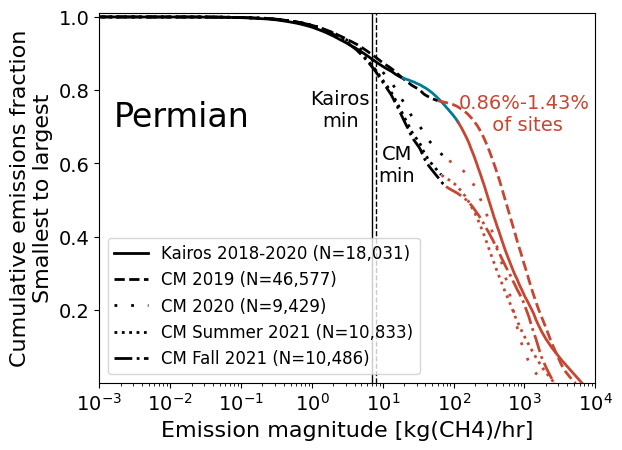

In [333]:
# Cumulative emissions Permian

ax = plt.gca()
# Main plot
plt.semilogx(kairosPermian.loc[kairosPermian['Emission magnitude [kgh]'] <= KairosPermianMinDetect, 'Emission magnitude [kgh]'], kairosPermian.loc[kairosPermian['Emission magnitude [kgh]'] <= KairosPermianMinDetect, 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[0], linestyle='solid')
plt.semilogx(CMPermian2019.loc[CMPermian2019['Emission magnitude [kgh]'] <= CMPermianMinDetect2019, 'Emission magnitude [kgh]'], CMPermian2019.loc[CMPermian2019['Emission magnitude [kgh]'] <= CMPermianMinDetect2019, 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[0], linestyle='dashed')
plt.semilogx(CMPermian2020.loc[CMPermian2020['Emission magnitude [kgh]'] <= CMPermianMinDetect2020, 'Emission magnitude [kgh]'], CMPermian2020.loc[CMPermian2020['Emission magnitude [kgh]'] <= CMPermianMinDetect2020, 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[0], linestyle=(0, (1, 5)))
plt.semilogx(CMPermian2021Summer.loc[CMPermian2021Summer['Emission magnitude [kgh]'] <= CMPermianMinDetectSummer2021, 'Emission magnitude [kgh]'], CMPermian2021Summer.loc[CMPermian2021Summer['Emission magnitude [kgh]'] <= CMPermianMinDetectSummer2021, 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[0], linestyle='dotted')
plt.semilogx(CMPermian2021Fall.loc[CMPermian2021Fall['Emission magnitude [kgh]'] <= CMPermianMinDetectFall2021, 'Emission magnitude [kgh]'], CMPermian2021Fall.loc[CMPermian2021Fall['Emission magnitude [kgh]'] <= CMPermianMinDetectFall2021, 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[0], linestyle='dashdot')
plt.semilogx(kairosPermian.loc[(kairosPermian['Emission magnitude [kgh]'] >= KairosPermianMinDetect) & (kairosPermian['Emission magnitude [kgh]'] <= KairosFullDetect), 'Emission magnitude [kgh]'], kairosPermian.loc[(kairosPermian['Emission magnitude [kgh]'] >= KairosPermianMinDetect) & (kairosPermian['Emission magnitude [kgh]'] <= KairosFullDetect), 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[1], linestyle='solid')
plt.semilogx(kairosPermian.loc[kairosPermian['Emission magnitude [kgh]'] >= KairosFullDetect, 'Emission magnitude [kgh]'], kairosPermian.loc[kairosPermian['Emission magnitude [kgh]'] >= KairosFullDetect, 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[2], linestyle='solid')
plt.semilogx(CMPermian2019.loc[CMPermian2019['Emission magnitude [kgh]'] >= CMPermianMinDetect2019, 'Emission magnitude [kgh]'], CMPermian2019.loc[CMPermian2019['Emission magnitude [kgh]'] >= CMPermianMinDetect2019, 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[2], linestyle='dashed')
plt.semilogx(CMPermian2020.loc[CMPermian2020['Emission magnitude [kgh]'] >= CMPermianMinDetect2020, 'Emission magnitude [kgh]'], CMPermian2020.loc[CMPermian2020['Emission magnitude [kgh]'] >= CMPermianMinDetect2020, 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[2], linestyle=(0, (1, 5)))
plt.semilogx(CMPermian2021Summer.loc[CMPermian2021Summer['Emission magnitude [kgh]'] >= CMPermianMinDetectSummer2021, 'Emission magnitude [kgh]'], CMPermian2021Summer.loc[CMPermian2021Summer['Emission magnitude [kgh]'] >= CMPermianMinDetectSummer2021, 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[2], linestyle='dotted')
plt.semilogx(CMPermian2021Fall.loc[CMPermian2021Fall['Emission magnitude [kgh]'] >= CMPermianMinDetectFall2021, 'Emission magnitude [kgh]'], CMPermian2021Fall.loc[CMPermian2021Fall['Emission magnitude [kgh]'] >= CMPermianMinDetectFall2021, 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[2], linestyle='dashdot')

# Min detected
plt.axvline(KairosPermianMinDetected, color=colors[0], linestyle="-", lw=1, label="Kairos min detected")
plt.axvline(np.min([CMPermianMinDetected2020, CMPermianMinDetected2019, CMPermianMinDetectedSummer2021, CMPermianMinDetectedFall2021]), color=colors[0], linestyle="--", lw=1, label="CM min detected")
plt.text(10**1.2, 0.55, 'CM\nmin', size=14, color='black', rotation=0, ha='center')
plt.text(10**0.4, 0.7, 'Kairos\nmin', size=14, color='black', rotation=0, ha='center')

# Fraction sites emitting
plt.text(10**3, 0.69, str("{:.2%}".format(np.min([KairosPermianFracEmitting, CMPermianFracEmitting2019, CMPermianFracEmittingSummer2021, CMPermianFracEmittingFall2021]))) + '-' + "{:.2%}".format(np.max([KairosPermianFracEmitting, CMPermianFracEmitting2019, CMPermianFracEmittingSummer2021, CMPermianFracEmittingFall2021])) + '\n of sites', size=14, color=colors[2], rotation=0, ha='center')

# plt.semilogx(CMPermian2019['Emission magnitude [kgh]'], CMPermian2019['Cumulative emissions fraction [%]'], linewidth=2, color="black")
# plt.semilogx(CMPermian2021Summer['Emission magnitude [kgh]'], CMPermian2021Summer['Cumulative emissions fraction [%]'], linewidth=2, color="black")
# plt.semilogx(CMPermian2021Fall['Emission magnitude [kgh]'], CMPermian2021Fall['Cumulative emissions fraction [%]'], linewidth=2, color="black")
# ax.axvline(KairosMinDetect, color="saddlebrown", linestyle="--", lw=2, label="Kairos min detect")
# ax.axvline(KairosFullDetect, color="saddlebrown", linestyle="--", lw=2, label="Kairos full detect")
plt.legend(['Kairos 2018-2020 (N=' + '{:,.0f}'.format(KairosPermianWellVisits) + ')',
            'CM 2019 (N=' + '{:,.0f}'.format(CMPermianWellVisits2019) + ')',
            'CM 2020 (N=' + '{:,.0f}'.format(CMPermianWellVisits2020) + ')',
            'CM Summer 2021 (N=' + '{:,.0f}'.format(CMPermianWellVisitsFall2021) + ')',
            'CM Fall 2021 (N=' + '{:,.0f}'.format(CMPermianWellVisitsSummer2021) + ')'],
           loc='lower left', fontsize=12)
ax.set_ylim(0.001, 1.01)
ax.set_xlim(10**-3, 10**4)
plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
plt.ylabel('Cumulative emissions fraction\nSmallest to largest', size=16)
plt.text(10**-2.8, 0.7, 'Permian', fontsize=24, color='black', rotation=0, ha='left')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# plt.savefig('Permian distribution 20221022.pdf', format='pdf', bbox_inches="tight")
plt.show()

In [ ]:
np.min([CAFracEmitting2016, CAFracEmitting2017, CAFracEmitting2020COVID, CAFracEmitting2020, CAFracEmitting2021])

In [ ]:
# Cumulative emissions San Joaquin

ax = plt.gca()
# plt.semilogx(CMCA20162017['Emission magnitude [kgh]'], CMCA20162017['Cumulative emissions fraction [%]'], linewidth=2, color="black")

# Main plot
plt.semilogx(CMCA2020COVID.loc[CMCA2020COVID['Emission magnitude [kgh]'] <= CAMinDetect2020COVID, 'Emission magnitude [kgh]'], CMCA2020COVID.loc[CMCA2020COVID['Emission magnitude [kgh]'] <= CAMinDetect2020COVID, 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[0], linestyle='solid')
plt.semilogx(CMCA2017.loc[CMCA2017['Emission magnitude [kgh]'] <= CAMinDetect2017, 'Emission magnitude [kgh]'], CMCA2017.loc[CMCA2017['Emission magnitude [kgh]'] <= CAMinDetect2017, 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[0], linestyle=(0, (1, 5)))
plt.semilogx(CMCA2016.loc[CMCA2016['Emission magnitude [kgh]'] <= CAMinDetect2016, 'Emission magnitude [kgh]'], CMCA2016.loc[CMCA2016['Emission magnitude [kgh]'] <= CAMinDetect2016, 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[0], linestyle="dotted")
plt.semilogx(CMCA2021.loc[CMCA2021['Emission magnitude [kgh]'] <= CAMinDetect2021, 'Emission magnitude [kgh]'], CMCA2021.loc[CMCA2021['Emission magnitude [kgh]'] <= CAMinDetect2021, 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[0], linestyle="dashdot")
plt.semilogx(CMCA2020.loc[CMCA2020['Emission magnitude [kgh]'] <= CAMinDetect2020, 'Emission magnitude [kgh]'], CMCA2020.loc[CMCA2020['Emission magnitude [kgh]'] <= CAMinDetect2020, 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[0], linestyle="dashed")
# plt.semilogx(CMCA20162017.loc[CMCA20162017['Emission magnitude [kgh]'] <= CAMinDetect20162017, 'Emission magnitude [kgh]'], CMCA20162017.loc[CMCA20162017['Emission magnitude [kgh]'] <= CAMinDetect20162017, 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[0], linestyle="solid")
# plt.semilogx(CMCA20162017.loc[CMCA20162017['Emission magnitude [kgh]'] >= CAMinDetect20162017, 'Emission magnitude [kgh]'], CMCA20162017.loc[CMCA20162017['Emission magnitude [kgh]'] >= CAMinDetect20162017, 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[2], linestyle="solid")
plt.semilogx(CMCA2020COVID.loc[CMCA2020COVID['Emission magnitude [kgh]'] >= CAMinDetect2020COVID, 'Emission magnitude [kgh]'], CMCA2020COVID.loc[CMCA2020COVID['Emission magnitude [kgh]'] >= CAMinDetect2020COVID, 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[2], linestyle='solid')
plt.semilogx(CMCA2017.loc[CMCA2017['Emission magnitude [kgh]'] >= CAMinDetect2017, 'Emission magnitude [kgh]'], CMCA2017.loc[CMCA2017['Emission magnitude [kgh]'] >= CAMinDetect2017, 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[2], linestyle=(0, (1, 5)))
plt.semilogx(CMCA2016.loc[CMCA2016['Emission magnitude [kgh]'] >= CAMinDetect2016, 'Emission magnitude [kgh]'], CMCA2016.loc[CMCA2016['Emission magnitude [kgh]'] >= CAMinDetect2016, 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[2], linestyle="dotted")
plt.semilogx(CMCA2021.loc[CMCA2021['Emission magnitude [kgh]'] >= CAMinDetect2021, 'Emission magnitude [kgh]'], CMCA2021.loc[CMCA2021['Emission magnitude [kgh]'] >= CAMinDetect2021, 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[2], linestyle="dashdot")
plt.semilogx(CMCA2020.loc[CMCA2020['Emission magnitude [kgh]'] >= CAMinDetect2020, 'Emission magnitude [kgh]'], CMCA2020.loc[CMCA2020['Emission magnitude [kgh]'] >= CAMinDetect2020, 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[2], linestyle="dashed")

# Min detected
plt.axvline(np.min([CAMinDetected2016, CAMinDetected2017, CAMinDetected2020COVID, CAMinDetected2020, CAMinDetected2021]), color=colors[0], linestyle="--", lw=1, label="CM min detected")
plt.text(10**1.3, 0.8, 'CM\nmin', size=14, color='black', rotation=0, ha='center')

# Fraction sites emitting
plt.text(10**2.9, 0.57, str("{:.2%}".format(np.min([CAFracEmitting2016, CAFracEmitting2017, CAFracEmitting2020COVID, CAFracEmitting2020, CAFracEmitting2021]))) + '-' + str("{:.2%}".format(np.max([CAFracEmitting2016, CAFracEmitting2017, CAFracEmitting2020COVID, CAFracEmitting2020, CAFracEmitting2021]))) + '\n of sites', size=14, color=colors[2], rotation=0, ha='center')

# plt.semilogx(CMCA2020COVID['Emission magnitude [kgh]'], CMCA2020COVID['Cumulative emissions fraction [%]'], linewidth=2, color="black")
# plt.semilogx(CMCA2020['Emission magnitude [kgh]'], CMCA2020['Cumulative emissions fraction [%]'], linewidth=2, color="black")
# plt.semilogx(CMCA2021['Emission magnitude [kgh]'], CMCA2021['Cumulative emissions fraction [%]'], linewidth=2, color="black")
# ax.axvline(KairosMinDetect, color="saddlebrown", linestyle="--", lw=2, label="Kairos min detect")
# ax.axvline(KairosFullDetect, color="saddlebrown", linestyle="--", lw=2, label="Kairos full detect")
ax.set_ylim(0.001, 1.01)
ax.set_xlim(10**-3, 10**4)
plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
plt.ylabel('Cumulative emissions fraction\nSmallest to largest', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['CM Summer 2020 (N=' + '{:,.0f}'.format(CAWellVisits2020COVID) + ')',
            'CM 2017 (N=' + '{:,.0f}'.format(CAWellVisits2017) + ')',
            'CM 2016 (N=' + '{:,.0f}'.format(CAWellVisits2016) + ')',
            'CM Fall 2021 (N=' + '{:,.0f}'.format(CAWellVisits2021) + ')',
            'CM Fall 2020 (N=' + '{:,.0f}'.format(CAWellVisits2020) + ')'],
            loc='lower left', fontsize=12) # 'CM 2016-2017 (N=' + '{:,.0f}'.format(CAWellVisits20162017) + ')',

plt.text(10**-2.8, 0.6, 'San Joaquin', fontsize=24, color='black', rotation=0, ha='left')

plt.savefig('San Joaquin distribution 20221022.pdf', format='pdf', bbox_inches="tight")
# plt.show()


In [ ]:
# Cumulative emissions DJ

ax = plt.gca()

# Main plot
plt.semilogx(CMDJ2021Summer.loc[CMDJ2021Summer['Emission magnitude [kgh]'] <= DJMinDetectSummer2021, 'Emission magnitude [kgh]'], CMDJ2021Summer.loc[CMDJ2021Summer['Emission magnitude [kgh]'] <= DJMinDetectSummer2021, 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[0], linestyle=(5, (2, 5)))
plt.semilogx(CMDJ2021Fall.loc[CMDJ2021Fall['Emission magnitude [kgh]'] <= DJMinDetectFall2021, 'Emission magnitude [kgh]'], CMDJ2021Fall.loc[CMDJ2021Fall['Emission magnitude [kgh]'] <= DJMinDetectFall2021, 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[0], linestyle=(1, (1, 5)))
plt.semilogx(CMDJ2021Summer.loc[CMDJ2021Summer['Emission magnitude [kgh]'] >= DJMinDetectSummer2021, 'Emission magnitude [kgh]'], CMDJ2021Summer.loc[CMDJ2021Summer['Emission magnitude [kgh]'] >= DJMinDetectSummer2021, 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[2], linestyle=(5, (2, 5)))
plt.semilogx(CMDJ2021Fall.loc[CMDJ2021Fall['Emission magnitude [kgh]'] >= DJMinDetectFall2021, 'Emission magnitude [kgh]'], CMDJ2021Fall.loc[CMDJ2021Fall['Emission magnitude [kgh]'] >= DJMinDetectFall2021, 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[2], linestyle=(1, (1, 5)))

# Min detected
plt.axvline(np.min([DJMinDetectedSummer2021, DJMinDetectedFall2021]), color=colors[0], linestyle="--", lw=1, label="CM min detected")
plt.text(10**1.35, 0.8, 'CM\nmin', size=14, color='black', rotation=0, ha='center')

# Fraction sites emitting
plt.text(10**2.9, 0.15, str("{:.2%}".format(np.min([DJFracEmittingSummer2021, DJFracEmittingFall2021]))) + '-' + str("{:.2%}".format(np.max([DJFracEmittingSummer2021, DJFracEmittingFall2021]))) + '\n of sites', size=14, color=colors[2], rotation=0, ha='center')

# plt.semilogx(CMDJ2021Summer['Emission magnitude [kgh]'], CMDJ2021Summer['Cumulative emissions fraction [%]'], linewidth=2, color="black")
# plt.semilogx(CMDJ2021Fall['Emission magnitude [kgh]'], CMDJ2021Fall['Cumulative emissions fraction [%]'], linewidth=2, color="black")
# ax.axvline(KairosMinDetect, color="saddlebrown", linestyle="--", lw=2, label="Kairos min detect")
# ax.axvline(KairosFullDetect, color="saddlebrown", linestyle="--", lw=2, label="Kairos full detect")
ax.set_ylim(0.001, 1.01)
ax.set_xlim(10**-3, 10**4)
plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
plt.ylabel('Cumulative emissions fraction\nSmallest to largest', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['CM Fall 2021 (N=' + '{:,.0f}'.format(DJWellVisitsFall2021) + ')',
            'CM Summer 2021 (N=' + '{:,.0f}'.format(DJWellVisitsSummer2021) + ')'],
           loc='lower left', fontsize=12)
plt.text(10**-2.8, 0.5, 'Denver-\nJulesburg', fontsize=24, color='black', rotation=0, ha='left')

plt.savefig('DJ distribution 20221022.pdf', format='pdf', bbox_inches="tight")
# plt.show()

In [ ]:
# Cumulative emissions Appalachia

ax = plt.gca()

# AVIRISMinDetect
plt.semilogx(CMAppalachia2021.loc[CMAppalachia2021['Emission magnitude [kgh]'] < AppalachiaMinDetect, 'Emission magnitude [kgh]'], CMAppalachia2021.loc[CMAppalachia2021['Emission magnitude [kgh]'] < AppalachiaMinDetect,'Cumulative emissions fraction [%]'], linewidth=2, color=colors[0])
plt.semilogx(CMAppalachia2021.loc[CMAppalachia2021['Emission magnitude [kgh]'] >= AppalachiaMinDetect, 'Emission magnitude [kgh]'], CMAppalachia2021.loc[CMAppalachia2021['Emission magnitude [kgh]'] >= AppalachiaMinDetect,'Cumulative emissions fraction [%]'], linewidth=2, color=colors[2])

# Min detected
plt.axvline(AppalachiaMinDetected, color=colors[0], linestyle="--", lw=1, label="CM min detected")
plt.text(10**2.3, 0.85, 'CM\nmin', size=14, color='black', rotation=0, ha='center')

# Fraction sites emitting
plt.text(10**2.8, 0.15, str("{:.2%}".format(AppalachiaFracEmitting)) + '\n of sites', size=14, color=colors[2], rotation=0, ha='center')

# ax.axvline(KairosMinDetect, color="saddlebrown", linestyle="--", lw=2, label="Kairos min detect")
# ax.axvline(KairosFullDetect, color="saddlebrown", linestyle="--", lw=2, label="Kairos full detect")
ax.set_ylim(0.001, 1.01)
ax.set_xlim(10**-3, 10**4)
plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
plt.ylabel('Cumulative emissions fraction\nSmallest to largest', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['CM 2021 (N=' + '{:,.0f}'.format(AppalachiaWellVisits) + ')'],
           loc='lower left', fontsize=12)
plt.text(10**-2.8, 0.7, 'Pennsylvania', fontsize=24, color='black', rotation=0, ha='left')

plt.savefig('Pennsylvania distribution 20221022.pdf', format='pdf', bbox_inches="tight")
# plt.show()

In [ ]:
# Cumulative emissions Uinta

ax = plt.gca()

# Main plot
plt.semilogx(CMUinta2020.loc[CMUinta2020['Emission magnitude [kgh]'] <= UintaMinDetect+0.01, 'Emission magnitude [kgh]'], CMUinta2020.loc[CMUinta2020['Emission magnitude [kgh]'] <= UintaMinDetect+0.001, 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[0], linestyle="solid")
plt.semilogx(CMUinta2020.loc[CMUinta2020['Emission magnitude [kgh]'] >= UintaMinDetect-0.01, 'Emission magnitude [kgh]'], CMUinta2020.loc[CMUinta2020['Emission magnitude [kgh]'] >= UintaMinDetect-0.001, 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[2], linestyle="solid")
plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
plt.ylabel('Cumulative emissions fraction\nSmallest to largest', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_ylim(0.001, 1.01)
ax.set_xlim(10**-3, 10**4)
plt.legend(['CM 2020 (N=' + '{:,.0f}'.format(UintaWellVisits) + ')'],
           loc='lower left', fontsize=12)
plt.text(10**-2.8, 0.7, 'Uinta', fontsize=24, color='black', rotation=0, ha='left')

# Min detected
plt.axvline(UintaMinDetected, color=colors[0], linestyle="--", lw=1, label="CM min detected")
plt.text(10**1.2, 0.681, 'CM\nmin', size=14, color='black', rotation=0, ha='center')

# Fraction sites emitting
plt.text(10**3.2, 0.23, str("{:.2%}".format(UintaFracEmitting)) + '\n of sites', size=14, color=colors[2], rotation=0, ha='center')

# plt.semilogx(CMUinta2020['Emission magnitude [kgh]'], CMUinta2020['Cumulative emissions fraction [%]'], linewidth=2, color="black")
# ax.axvline(KairosMinDetect, color="saddlebrown", linestyle="--", lw=2, label="Kairos min detect")
# ax.axvline(KairosFullDetect, color="saddlebrown", linestyle="--", lw=2, label="Kairos full detect")
plt.savefig('Uinta distribution 20221022.pdf', format='pdf', bbox_inches="tight")
# plt.show()

In [ ]:
# Cumulative emissions Fort Worth

ax = plt.gca()

# Main plot
plt.semilogx(KairosBarnett.loc[KairosBarnett['Emission magnitude [kgh]'] <= BarnettMinDetect, 'Emission magnitude [kgh]'], KairosBarnett.loc[KairosBarnett['Emission magnitude [kgh]'] <= BarnettMinDetect, 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[0], linestyle="solid")
plt.semilogx(KairosBarnett.loc[(KairosBarnett['Emission magnitude [kgh]'] >= BarnettMinDetect) & (KairosBarnett['Emission magnitude [kgh]'] <= KairosFullDetect), 'Emission magnitude [kgh]'], KairosBarnett.loc[(KairosBarnett['Emission magnitude [kgh]'] >= BarnettMinDetect) & (KairosBarnett['Emission magnitude [kgh]'] <= KairosFullDetect), 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[1], linestyle='solid')
plt.semilogx(KairosBarnett.loc[KairosBarnett['Emission magnitude [kgh]'] >= KairosFullDetect, 'Emission magnitude [kgh]'], KairosBarnett.loc[KairosBarnett['Emission magnitude [kgh]'] >= KairosFullDetect, 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[2], linestyle="solid")
plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
plt.ylabel('Cumulative emissions fraction\nSmallest to largest', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_ylim(0.001, 1.01)
ax.set_xlim(10**-3, 10**4)
plt.legend(['Kairos 2021 (N=' + '{:,.0f}'.format(BarnettWellVisits) + ')'],
           loc='lower left', fontsize=12)
plt.text(10**-2.4, 0.7, 'Fort Worth', fontsize=24, color='black', rotation=0, ha='left')

# Min detected
plt.axvline(BarnettMinDetected, color=colors[0], linestyle="--", lw=1, label="CM min detected")
plt.text(10**1.55, 0.87, 'Kairos\nmin', size=14, color='black', rotation=0, ha='center')

# Fraction sites emitting
plt.text(10**3.2, 0.35, str("{:.2%}".format(BarnettFracEmitting)) + '\n of sites', size=14, color=colors[2], rotation=0, ha='center')

# plt.semilogx(CMUinta2020['Emission magnitude [kgh]'], CMUinta2020['Cumulative emissions fraction [%]'], linewidth=2, color="black")
# ax.axvline(KairosMinDetect, color="saddlebrown", linestyle="--", lw=2, label="Kairos min detect")
# ax.axvline(KairosFullDetect, color="saddlebrown", linestyle="--", lw=2, label="Kairos full detect")
plt.savefig('Fort Worth distribution 20221022.pdf', format='pdf', bbox_inches="tight")
# plt.show()

In [ ]:
# surveyStats
surveyStats_to_include = surveyStatsByVisit.set_index("Basin/Campaign")
surveyStats_to_include = surveyStats_to_include.loc[campaigns_to_include]
surveyStats_to_include

In [ ]:
len(fractionalLossPlot.patches)
# hatches = np.append(surveyStats_to_include["High prod"], np.append(surveyStats_to_include["High prod"], np.append(np.append(surveyStats_to_include["High prod"],(surveyStats_to_include["High prod"])),(surveyStats_to_include["High prod"]))))
# hatches
# fractionalLossDF.plot(kind='bar', stacked=True, color=colors[[0,1,2,3,4]], yerr=errorbars, ax=ax)
# errorbars = np.concatenate((np.zeros([6, fractionalLossDF.index.size]), 100*fractionalLossDF[['FracLossP2.5', 'FracLossP97.5']].transpose().to_numpy()), axis=0)
# fractionalLossDF.plot(kind='bar', stacked=True, yerr=errorbars, ax=ax)
# plt.show()
# errorbars

In [ ]:
# surveyStats_to_include['High prod']
# fractionalLossDF
high_productivity_col = fractionalLossDF["High prod"].transpose().to_numpy()# high_productivity_col
alpha_productivity = np.repeat(high_productivity_col, 6, axis=0).reshape((16,6)).transpose()
# alpha_productivity = np.concatenate()
# alpha_productivity.shape
alpha_productivity
# errorbars.shape, alpha_productivity.shape
# np.concatenate((np.zeros([7, fractionalLossDF.index.size]), 100*fractionalLossDF[['FracLossP2.5', 'FracLossP97.5']].transpose().to_numpy()), axis=0)
fractionalLossDF

In [ ]:

ax = plt.gca()
campaigns_to_include = ["Kairos Permian","Permian/2019","Permian/2020","Permian/Summer 2021",
                        "Permian/Fall 2021","San Joaquin/2016","San Joaquin/2017",
                        "San Joaquin/COVID 2020","San Joaquin/2020","San Joaquin/Fall 2021",
                        "DJ/Fall 2021", "DJ/Summer 2021", "Appalachia/2021", "Uinta/2020",
                        "Kairos Barnett", "GHGI 2022 (for 2020)"]
comprehensive_campaign = ["Kairos Permian","Permian/2019","San Joaquin/2016","San Joaquin/2017",
                        "San Joaquin/COVID 2020","San Joaquin/2020","San Joaquin/Fall 2021",
                        "DJ/Fall 2021", "DJ/Summer 2021", "Uinta/2020",
                        "Kairos Barnett", "GHGI 2022 (for 2020)"]
high_productivity_campaign = ["Permian/2020","Permian/Summer 2021",
                        "Permian/Fall 2021", "Appalachia/2021"]
surveyStats_to_include = surveyStats.set_index("Basin/Campaign")
# surveyStats_to_include = surveyStatsByVisit.set_index("Basin/Campaign")
# surveyStats_to_include = surveyStatsNoStrat.set_index("Basin/Campaign")

surveyStats_to_include = surveyStats_to_include.loc[campaigns_to_include]
# surveyStats_to_include = surveyStats.loc[surveyStats["Basin/Campaign"] != "San Joaquin/2016-2017"]
# surveyStats_to_include = surveyStatsByVisit.loc[surveyStatsByVisit["Basin/Campaign"] != "San Joaquin/2016-2017"]
# surveyStats_to_include = surveyStatsNoStrat.loc[surveyStatsNoStrat["Basin/Campaign"] != "San Joaquin/2016-2017"]
# High prod

# fractionalLossDF = surveyStats_to_include.loc[:, ["Methane fractional loss simulation", "Methane fractional loss partial", "Methane fractional loss aerial", "High prod", 'FracLossP2.5', 'FracLossP97.5']]
fractionalLossDF = surveyStats_to_include.loc[:, ["Methane fractional loss simulation", "Methane fractional loss partial", "Methane fractional loss aerial", "FracLossMidGHGI", "FracLossMidPartial", "FracLossMid", 'FracLossP2.5', 'FracLossP97.5']]
# fractionalLossDF.loc[:, ["Methane fractional loss simulation", "Methane fractional loss partial", "Methane fractional loss aerial"]] = 100*fractionalLossDF.loc[:, ["Methane fractional loss simulation", "Methane fractional loss partial", "Methane fractional loss aerial"]]
fractionalLossDF.loc[:, ["Methane fractional loss simulation", "Methane fractional loss partial", "Methane fractional loss aerial", "FracLossMidGHGI", "FracLossMidPartial", "FracLossMid"]] = 100*fractionalLossDF.loc[:, ["Methane fractional loss simulation", "Methane fractional loss partial", "Methane fractional loss aerial", "FracLossMidGHGI", "FracLossMidPartial", "FracLossMid"]]
fractionalLossDFHP = fractionalLossDF.copy()
fractionalLossDFHP.loc[high_productivity_campaign] = 0
# fractionalLossDFByVisit = 100*surveyStatsVisit.loc[campaigns_to_include, ["Methane fractional loss simulation", "Methane fractional loss partial", "Methane fractional loss aerial"]]
# fractionalLossDF.index = surveyStats_to_include["Basin/Campaign"]

errorbars = np.concatenate((np.zeros([7, fractionalLossDF.index.size]), 100*fractionalLossDF[['FracLossP2.5', 'FracLossP97.5']].transpose().to_numpy()), axis=0)
# high_productivity_col = fractionalLossDF["High prod"].transpose().to_numpy()
# alpha_productivity = np.concatenate(high_productivity_col, np.concatenate(high_productivity_col, np.concatenate(high_productivity_col, np.concatenate(np.concatenate(high_productivity_col,(high_productivity_col)),(high_productivity_col)))))
# high_productivity_col = fractionalLossDF["High prod"].transpose().to_numpy()# high_productivity_col
# alpha_productivity = np.repeat(high_productivity_col, 6, axis=0).reshape((16,6)).transpose()
fractionalLossPlot = fractionalLossDF.plot(kind='bar', stacked=True, color=colors[[0,1,2,0,1,2]], yerr=errorbars, error_kw=dict(ecolor='darkslategray'), ax=ax) # error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2)
# fractionalLossPlotHP = fractionalLossDFHP.plot(kind='bar', stacked=True, color=colors[[0,1,2,0,1,2]], alpha=0.7, yerr=errorbars, ax=ax) #, cmap=alpha_productivity
# fractionalLossPlotHP = fractionalLossDF.loc[high_productivity_campaign].plot(kind='bar', stacked=True, color=colors[[0,1,2,0,1,2]], alpha=0.5, ax=ax)
# plt.errorbar(mean=surveyStats_to_include['Methane fractional loss total'], yerr=surveyStats_to_include['FracLossP2.5', 'FracLossP97.5'].transpose().to_numpy())
plt.yticks(fontsize=14)
plt.ylabel('Methane loss [%]', size=16)

# # Set hatches
# hatches = np.concatenate(np.append(surveyStats_to_include["High prod"],(surveyStats_to_include["High prod"])),(surveyStats_to_include["High prod"]))
# hatches = np.append(surveyStats_to_include["High prod"], np.append(surveyStats_to_include["High prod"], np.append(surveyStats_to_include["High prod"], np.append(np.append(surveyStats_to_include["High prod"],(surveyStats_to_include["High prod"])),(surveyStats_to_include["High prod"])))))
# hatches = np.append(surveyStats_to_include["High prod"], np.append(surveyStats_to_include["High prod"], np.append(surveyStats_to_include["High prod"], np.append(np.append(surveyStats_to_include["High prod"],(surveyStats_to_include["High prod"])),(surveyStats_to_include["High prod"])))))
# midstream_hatches = np.array(['\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\'])                                                                                                                                                     # 'midstream_hatches = np.array('\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\',midstream_hatches = np.array(['\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\','\\\\'])
midstream_hatches = np.array(['///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///','///'])

hatches =  np.append(np.zeros(fractionalLossDF.shape[0]*3) == 1, midstream_hatches)
for patch, hatch in zip(fractionalLossPlot.patches, hatches):
   patch.set_hatch(hatch)
for patch in np.arange(len(fractionalLossPlot.patches)):
    if (patch % 16 == 2) | (patch % 16 == 3) | (patch % 16 == 4) | (patch % 16 == 12):
        fractionalLossPlot.patches[patch].set_alpha(0.5)

# for patch, hatch in zip(fractionalLossPlotHP.patches, hatches):
#    patch.set_hatch(hatch)
#    patch.set_alpha(1)
plt.rcParams['hatch.linewidth'] = 1.5 # 1.5
plt.rcParams['hatch.color'] = 'white'

plt.xlabel('')
# plt.ylim(0, 6)
plt.ylim(0, 11)
# fractionalLossPlot.set_xticklabels(fractionalLossPlot.get_xticklabels(), fontsize=14, rotation=45, horizontalalignment='right', rotation_mode='anchor')
fractionalLossPlot.set_xticklabels(['Kairos 2018-2020', 'CM 2019', 'CM 2020', 'CM Summer 2021', 'CM Fall 2021', 'CM 2016', 'CM 2017', 'CM Summer 2020', 'CM Fall 2020', 'CM Fall 2021', 'CM Fall 2021', 'CM Summer 2021', 'CM 2021', 'CM 2020', 'Kairos 2021', 'EPA GHGI 2020'], fontsize=12, rotation=45, horizontalalignment='right', rotation_mode='anchor')
# letterheight = 5.6
letterheight = 10.3
plt.text(0.07, letterheight, 'NM', fontsize=14, color='black', rotation=0, ha='center') # -63
plt.text(2.5, letterheight, 'Permian', fontsize=14, color='black', rotation=0, ha='center') # -63
plt.text(6.8, letterheight, 'San Joaquin', fontsize=14, color='black', rotation=0, ha='center') # -70
plt.text(10.5, letterheight, 'DJ', fontsize=14, color='black', rotation=0, ha='center') # -64
plt.text(12, letterheight, 'PA', fontsize=14, color='black', rotation=0, ha='center') # -68
plt.text(13, letterheight, 'U', fontsize=14, color='black', rotation=0, ha='center') # -55
plt.text(14.01, letterheight, 'FW', fontsize=14, color='black', rotation=0, ha='center') # -55
plt.text(15, letterheight, 'US', fontsize=14, color='black', rotation=0, ha='center') # -55
plt.axvline(0.6, ls='--', linewidth=1, color='black', ymin=-70)
plt.axvline(4.45, ls='-', linewidth=1, color='black', ymin=-70)
# plt.axvline(6.5, ls='-', linewidth=1, color='black', ymin=-70)
plt.axvline(9.55, ls='-', linewidth=1, color='black', ymin=-70)
plt.axvline(11.5, ls='-', linewidth=1, color='black', ymin=-70)
plt.axvline(12.5, ls='-', linewidth=1, color='black', ymin=-70)
plt.axvline(13.5, ls='-', linewidth=1, color='black', ymin=-70)
plt.axvline(14.5, ls='-', linewidth=1, color='black', ymin=-70)

# Add high-productivity indicators
# plt.plot(2, 3.4, "D", color=colors[4])
# plt.text(2, 3.2, 'HP', fontsize=15, color='black', rotation=0, ha='center')
# plt.text(3, 2.6, 'HP', fontsize=15, color='black', rotation=0, ha='center')
# plt.text(4, 2.6, 'HP', fontsize=15, color='black', rotation=0, ha='center')
# plt.text(12.05, 1.5, 'HP', fontsize=15, color='black', rotation=0, ha='center')
plt.legend([])
fractionalLossPlot.get_legend().remove()
plt.savefig('Loss rates 20221031b.pdf', format='pdf', bbox_inches="tight")
# plt.savefig('Loss rates by visit 20221018.pdf', format='pdf', bbox_inches="tight")
# plt.savefig('Loss rates no strat 20220919.pdf', format='pdf', bbox_inches="tight")
# plt.show()

In [ ]:
colors[[0,1,2,5,4]]
# surveyStats_to_include[['FracLossP2.5', 'FracLossP97.5']]
# plt.errorbar(x=surveyStats_to_include['Basin/Campaign'], y=surveyStats_to_include['Methane fractional loss total'], yerr=100*surveyStats_to_include[['FracLossP2.5', 'FracLossP97.5']].transpose().to_numpy())

Separate production distributions

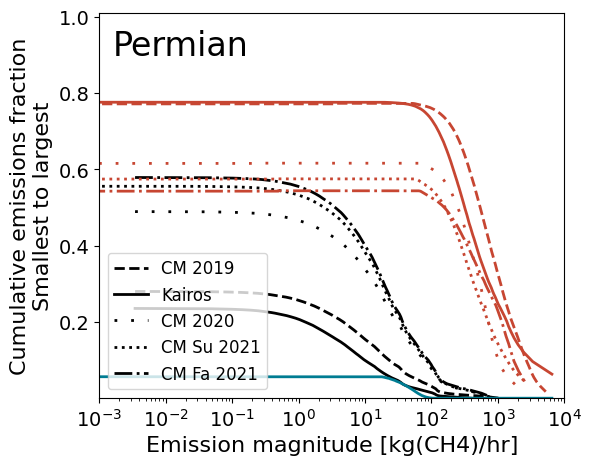

In [356]:
# Cumulative emissions Permian separate distributions

ax = plt.gca()
# Min detected
# plt.axvline(KairosPermianMinDetected, color=colors[0], linestyle="-", lw=1, label="Kairos min detected")
# plt.axvline(np.min([CMPermianMinDetected2020, CMPermianMinDetected2019, CMPermianMinDetectedSummer2021, CMPermianMinDetectedFall2021]), color=colors[0], linestyle="--", lw=1, label="CM min detected")
# plt.text(10**0.2, 0.55, 'CM min\n detected', size=14, color='black', rotation=0, ha='center')
# plt.text(10**2.2, 0.86, 'Kairos\n min detected', size=14, color='black', rotation=0, ha='center')

# Fraction sites emitting
# plt.text(10**3, 0.69, str("{:.2%}".format(np.min([CMPermianFracEmitting2019, CMPermianFracEmittingSummer2021, CMPermianFracEmittingFall2021]))) + '-' + str("{:.2%}".format(KairosPermianFracEmitting)) + '\n of sites', size=14, color=colors[2], rotation=0, ha='center')

# Main plot
# plt.semilogx(kairosPermian['Emission magnitude Rutherford [kgh]'], kairosPermian['Cumulative simulated emissions [kgh]'], linewidth=2, color=colors[0], linestyle='solid')
# plt.semilogx(CMPermian2019['Emission magnitude Rutherford [kgh]'], CMPermian2019['Cumulative simulated emissions [kgh]'], linewidth=2, color=colors[0], linestyle='dashed')
# plt.semilogx(CMPermian2020['Emission magnitude Rutherford [kgh]'], CMPermian2020['Cumulative simulated emissions [kgh]'], linewidth=2, color=colors[0], linestyle=(0, (1, 5)))
# plt.semilogx(CMPermian2021Summer['Emission magnitude Rutherford [kgh]'], CMPermian2021Summer['Cumulative simulated emissions [kgh]'], linewidth=2, color=colors[0], linestyle='dotted')
# plt.semilogx(CMPermian2021Fall['Emission magnitude Rutherford [kgh]'], CMPermian2021Fall['Cumulative simulated emissions [kgh]'], linewidth=2, color=colors[0], linestyle='dashdot')
# plt.semilogx(kairosPermian['Emission magnitude [kgh]'], kairosPermian['Cumulative partial emissions [kgh]'], linewidth=2, color=colors[1], linestyle='solid')
# plt.semilogx(kairosPermian['Emission magnitude [kgh]'], kairosPermian['Cumulative aerial emissions [kgh]'], linewidth=2, color=colors[2], linestyle='solid')
# plt.semilogx(CMPermian2019['Emission magnitude [kgh]'], CMPermian2019['Cumulative aerial emissions [kgh]'], linewidth=2, color=colors[2], linestyle='dashed')
# plt.semilogx(CMPermian2020['Emission magnitude [kgh]'], CMPermian2020['Cumulative aerial emissions [kgh]'], linewidth=2, color=colors[2], linestyle=(0, (1, 5)))
# plt.semilogx(CMPermian2021Summer['Emission magnitude [kgh]'], CMPermian2021Summer['Cumulative aerial emissions [kgh]'], linewidth=2, color=colors[2], linestyle='dotted')
# plt.semilogx(CMPermian2021Fall['Emission magnitude [kgh]'], CMPermian2021Fall['Cumulative aerial emissions [kgh]'], linewidth=2, color=colors[2], linestyle='dashdot')
plt.semilogx(CMPermian2019['Emission magnitude Rutherford [kgh]'], CMPermian2019['Cumulative emissions fraction Rutherford [%]'], linewidth=2, color=colors[0], linestyle='dashed')
plt.semilogx(kairosPermian['Emission magnitude Rutherford [kgh]'], kairosPermian['Cumulative emissions fraction Rutherford [%]'], linewidth=2, color=colors[0], linestyle='solid')
plt.semilogx(CMPermian2020['Emission magnitude Rutherford [kgh]'], CMPermian2020['Cumulative emissions fraction Rutherford [%]'], linewidth=2, color=colors[0], linestyle=(0, (1, 5)))
plt.semilogx(CMPermian2021Summer['Emission magnitude Rutherford [kgh]'], CMPermian2021Summer['Cumulative emissions fraction Rutherford [%]'], linewidth=2, color=colors[0], linestyle='dotted')
plt.semilogx(CMPermian2021Fall['Emission magnitude Rutherford [kgh]'], CMPermian2021Fall['Cumulative emissions fraction Rutherford [%]'], linewidth=2, color=colors[0], linestyle='dashdot')
plt.semilogx(CMPermian2019['Emission magnitude [kgh]'], CMPermian2019['Cumulative emissions fraction aerial [%]'], linewidth=2, color=colors[2], linestyle='dashed')
plt.semilogx(kairosPermian['Emission magnitude [kgh]'], kairosPermian['Cumulative emissions fraction partial [%]'], linewidth=2, color=colors[1], linestyle='solid')
plt.semilogx(kairosPermian['Emission magnitude [kgh]'], kairosPermian['Cumulative emissions fraction aerial [%]'], linewidth=2, color=colors[2], linestyle='solid')
plt.semilogx(CMPermian2020['Emission magnitude [kgh]'], CMPermian2020['Cumulative emissions fraction aerial [%]'], linewidth=2, color=colors[2], linestyle=(0, (1, 5)))
plt.semilogx(CMPermian2021Summer['Emission magnitude [kgh]'], CMPermian2021Summer['Cumulative emissions fraction aerial [%]'], linewidth=2, color=colors[2], linestyle='dotted')
plt.semilogx(CMPermian2021Fall['Emission magnitude [kgh]'], CMPermian2021Fall['Cumulative emissions fraction aerial [%]'], linewidth=2, color=colors[2], linestyle='dashdot')

# plt.semilogx(CMPermian2019['Emission magnitude [kgh]'], CMPermian2019['Cumulative emissions fraction [%]'], linewidth=2, color="black")
# plt.semilogx(CMPermian2021Summer['Emission magnitude [kgh]'], CMPermian2021Summer['Cumulative emissions fraction [%]'], linewidth=2, color="black")
# plt.semilogx(CMPermian2021Fall['Emission magnitude [kgh]'], CMPermian2021Fall['Cumulative emissions fraction [%]'], linewidth=2, color="black")
# ax.axvline(KairosMinDetect, color="saddlebrown", linestyle="--", lw=2, label="Kairos min detect")
# ax.axvline(KairosFullDetect, color="saddlebrown", linestyle="--", lw=2, label="Kairos full detect")
plt.legend(['CM 2019',
            'Kairos',
            'CM 2020',
            'CM Su 2021',
            'CM Fa 2021'],
           loc='lower left', fontsize=12)
ax.set_ylim(0.001, 1.01)
# ax.set_ylim(10**0, 10**6)
ax.set_xlim(10**-3, 10**4)
plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
plt.ylabel('Cumulative emissions fraction\nSmallest to largest', size=16)
plt.text(10**-2.8, 0.9, 'Permian', fontsize=24, color='black', rotation=0, ha='left')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# plt.savefig('Permian distribution separate 20221016b.pdf', format='pdf', bbox_inches="tight")
plt.show()

In [ ]:
# Cumulative emissions San Joaquin separate distributions

ax = plt.gca()
# plt.semilogx(CMCA20162017['Emission magnitude [kgh]'], CMCA20162017['Cumulative emissions fraction [%]'], linewidth=2, color="black")

# Min detected
# plt.axvline(np.min([CAMinDetected2016, CAMinDetected2017, CAMinDetected2020COVID, CAMinDetected2020, CAMinDetected2021]), color=colors[0], linestyle="--", lw=1, label="CM min detected")
# plt.text(10**1.9, 0.8, 'CM min\n detected', size=14, color='black', rotation=0, ha='center')

# Fraction sites emitting
# plt.text(10**2.9, 0.57, str("{:.2%}".format(np.min([CAFracEmitting2016, CAFracEmitting2017, CAFracEmitting2020COVID, CAFracEmitting2020, CAFracEmitting2021]))) + '-' + str("{:.2%}".format(np.max([CAFracEmitting2016, CAFracEmitting2017, CAFracEmitting2020COVID, CAFracEmitting2020, CAFracEmitting2021]))) + '\n of sites', size=14, color=colors[2], rotation=0, ha='center')

# Main plot
plt.semilogx(CMCA2020COVID['Emission magnitude [kgh]'], CMCA2020COVID['Cumulative emissions fraction Rutherford [%]'], linewidth=2, color=colors[0], linestyle='solid')
plt.semilogx(CMCA2016['Emission magnitude [kgh]'], CMCA2016['Cumulative emissions fraction Rutherford [%]'], linewidth=2, color=colors[0], linestyle="dotted")
plt.semilogx(CMCA2020['Emission magnitude [kgh]'], CMCA2020['Cumulative emissions fraction Rutherford [%]'], linewidth=2, color=colors[0], linestyle="dashed")
plt.semilogx(CMCA2017['Emission magnitude [kgh]'], CMCA2017['Cumulative emissions fraction Rutherford [%]'], linewidth=2, color=colors[0], linestyle=(0, (1, 5)))
plt.semilogx(CMCA2021['Emission magnitude [kgh]'], CMCA2021['Cumulative emissions fraction Rutherford [%]'], linewidth=2, color=colors[0], linestyle="dashdot")
# plt.semilogx(CMCA20162017.loc[CMCA20162017['Emission magnitude [kgh]'] >= CAMinDetect20162017, 'Emission magnitude [kgh]'], CMCA20162017.loc[CMCA20162017['Emission magnitude [kgh]'] >= CAMinDetect20162017, 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[2], linestyle="solid")
plt.semilogx(CMCA2020COVID['Emission magnitude [kgh]'], CMCA2020COVID['Cumulative emissions fraction aerial [%]'], linewidth=2, color=colors[2], linestyle='solid')
plt.semilogx(CMCA2016['Emission magnitude [kgh]'], CMCA2016['Cumulative emissions fraction aerial [%]'], linewidth=2, color=colors[2], linestyle="dotted")
plt.semilogx(CMCA2020['Emission magnitude [kgh]'], CMCA2020['Cumulative emissions fraction aerial [%]'], linewidth=2, color=colors[2], linestyle="dashed")
plt.semilogx(CMCA2017['Emission magnitude [kgh]'], CMCA2017['Cumulative emissions fraction aerial [%]'], linewidth=2, color=colors[2], linestyle=(0, (1, 5)))
plt.semilogx(CMCA2021['Emission magnitude [kgh]'], CMCA2021['Cumulative emissions fraction aerial [%]'], linewidth=2, color=colors[2], linestyle="dashdot")

# plt.semilogx(CMCA2020COVID['Emission magnitude [kgh]'], CMCA2020COVID['Cumulative emissions fraction [%]'], linewidth=2, color="black")
# plt.semilogx(CMCA2020['Emission magnitude [kgh]'], CMCA2020['Cumulative emissions fraction [%]'], linewidth=2, color="black")
# plt.semilogx(CMCA2021['Emission magnitude [kgh]'], CMCA2021['Cumulative emissions fraction [%]'], linewidth=2, color="black")
# ax.axvline(KairosMinDetect, color="saddlebrown", linestyle="--", lw=2, label="Kairos min detect")
# ax.axvline(KairosFullDetect, color="saddlebrown", linestyle="--", lw=2, label="Kairos full detect")
ax.set_ylim(0.001, 1.01)
ax.set_xlim(10**-3, 10**4)
plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
plt.ylabel('Cumulative emissions fraction\nSmallest to largest', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['CM Su 2020',
            'CM 2016',
            'CM Fa 2020',
            # 'CM 2016-2017 (N=' + '{:,.0f}'.format(CAWellVisits20162017) + ')',
            'CM 2017',
            'CM Fa 2021'],
           loc='lower left', fontsize=12)
plt.text(10**-2.8, 0.8, 'San Joaquin', fontsize=24, color='black', rotation=0, ha='left')

plt.savefig('San Joaquin distribution separate 20221016.pdf', format='pdf', bbox_inches="tight")
# plt.show()


In [ ]:
# Cumulative emissions DJ

ax = plt.gca()

# Min detected
# plt.axvline(np.min([DJMinDetectedSummer2021, DJMinDetectedFall2021]), color=colors[0], linestyle="--", lw=1, label="CM min detected")
# plt.text(10**1.7, 0.8, 'CM min\n detected', size=14, color='black', rotation=0, ha='center')

# Fraction sites emitting
# plt.text(10**2.9, 0.15, str("{:.2%}".format(np.min([DJFracEmittingSummer2021, DJFracEmittingFall2021]))) + '-' + str("{:.2%}".format(np.max([DJFracEmittingSummer2021, DJFracEmittingFall2021]))) + '\n of sites', size=14, color=colors[2], rotation=0, ha='center')

# Main plot
plt.semilogx(CMDJ2021Summer['Emission magnitude [kgh]'], CMDJ2021Summer['Cumulative emissions fraction Rutherford [%]'], linewidth=2, color=colors[0], linestyle=(5, (2, 5)))
plt.semilogx(CMDJ2021Fall['Emission magnitude [kgh]'], CMDJ2021Fall['Cumulative emissions fraction Rutherford [%]'], linewidth=2, color=colors[0], linestyle=(1, (1, 5)))
plt.semilogx(CMDJ2021Summer['Emission magnitude [kgh]'], CMDJ2021Summer['Cumulative emissions fraction aerial [%]'], linewidth=2, color=colors[2], linestyle=(5, (2, 5)))
plt.semilogx(CMDJ2021Fall['Emission magnitude [kgh]'], CMDJ2021Fall['Cumulative emissions fraction aerial [%]'], linewidth=2, color=colors[2], linestyle=(1, (1, 5)))

# plt.semilogx(CMDJ2021Summer['Emission magnitude [kgh]'], CMDJ2021Summer['Cumulative emissions fraction [%]'], linewidth=2, color="black")
# plt.semilogx(CMDJ2021Fall['Emission magnitude [kgh]'], CMDJ2021Fall['Cumulative emissions fraction [%]'], linewidth=2, color="black")
# ax.axvline(KairosMinDetect, color="saddlebrown", linestyle="--", lw=2, label="Kairos min detect")
# ax.axvline(KairosFullDetect, color="saddlebrown", linestyle="--", lw=2, label="Kairos full detect")
ax.set_ylim(0.001, 1.01)
ax.set_xlim(10**-3, 10**4)
plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
plt.ylabel('Cumulative emissions fraction\nSmallest to largest', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['CM Fa 2021',
            'CM Su 2021'],
           loc='lower left', fontsize=12)
plt.text(10**-2.8, 0.5, 'Denver-\nJulesburg', fontsize=24, color='black', rotation=0, ha='left')

plt.savefig('DJ distribution separate 20221016.pdf', format='pdf', bbox_inches="tight")
# plt.show()

In [ ]:
# Cumulative emissions Appalachia

ax = plt.gca()

# Min detected
# plt.axvline(AppalachiaMinDetected, color=colors[0], linestyle="--", lw=1, label="CM min detected")
# plt.text(10**2.8, 0.85, 'CM min\n detected', size=14, color='black', rotation=0, ha='center')

# Fraction sites emitting
# plt.text(10**2.8, 0.15, str("{:.2%}".format(AppalachiaFracEmitting)) + '\n of sites', size=14, color=colors[2], rotation=0, ha='center')

plt.semilogx(CMAppalachia2021['Emission magnitude [kgh]'], CMAppalachia2021['Cumulative emissions fraction Rutherford [%]'], linewidth=2, color=colors[0])
plt.semilogx(CMAppalachia2021['Emission magnitude [kgh]'], CMAppalachia2021['Cumulative emissions fraction aerial [%]'], linewidth=2, color=colors[2])
# ax.axvline(KairosMinDetect, color="saddlebrown", linestyle="--", lw=2, label="Kairos min detect")
# ax.axvline(KairosFullDetect, color="saddlebrown", linestyle="--", lw=2, label="Kairos full detect")
ax.set_ylim(0.001, 1.01)
ax.set_xlim(10**-3, 10**4)
plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
plt.ylabel('Cumulative emissions fraction\nSmallest to largest', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['CM 2021'],
           loc='lower left', fontsize=12)
plt.text(10**-2.8, 0.85, 'Pennsylvania', fontsize=24, color='black', rotation=0, ha='left')

plt.savefig('Pennsylvania distribution separate 20221016.pdf', format='pdf', bbox_inches="tight")
# plt.show()

In [ ]:
# Cumulative emissions Uinta

ax = plt.gca()

# Min detected
# plt.axvline(UintaMinDetected, color=colors[0], linestyle="--", lw=1, label="CM min detected")
# plt.text(10**2, 0.681, 'CM min\n detected', size=14, color='black', rotation=0, ha='center')

# Fraction sites emitting
# plt.text(10**3.2, 0.23, str("{:.2%}".format(UintaFracEmitting)) + '\n of sites', size=14, color=colors[2], rotation=0, ha='center')

# Main plot
plt.semilogx(CMUinta2020['Emission magnitude [kgh]'], CMUinta2020['Cumulative emissions fraction Rutherford [%]'], linewidth=2, color=colors[0], linestyle="solid")
plt.semilogx(CMUinta2020['Emission magnitude [kgh]'], CMUinta2020['Cumulative emissions fraction aerial [%]'], linewidth=2, color=colors[2], linestyle="solid")
plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
plt.ylabel('Cumulative emissions fraction\nSmallest to largest', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_ylim(0.001, 1.01)
ax.set_xlim(10**-3, 10**4)
plt.legend(['CM 2020'],
           loc='lower left', fontsize=12)
plt.text(10**-2.8, 0.7, 'Uinta', fontsize=24, color='black', rotation=0, ha='left')

# plt.semilogx(CMUinta2020['Emission magnitude [kgh]'], CMUinta2020['Cumulative emissions fraction [%]'], linewidth=2, color="black")
# ax.axvline(KairosMinDetect, color="saddlebrown", linestyle="--", lw=2, label="Kairos min detect")
# ax.axvline(KairosFullDetect, color="saddlebrown", linestyle="--", lw=2, label="Kairos full detect")
plt.savefig('Uinta distribution separate 20221016.pdf', format='pdf', bbox_inches="tight")
# plt.show()

In [ ]:
# Cumulative emissions Fort Worth

ax = plt.gca()

# Min detected
# plt.axvline(BarnettMinDetected, color=colors[0], linestyle="--", lw=1, label="CM min detected")
# plt.text(10**2.9, 0.8, 'Kairos\n min detected', size=14, color='black', rotation=0, ha='center')

# Fraction sites emitting
# plt.text(10**3.2, 0.35, str("{:.2%}".format(BarnettFracEmitting)) + '\n of sites', size=14, color=colors[2], rotation=0, ha='center')

# Main plot
plt.semilogx(KairosBarnett['Emission magnitude [kgh]'], KairosBarnett['Cumulative emissions fraction Rutherford [%]'], linewidth=2, color=colors[0], linestyle="solid")
plt.semilogx(KairosBarnett['Emission magnitude [kgh]'], KairosBarnett['Cumulative emissions fraction partial [%]'], linewidth=2, color=colors[1], linestyle='solid')
plt.semilogx(KairosBarnett['Emission magnitude [kgh]'], KairosBarnett['Cumulative emissions fraction aerial [%]'], linewidth=2, color=colors[2], linestyle="solid")
plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
plt.ylabel('Cumulative emissions fraction\nSmallest to largest', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_ylim(0.001, 1.01)
ax.set_xlim(10**-3, 10**4)
plt.legend(['Kairos 2021'],
           loc='upper right', fontsize=12)
plt.text(10**-2.4, 0.8, 'Fort Worth', fontsize=24, color='black', rotation=0, ha='left')

# plt.semilogx(CMUinta2020['Emission magnitude [kgh]'], CMUinta2020['Cumulative emissions fraction [%]'], linewidth=2, color="black")
# ax.axvline(KairosMinDetect, color="saddlebrown", linestyle="--", lw=2, label="Kairos min detect")
# ax.axvline(KairosFullDetect, color="saddlebrown", linestyle="--", lw=2, label="Kairos full detect")
plt.savefig('Fort Worth distribution separate 20221017.pdf', format='pdf', bbox_inches="tight")
# plt.show()

In [ ]:
# Cumulative emissions Permian loglog distributions

ax = plt.gca()

# Loglog of full distribution
plt.loglog(kairosPermian['Emission magnitude [kgh]'], 1 - kairosPermian['Cumulative fraction of sites'], linewidth=2, color=colors[0], linestyle='solid')
plt.loglog(CMPermian2019['Emission magnitude [kgh]'], 1 - CMPermian2019['Cumulative fraction of sites'], linewidth=2, color=colors[0], linestyle='dashed')
plt.loglog(CMPermian2020['Emission magnitude [kgh]'], 1 - CMPermian2020['Cumulative fraction of sites'], linewidth=2, color=colors[0], linestyle=(0, (1, 5)))
plt.loglog(CMPermian2021Summer['Emission magnitude [kgh]'], 1 - CMPermian2021Summer['Cumulative fraction of sites'], linewidth=2, color=colors[0], linestyle='dotted')
plt.loglog(CMPermian2021Fall['Emission magnitude [kgh]'], 1 - CMPermian2021Fall['Cumulative fraction of sites'], linewidth=2, color=colors[0], linestyle='dashdot')

# Lognormal fits
# KairosNMLogNormal = scipy.stats.lognorm.fit(kairosPermian['Emission magnitude [kgh]'])
# CMPermian2019LogNormal = scipy.stats.lognorm.fit(CMPermian2019['Emission magnitude [kgh]'])
# CMPermian2020LogNormal = scipy.stats.lognorm.fit(CMPermian2020['Emission magnitude [kgh]'])
# CMPermianS2021LogNormal = scipy.stats.lognorm.fit(CMPermian2021Summer['Emission magnitude [kgh]'])
# CMPermianF2021LogNormal = scipy.stats.lognorm.fit(CMPermian2021Fall['Emission magnitude [kgh]'])
KairosNMLogNormal = scipy.stats.lognorm.fit(kairosPermian.loc[kairosPermian['Emission magnitude [kgh]'] >= 10**-2, 'Emission magnitude [kgh]'])
CMPermian2019LogNormal = scipy.stats.lognorm.fit(CMPermian2019.loc[CMPermian2019['Emission magnitude [kgh]'] >= 10**-2, 'Emission magnitude [kgh]'])
CMPermian2020LogNormal = scipy.stats.lognorm.fit(CMPermian2020.loc[CMPermian2020['Emission magnitude [kgh]'] >= 10**-2, 'Emission magnitude [kgh]'])
CMPermianS2021LogNormal = scipy.stats.lognorm.fit(CMPermian2021Summer.loc[CMPermian2021Summer['Emission magnitude [kgh]'] >= 10**-2, 'Emission magnitude [kgh]'])
CMPermianF2021LogNormal = scipy.stats.lognorm.fit(CMPermian2021Fall.loc[CMPermian2021Fall['Emission magnitude [kgh]'] >= 10**-2, 'Emission magnitude [kgh]'])

xx = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1, 2, 5, 10, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 30000, 40000, 50000, 70000, 80000, 100000, 500000, 1000000]
lognormCdfKairosNM = scipy.stats.lognorm.cdf(x=xx, s=KairosNMLogNormal[0], loc=KairosNMLogNormal[1], scale=KairosNMLogNormal[2])
lognormCdfCM2019 = scipy.stats.lognorm.cdf(x=xx, s=CMPermian2019LogNormal[0], loc=CMPermian2019LogNormal[1], scale=CMPermian2019LogNormal[2])
lognormCdfCM2020 = scipy.stats.lognorm.cdf(x=xx, s=CMPermian2020LogNormal[0], loc=CMPermian2020LogNormal[1], scale=CMPermian2020LogNormal[2])
lognormCdfCMS2021 = scipy.stats.lognorm.cdf(x=xx, s=CMPermianS2021LogNormal[0], loc=CMPermianS2021LogNormal[1], scale=CMPermianS2021LogNormal[2])
lognormCdfCMF2021 = scipy.stats.lognorm.cdf(x=xx, s=CMPermianF2021LogNormal[0], loc=CMPermianF2021LogNormal[1], scale=CMPermianF2021LogNormal[2])
plt.loglog(xx, 1 - lognormCdfKairosNM, linewidth=2, color=colors[1], linestyle='solid')
plt.loglog(xx, 1 - lognormCdfCM2019, linewidth=2, color=colors[1], linestyle='dashed')
plt.loglog(xx, 1 - lognormCdfCM2020, linewidth=2, color=colors[1], linestyle=(0, (1, 5)))
plt.loglog(xx, 1 - lognormCdfCMS2021, linewidth=2, color=colors[1], linestyle='dotted')
plt.loglog(xx, 1 - lognormCdfCMF2021, linewidth=2, color=colors[1], linestyle='dashdot')

# Power law approximation
plt.loglog([10**1.25, 10**4], [10**0, 10**-4],color='firebrick',
         linestyle='dashed',linewidth=2)
ax.text(10**2.2, 10**-1, 'alpha=1.5', fontsize=16, color='firebrick', rotation='horizontal')

plt.legend(['Kairos',
            'CM 2019',
            'CM 2020',
            'CM Su 2021',
            'CM Fa 2021'],
           loc='lower left', fontsize=12)
ax.set_ylim(10**-5, 1.01)
# ax.set_ylim(10**0, 10**6)
ax.set_xlim(10**-3, 10**4)
plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
plt.ylabel('Cumulative fraction of sites\nSmallest to largest', size=16)
plt.text(10**-2.8, 10**-2, 'Permian', fontsize=24, color='black', rotation=0, ha='left')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('Permian distribution loglog 20221102.pdf', format='pdf', bbox_inches="tight")
# plt.show()

In [ ]:
# Cumulative emissions San Joaquin separate distributions

ax = plt.gca()

# Loglog of full distribution
plt.loglog(CMCA2020COVID['Emission magnitude [kgh]'], 1 - CMCA2020COVID['Cumulative fraction of sites'], linewidth=2, color=colors[0], linestyle='solid')
plt.loglog(CMCA2016['Emission magnitude [kgh]'], 1 - CMCA2016['Cumulative fraction of sites'], linewidth=2, color=colors[0], linestyle="dotted")
plt.loglog(CMCA2020['Emission magnitude [kgh]'], 1 - CMCA2020['Cumulative fraction of sites'], linewidth=2, color=colors[0], linestyle="dashed")
plt.loglog(CMCA2017['Emission magnitude [kgh]'], 1 - CMCA2017['Cumulative fraction of sites'], linewidth=2, color=colors[0], linestyle=(0, (1, 5)))
plt.loglog(CMCA2021['Emission magnitude [kgh]'], 1 - CMCA2021['Cumulative fraction of sites'], linewidth=2, color=colors[0], linestyle="dashdot")

# plt.semilogx(CMCA20162017['Emission magnitude [kgh]'], CMCA20162017['Cumulative emissions fraction [%]'], linewidth=2, color="black")

# Min detected
# plt.axvline(np.min([CAMinDetected2016, CAMinDetected2017, CAMinDetected2020COVID, CAMinDetected2020, CAMinDetected2021]), color=colors[0], linestyle="--", lw=1, label="CM min detected")
# plt.text(10**1.9, 0.8, 'CM min\n detected', size=14, color='black', rotation=0, ha='center')

# Fraction sites emitting
# plt.text(10**2.9, 0.57, str("{:.2%}".format(np.min([CAFracEmitting2016, CAFracEmitting2017, CAFracEmitting2020COVID, CAFracEmitting2020, CAFracEmitting2021]))) + '-' + str("{:.2%}".format(np.max([CAFracEmitting2016, CAFracEmitting2017, CAFracEmitting2020COVID, CAFracEmitting2020, CAFracEmitting2021]))) + '\n of sites', size=14, color=colors[2], rotation=0, ha='center')

# Lognormal fits
# CA2020COVIDLogNormal = scipy.stats.lognorm.fit(CMCA2020COVID['Emission magnitude [kgh]'])
# CA2016LogNormal = scipy.stats.lognorm.fit(CMCA2016['Emission magnitude [kgh]'])
# CAF2020LogNormal = scipy.stats.lognorm.fit(CMCA2020['Emission magnitude [kgh]'])
# CA2017LogNormal = scipy.stats.lognorm.fit(CMCA2017['Emission magnitude [kgh]'])
# CA2021LogNormal = scipy.stats.lognorm.fit(CMCA2021['Emission magnitude [kgh]'])

# Compute cumulative fraction of sites for only sites with nonzero emissions
# CMCA2020COVIDGr0_001 = CMCA2020COVID[CMCA2020COVID['Emission magnitude [kgh]'] > 10**-2]
# CMCA2016Gr0_001 = CMCA2016[CMCA2016['Emission magnitude [kgh]'] > 10**-2]
# CMCA2020Gr0_001 = CMCA2020[CMCA2020['Emission magnitude [kgh]'] > 10**-2]
# CMCA2017Gr0_001 = CMCA2017[CMCA2017['Emission magnitude [kgh]'] > 10**-2]
# CMCA2021Gr0_001 = CMCA2021[CMCA2021['Emission magnitude [kgh]'] > 10**-2]
# CA2020COVIDLogNormal = scipy.stats.lognorm.fit(CMCA2020COVIDGr0_001.loc[CMCA2020COVIDGr0_001['Emission magnitude [kgh]'] >= 10**-2, 'Emission magnitude [kgh]'])
# CA2016LogNormal = scipy.stats.lognorm.fit(CMCA2016Gr0_001.loc[CMCA2016Gr0_001['Emission magnitude [kgh]'] >= 10**-2, 'Emission magnitude [kgh]'])
# CAF2020LogNormal = scipy.stats.lognorm.fit(CMCA2020Gr0_001.loc[CMCA2020Gr0_001['Emission magnitude [kgh]'] >= 10**-2, 'Emission magnitude [kgh]'])
# CA2017LogNormal = scipy.stats.lognorm.fit(CMCA2017Gr0_001.loc[CMCA2017Gr0_001['Emission magnitude [kgh]'] >= 10**-2, 'Emission magnitude [kgh]'])
# CA2021LogNormal = scipy.stats.lognorm.fit(CMCA2021Gr0_001.loc[CMCA2021Gr0_001['Emission magnitude [kgh]'] >= 10**-2, 'Emission magnitude [kgh]'])
CA2020COVIDLogNormal = scipy.stats.lognorm.fit(CMCA2020COVID.loc[CMCA2020COVID['Emission magnitude [kgh]'] >= 10**-2, 'Emission magnitude [kgh]'])
CA2016LogNormal = scipy.stats.lognorm.fit(CMCA2016.loc[CMCA2016['Emission magnitude [kgh]'] >= 10**-2, 'Emission magnitude [kgh]'])
CAF2020LogNormal = scipy.stats.lognorm.fit(CMCA2020.loc[CMCA2020['Emission magnitude [kgh]'] >= 10**-2, 'Emission magnitude [kgh]'])
CA2017LogNormal = scipy.stats.lognorm.fit(CMCA2017.loc[CMCA2017['Emission magnitude [kgh]'] >= 10**-2, 'Emission magnitude [kgh]'])
CA2021LogNormal = scipy.stats.lognorm.fit(CMCA2021.loc[CMCA2021['Emission magnitude [kgh]'] >= 10**-2, 'Emission magnitude [kgh]'])

xx = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1, 2, 5, 10, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 30000, 40000, 50000, 70000, 80000, 100000, 500000, 1000000]
lognormCdfCACOVID = scipy.stats.lognorm.cdf(x=xx, s=CA2020COVIDLogNormal[0], loc=CA2020COVIDLogNormal[1], scale=CA2020COVIDLogNormal[2])
lognormCdfCA2016 = scipy.stats.lognorm.cdf(x=xx, s=CA2016LogNormal[0], loc=CA2016LogNormal[1], scale=CA2016LogNormal[2])
lognormCdfCAFall = scipy.stats.lognorm.cdf(x=xx, s=CAF2020LogNormal[0], loc=CAF2020LogNormal[1], scale=CAF2020LogNormal[2])
lognormCdfCA2017 = scipy.stats.lognorm.cdf(x=xx, s=CA2017LogNormal[0], loc=CA2017LogNormal[1], scale=CA2017LogNormal[2])
lognormCdfCA2021 = scipy.stats.lognorm.cdf(x=xx, s=CA2021LogNormal[0], loc=CA2021LogNormal[1], scale=CA2021LogNormal[2])
plt.loglog(xx, 1 - lognormCdfCACOVID, linewidth=2, color=colors[1], linestyle='solid')
plt.loglog(xx, 1 - lognormCdfCA2016, linewidth=2, color=colors[1], linestyle="dotted")
plt.loglog(xx, 1 - lognormCdfCAFall, linewidth=2, color=colors[1], linestyle="dashed")
plt.loglog(xx, 1 - lognormCdfCA2017, linewidth=2, color=colors[1], linestyle=(0, (1, 5)))
plt.loglog(xx, 1 - lognormCdfCA2021, linewidth=2, color=colors[1], linestyle="dashdot")


# Power law approximation
plt.loglog([10**0.75, 10**3.25], [10**0, 10**-5],color='firebrick',
         linestyle='dashed',linewidth=2)
ax.text(10**1.7, 10**-1, 'alpha=2', fontsize=16, color='firebrick', rotation='horizontal')

ax.set_ylim(10**-5, 1.01)
ax.set_xlim(10**-5, 10**4)
plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
plt.ylabel('Cumulative fraction of sites\nSmallest to largest', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['CM Su 2020',
            'CM 2016',
            'CM Fa 2020',
            # 'CM 2016-2017 (N=' + '{:,.0f}'.format(CAWellVisits20162017) + ')',
            'CM 2017',
            'CM Fa 2021'],
           loc='lower left', fontsize=12)
plt.text(10**-3.8, 10**-2.2, 'San Joaquin', fontsize=24, color='black', rotation=0, ha='left')

plt.savefig('San Joaquin distribution loglog 20221102.pdf', format='pdf', bbox_inches="tight")
# plt.show()

In [ ]:
CMCA2020COVIDGr0_001 = CMCA2020COVID[CMCA2020COVID['Emission magnitude [kgh]'] > 10**-3]
# CMCA2020COVIDGr0_001.size, CMCA2020COVID.size
np.min(CMCA2020COVIDGr0_001['Cumulative fraction of sites'])


In [ ]:
# Cumulative emissions DJ

ax = plt.gca()

# Loglog of full distribution
plt.loglog(CMDJ2021Summer['Emission magnitude [kgh]'], 1 - CMDJ2021Summer['Cumulative fraction of sites'], linewidth=2, color=colors[0], linestyle=(5, (2, 5)))
plt.loglog(CMDJ2021Fall['Emission magnitude [kgh]'], 1 - CMDJ2021Fall['Cumulative fraction of sites'], linewidth=2, color=colors[0], linestyle=(1, (1, 5)))

# Min detected
# plt.axvline(np.min([DJMinDetectedSummer2021, DJMinDetectedFall2021]), color=colors[0], linestyle="--", lw=1, label="CM min detected")
# plt.text(10**1.7, 0.8, 'CM min\n detected', size=14, color='black', rotation=0, ha='center')

# Fraction sites emitting
# plt.text(10**2.9, 0.15, str("{:.2%}".format(np.min([DJFracEmittingSummer2021, DJFracEmittingFall2021]))) + '-' + str("{:.2%}".format(np.max([DJFracEmittingSummer2021, DJFracEmittingFall2021]))) + '\n of sites', size=14, color=colors[2], rotation=0, ha='center')

# Lognormal fits
# DJSummerLogNormal = scipy.stats.lognorm.fit(CMDJ2021Summer['Emission magnitude [kgh]'])
# DJFallLogNormal = scipy.stats.lognorm.fit(CMDJ2021Fall['Emission magnitude [kgh]'])
DJSummerLogNormal = scipy.stats.lognorm.fit(CMDJ2021Summer.loc[CMDJ2021Summer['Emission magnitude [kgh]'] >= 10**-2, 'Emission magnitude [kgh]'])
DJFallLogNormal = scipy.stats.lognorm.fit(CMDJ2021Fall.loc[CMDJ2021Fall['Emission magnitude [kgh]'] >= 10**-2, 'Emission magnitude [kgh]'])

xx = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1, 2, 5, 10, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 30000, 40000, 50000, 70000, 80000, 100000, 500000, 1000000]
lognormCdfDJSummer = scipy.stats.lognorm.cdf(x=xx, s=DJSummerLogNormal[0], loc=DJSummerLogNormal[1], scale=DJSummerLogNormal[2])
lognormCdfDJFall = scipy.stats.lognorm.cdf(x=xx, s=DJFallLogNormal[0], loc=DJFallLogNormal[1], scale=DJFallLogNormal[2])
plt.loglog(xx, 1 - lognormCdfDJSummer, linewidth=2, color=colors[1], linestyle=(5, (2, 5)))
plt.loglog(xx, 1 - lognormCdfDJFall, linewidth=2, color=colors[1], linestyle=(1, (1, 5)))

# Power law approximation
plt.loglog([10**0.9, 10**3.4], [10**0, 10**-5],color='firebrick',
         linestyle='dashed',linewidth=2)
ax.text(10**1.7, 10**-1, 'alpha=2', fontsize=16, color='firebrick', rotation='horizontal')

ax.set_ylim(10**-5, 1.01)
ax.set_xlim(10**-3, 10**4)
plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
plt.ylabel('Cumulative fraction of sites\nSmallest to largest', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['CM Fa 2021',
            'CM Su 2021'],
           loc='lower left', fontsize=12)
plt.text(10**-2.8, 10**-2, 'Denver-\nJulesburg', fontsize=24, color='black', rotation=0, ha='left')

plt.savefig('DJ distribution loglog 20221102.pdf', format='pdf', bbox_inches="tight")
# plt.show()

In [ ]:
# Cumulative emissions Appalachia

ax = plt.gca()

# Loglog of full distribution
plt.loglog(CMAppalachia2021['Emission magnitude [kgh]'], 1 - CMAppalachia2021['Cumulative fraction of sites'], linewidth=2, color=colors[0])

# Min detected
# plt.axvline(AppalachiaMinDetected, color=colors[0], linestyle="--", lw=1, label="CM min detected")
# plt.text(10**2.8, 0.85, 'CM min\n detected', size=14, color='black', rotation=0, ha='center')

# Fraction sites emitting
# plt.text(10**2.8, 0.15, str("{:.2%}".format(AppalachiaFracEmitting)) + '\n of sites', size=14, color=colors[2], rotation=0, ha='center')

# Lognormal fits
PennsylvaniaLogNormal = scipy.stats.lognorm.fit(CMAppalachia2021.loc[CMAppalachia2021['Emission magnitude [kgh]'] >= 10**-2, 'Emission magnitude [kgh]'])
# PennsylvaniaLogNormal = scipy.stats.lognorm.fit(CMAppalachia2021.loc[CMAppalachia2021['Emission magnitude [kgh]'])
# PennsylvaniaLogNormal = scipy.stats.lognorm.fit(CMAppalachia2021['Emission magnitude Rutherford [kgh]'])
xx = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1, 2, 5, 10, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 30000, 40000, 50000, 70000, 80000, 100000, 500000, 1000000]
lognormCdfPA = scipy.stats.lognorm.cdf(x=xx, s=PennsylvaniaLogNormal[0], loc=PennsylvaniaLogNormal[1], scale=PennsylvaniaLogNormal[2])
plt.loglog(xx, 1 - lognormCdfPA, linewidth=2, color=colors[1])

# Power law approximation
# plt.loglog([10**1.9, 10**4.4], [10**0, 10**-5],color='firebrick',
#          linestyle='dashed',linewidth=2)
plt.loglog([10**1.7, 10**4.7], [10**2, 10**-7],color='firebrick',
         linestyle='dashed',linewidth=2)
ax.text(10**1, 10**-1, 'alpha=3', fontsize=16, color='firebrick', rotation='horizontal')

# ax.axvline(KairosMinDetect, color="saddlebrown", linestyle="--", lw=2, label="Kairos min detect")
# ax.axvline(KairosFullDetect, color="saddlebrown", linestyle="--", lw=2, label="Kairos full detect")
ax.set_ylim(10**-5, 1.01)
ax.set_xlim(10**-3, 10**4)
plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
plt.ylabel('Cumulative fraction of sites\nSmallest to largest', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['CM 2021'],
           loc='lower left', fontsize=12)
plt.text(10**-2.8, 10**-2, 'Pennsylvania', fontsize=24, color='black', rotation=0, ha='left')

plt.savefig('Pennsylvania distribution loglog 20221101.pdf', format='pdf', bbox_inches="tight")
# plt.show()

In [ ]:
# Cumulative emissions Uinta

ax = plt.gca()

# Loglog of full distribution
plt.loglog(CMUinta2020['Emission magnitude [kgh]'], 1 - CMUinta2020['Cumulative fraction of sites'], linewidth=2, color=colors[0], linestyle="solid")

# Min detected
# plt.axvline(UintaMinDetected, color=colors[0], linestyle="--", lw=1, label="CM min detected")
# plt.text(10**2, 0.681, 'CM min\n detected', size=14, color='black', rotation=0, ha='center')

# Fraction sites emitting
# plt.text(10**3.2, 0.23, str("{:.2%}".format(UintaFracEmitting)) + '\n of sites', size=14, color=colors[2], rotation=0, ha='center')

# Lognormal fits
UintaLogNormal = scipy.stats.lognorm.fit(CMUinta2020.loc[CMUinta2020['Emission magnitude [kgh]'] >= 10**-2, 'Emission magnitude [kgh]'])
# UintaLogNormal = scipy.stats.lognorm.fit(CMUinta2020['Emission magnitude [kgh]'])
xx = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1, 2, 5, 10, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 30000, 40000, 50000, 70000, 80000, 100000, 500000, 1000000]
lognormCdfUinta = scipy.stats.lognorm.cdf(x=xx, s=UintaLogNormal[0], loc=UintaLogNormal[1], scale=UintaLogNormal[2])
plt.loglog(xx, 1 - lognormCdfUinta, linewidth=2, color=colors[1])

plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
plt.ylabel('Cumulative fraction of sites\nSmallest to largest', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_ylim(10**-4, 1.01)
ax.set_xlim(10**-3, 10**4)
plt.legend(['CM 2020'],
           loc='lower left', fontsize=12)
plt.text(10**-2.8, 10**-2, 'Uinta', fontsize=24, color='black', rotation=0, ha='left')

# Power law approximation
plt.loglog([10**2, 10**4], [10**0, 10**-6],color='firebrick',
         linestyle='dashed',linewidth=2)
ax.text(10**2.2, 10**-0.4, 'alpha=3', fontsize=16, color='firebrick', rotation='horizontal')

# plt.semilogx(CMUinta2020['Emission magnitude [kgh]'], CMUinta2020['Cumulative emissions fraction [%]'], linewidth=2, color="black")
# ax.axvline(KairosMinDetect, color="saddlebrown", linestyle="--", lw=2, label="Kairos min detect")
# ax.axvline(KairosFullDetect, color="saddlebrown", linestyle="--", lw=2, label="Kairos full detect")
plt.savefig('Uinta distribution loglog 20221101.pdf', format='pdf', bbox_inches="tight")
# plt.show()

In [ ]:
# Cumulative loglog emissions Fort Worth

ax = plt.gca()

# Loglog of full distribution
plt.loglog(KairosBarnett['Emission magnitude [kgh]'], 1 - KairosBarnett['Cumulative fraction of sites'], linewidth=2, color=colors[0], linestyle="solid")

# Min detected
# plt.axvline(BarnettMinDetected, color=colors[0], linestyle="--", lw=1, label="CM min detected")
# plt.text(10**2.9, 0.8, 'Kairos\n min detected', size=14, color='black', rotation=0, ha='center')

# Fraction sites emitting
# plt.text(10**3.2, 0.35, str("{:.2%}".format(BarnettFracEmitting)) + '\n of sites', size=14, color=colors[2], rotation=0, ha='center')

# Lognormal fit
# BarnettLogNormal = scipy.stats.lognorm.fit(KairosBarnett['Emission magnitude [kgh]'])
BarnettLogNormal = scipy.stats.lognorm.fit(KairosBarnett.loc[KairosBarnett['Emission magnitude [kgh]'] >= 10**-2, 'Emission magnitude [kgh]'])
xx = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1, 2, 5, 10, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 30000, 40000, 50000, 70000, 80000, 100000, 500000, 1000000]
lognormCdfNMAll = scipy.stats.lognorm.cdf(x=xx, s=BarnettLogNormal[0], loc=BarnettLogNormal[1], scale=BarnettLogNormal[2])
plt.loglog(xx, 1 - lognormCdfNMAll, linewidth=2, color=colors[1])

# Power law approximation
plt.loglog([10**2, 10**4], [10**0, 10**-6],color='firebrick',
         linestyle='dashed',linewidth=2)
ax.text(10**2.2, 10**-0.4, 'alpha=3', fontsize=16, color='firebrick', rotation='horizontal')

plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
plt.ylabel('Cumulative fraction of sites\nSmallest to largest', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_ylim(0.0001, 1.01)
# ax.set_ylim(10**-1, 10**0)
ax.set_xlim(10**-3, 10**4)
plt.legend(['Kairos 2021'],
           loc='lower left', fontsize=12)
plt.text(10**-2.4, 10**-2, 'Fort Worth', fontsize=24, color='black', rotation=0, ha='left')

# plt.semilogx(CMUinta2020['Emission magnitude [kgh]'], CMUinta2020['Cumulative emissions fraction [%]'], linewidth=2, color="black")
# ax.axvline(KairosMinDetect, color="saddlebrown", linestyle="--", lw=2, label="Kairos min detect")
# ax.axvline(KairosFullDetect, color="saddlebrown", linestyle="--", lw=2, label="Kairos full detect")
plt.savefig('Fort Worth distribution loglog 20221102.pdf', format='pdf', bbox_inches="tight")
# plt.show()

In [ ]:
# Lognormal v. joint distribution mean comparison

# Permian
lognormSampleNM = scipy.stats.lognorm.rvs(s=KairosNMLogNormal[0], loc=KairosNMLogNormal[1], scale=KairosNMLogNormal[2],  size=100000)
lognormSamplePerm2019 = scipy.stats.lognorm.rvs(s=CMPermian2019LogNormal[0], loc=CMPermian2019LogNormal[1], scale=CMPermian2019LogNormal[2],  size=100000)
lognormSamplePerm2020 = scipy.stats.lognorm.rvs(s=CMPermian2020LogNormal[0], loc=CMPermian2020LogNormal[1], scale=CMPermian2020LogNormal[2],  size=100000)
lognormSamplePermS2021 = scipy.stats.lognorm.rvs(s=CMPermianS2021LogNormal[0], loc=CMPermianS2021LogNormal[1], scale=CMPermianS2021LogNormal[2],  size=100000)
lognormSamplePermF2021 = scipy.stats.lognorm.rvs(s=CMPermianF2021LogNormal[0], loc=CMPermianF2021LogNormal[1], scale=CMPermianF2021LogNormal[2],  size=100000)

# San Joaquin
lognormSampleCA2016 = scipy.stats.lognorm.rvs(s=CA2016LogNormal[0], loc=CA2016LogNormal[1], scale=CA2016LogNormal[2],  size=100000)
lognormSampleCA2017 = scipy.stats.lognorm.rvs(s=CMPermianF2021LogNormal[0], loc=CMPermianF2021LogNormal[1], scale=CMPermianF2021LogNormal[2],  size=100000)
lognormSampleCAS2020 = scipy.stats.lognorm.rvs(s=CMPermianF2021LogNormal[0], loc=CMPermianF2021LogNormal[1], scale=CMPermianF2021LogNormal[2],  size=100000)
lognormSampleCAF2020 = scipy.stats.lognorm.rvs(s=CMPermianF2021LogNormal[0], loc=CMPermianF2021LogNormal[1], scale=CMPermianF2021LogNormal[2],  size=100000)
lognormSampleCA2021 = scipy.stats.lognorm.rvs(s=CMPermianF2021LogNormal[0], loc=CMPermianF2021LogNormal[1], scale=CMPermianF2021LogNormal[2],  size=100000)

# Denver-Julesberg
lognormSampleDJS2021 = scipy.stats.lognorm.rvs(s=DJSummerLogNormal[0], loc=DJSummerLogNormal[1], scale=DJSummerLogNormal[2],  size=100000)
lognormSampleDJF2021 = scipy.stats.lognorm.rvs(s=DJFallLogNormal[0], loc=DJFallLogNormal[1], scale=DJFallLogNormal[2],  size=100000)

# Pennsylvania
lognormSamplePA2021 = scipy.stats.lognorm.rvs(s=PennsylvaniaLogNormal[0], loc=PennsylvaniaLogNormal[1], scale=PennsylvaniaLogNormal[2],  size=100000)

# Uinta
lognormSampleUinta2020 = scipy.stats.lognorm.rvs(s=UintaLogNormal[0], loc=UintaLogNormal[1], scale=UintaLogNormal[2],  size=100000)

# Barnett
lognormSampleBarnett2021 = scipy.stats.lognorm.rvs(s=BarnettLogNormal[0], loc=BarnettLogNormal[1], scale=BarnettLogNormal[2],  size=100000)

lognormalMeanComparison = pd.DataFrame({'kairosNM': [np.mean(lognormSampleNM), np.mean(kairosPermian['Emission magnitude [kgh]'])],
                                        'Permian2019': [np.mean(lognormSamplePerm2019), np.mean(CMPermian2019['Emission magnitude [kgh]'])],
                                        'Permian2020': [np.mean(lognormSamplePerm2020), np.mean(CMPermian2020['Emission magnitude [kgh]'])],
                                        'PermianS2021': [np.mean(lognormSamplePermS2021), np.mean(CMPermian2021Summer['Emission magnitude [kgh]'])],
                                        'PermianF2021': [np.mean(lognormSamplePermF2021), np.mean(CMPermian2021Fall['Emission magnitude [kgh]'])],
                                        'CA2016': [np.mean(lognormSampleCA2016), np.mean(CMCA2016['Emission magnitude [kgh]'])],
                                        'CA2017': [np.mean(lognormSampleCA2017), np.mean(CMCA2017['Emission magnitude [kgh]'])],
                                        'CAS2020': [np.mean(lognormSampleCAS2020), np.mean(CMCA2020COVID['Emission magnitude [kgh]'])],
                                        'CAF2020': [np.mean(lognormSampleCAF2020), np.mean(CMCA2020['Emission magnitude [kgh]'])],
                                        'CA2021': [np.mean(lognormSampleCA2021), np.mean(CMCA2021['Emission magnitude [kgh]'])],
                                        'DJS2021': [np.mean(lognormSampleDJS2021), np.mean(CMDJ2021Summer['Emission magnitude [kgh]'])],
                                        'DJF2021': [np.mean(lognormSampleDJF2021), np.mean(CMDJ2021Fall['Emission magnitude [kgh]'])],
                                        'PA2021': [np.mean(lognormSamplePA2021), np.mean(CMAppalachia2021['Emission magnitude [kgh]'])],
                                        'Uinta2020': [np.mean(lognormSampleUinta2020), np.mean(CMUinta2020['Emission magnitude [kgh]'])],
                                        'Barnett2021': [np.mean(lognormSampleBarnett2021), np.mean(KairosBarnett['Emission magnitude [kgh]'])]})

lognormalMeanComparison = pd.DataFrame(lognormalMeanComparison.transpose())
lognormalMeanComparison.columns = ['Lognormal sample mean', 'Full dist mean']
lognormalMeanComparison['Full dist/lognormal mean'] = lognormalMeanComparison['Full dist mean']/lognormalMeanComparison['Lognormal sample mean']
lognormalMeanComparison

In [ ]:

kairosPermian.columns
# kairosPermian['Cumulative emissions fraction aerial [%]'].describe()


NameError: name 'NMTotalEmissions' is not defined

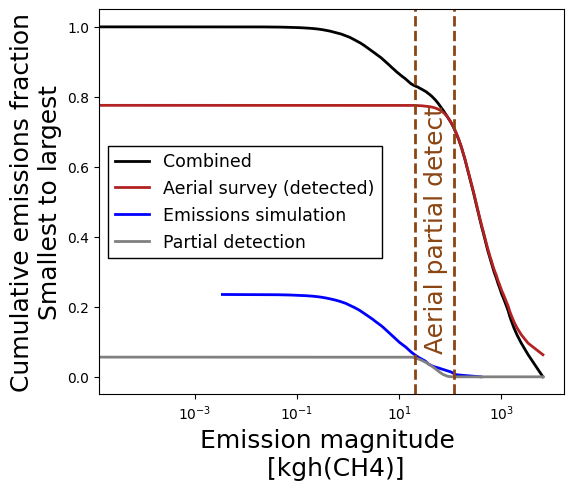

In [355]:
# Permian
# Plot cumulative emission CDFs
# Colormap: https://matplotlib.org/stable/gallery/color/named_colors.html

ax = plt.gca()
plt.semilogx(kairosPermian['Emission magnitude [kgh]'], kairosPermian['Cumulative emissions fraction [%]'], linewidth=2, color="black")
plt.semilogx(kairosPermian['Emission magnitude [kgh]'], kairosPermian['Cumulative emissions fraction aerial [%]'], linewidth=2, color="firebrick")
plt.semilogx(kairosPermian['Emission magnitude Rutherford [kgh]'], kairosPermian['Cumulative emissions fraction Rutherford [%]'], linewidth=2, color="blue")
plt.semilogx(kairosPermian['Emission magnitude [kgh]'], kairosPermian['Cumulative emissions fraction partial [%]'], linewidth=2, color="gray")
# plt.semilogx(kairosPermian['Emission magnitude [kgh]'], kairosPermian['Cumulative emissions [kgh]'], linewidth=2, color="black")
# plt.semilogx(kairosPermian['Emission magnitude [kgh]'], kairosPermian['Cumulative aerial emissions [kgh]'], linewidth=2, color="firebrick")
# plt.semilogx(kairosPermian['Emission magnitude Rutherford [kgh]'], kairosPermian['Cumulative simulated emissions [kgh]'], linewidth=2, color="blue")
# plt.semilogx(kairosPermian['Emission magnitude [kgh]'], kairosPermian['Cumulative partial emissions [kgh]'], linewidth=2, color="gray")
ax.axvline(KairosMinDetect, color="saddlebrown", linestyle="--", lw=2, label="Kairos min detect")
ax.axvline(KairosFullDetect, color="saddlebrown", linestyle="--", lw=2, label="Kairos full detect")
plt.legend(['Combined', 'Aerial survey (detected)', 'Emissions simulation', 'Partial detection'], fontsize=12.5, framealpha=1, fancybox=False, edgecolor='black')
ax.set_xlabel('Emission magnitude \n [kgh(CH4)]', fontsize=18)
ax.set_ylabel('Cumulative emissions fraction\nSmallest to largest', fontsize=18)
ax.text(30, 0.08, 'Aerial partial detect', fontsize=18, color='saddlebrown', rotation='vertical')
ax.text(10**-2.2, 0.92, NMTotalEmissions + ' t/h', fontsize=18, color='black', rotation='horizontal') # kgh

# ax.set_ylabel('Cumulative emissions \n [kgh(CH4)]', fontsize=18)
# ax.text(30, 41000, 'Aerial partial detect', fontsize=16, color='saddlebrown', rotation='vertical')
# ax.get_yaxis().set_major_formatter(
#     ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# ax.set_xlim(1920, 2020)
# ax.set_ylim(0, 500000)
ax.set_ylim(0.001, 1.01)
ax.set_xlim(10**-3, 10**4)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.rcParams["figure.figsize"] = (6,5)
# plt.savefig('Emission CDF construction Permian 20220208.pdf', format='pdf')
plt.show()

In [ ]:
# Permian
# Plot cumulative emission CDFs
# Colormap: https://matplotlib.org/stable/gallery/color/named_colors.html

ax = plt.gca()
plt.semilogx(kairosPermian['Emission magnitude [kgh]'], kairosPermian['Cumulative emissions fraction [%]'], linewidth=2, color="black")
plt.semilogx(kairosPermian['Emission magnitude [kgh]'], kairosPermian['Cumulative emissions fraction aerial [%]'], linewidth=2, color="firebrick")
plt.semilogx(kairosPermian['Emission magnitude Rutherford [kgh]'], kairosPermian['Cumulative emissions fraction Rutherford [%]'], linewidth=2, color="blue")
plt.semilogx(kairosPermian['Emission magnitude [kgh]'], kairosPermian['Cumulative emissions fraction partial [%]'], linewidth=2, color="gray")
# plt.semilogx(kairosPermian['Emission magnitude [kgh]'], kairosPermian['Cumulative emissions [kgh]'], linewidth=2, color="black")
# plt.semilogx(kairosPermian['Emission magnitude [kgh]'], kairosPermian['Cumulative aerial emissions [kgh]'], linewidth=2, color="firebrick")
# plt.semilogx(kairosPermian['Emission magnitude Rutherford [kgh]'], kairosPermian['Cumulative simulated emissions [kgh]'], linewidth=2, color="blue")
# plt.semilogx(kairosPermian['Emission magnitude [kgh]'], kairosPermian['Cumulative partial emissions [kgh]'], linewidth=2, color="gray")
ax.axvline(KairosMinDetect, color="saddlebrown", linestyle="--", lw=2, label="Kairos min detect")
ax.axvline(KairosFullDetect, color="saddlebrown", linestyle="--", lw=2, label="Kairos full detect")
plt.legend(['Combined', 'Aerial survey (detected)', 'Emissions simulation', 'Partial detection'], fontsize=12.5, framealpha=1, fancybox=False, edgecolor='black')
ax.set_xlabel('Emission magnitude \n [kgh(CH4)]', fontsize=18)
ax.set_ylabel('Cumulative emissions fraction\nSmallest to largest', fontsize=18)
ax.text(30, 0.08, 'Aerial partial detect', fontsize=18, color='saddlebrown', rotation='vertical')
ax.text(10**-2.2, 0.92, NMTotalEmissions + ' t/h', fontsize=18, color='black', rotation='horizontal') # kgh

# ax.set_ylabel('Cumulative emissions \n [kgh(CH4)]', fontsize=18)
# ax.text(30, 41000, 'Aerial partial detect', fontsize=16, color='saddlebrown', rotation='vertical')
# ax.get_yaxis().set_major_formatter(
#     ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# ax.set_xlim(1920, 2020)
# ax.set_ylim(0, 500000)
ax.set_ylim(0.001, 1.01)
ax.set_xlim(10**-3, 10**4)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.rcParams["figure.figsize"] = (6,5)
plt.savefig('Emission CDF construction Permian 20220208.pdf', format='pdf')
# plt.show()

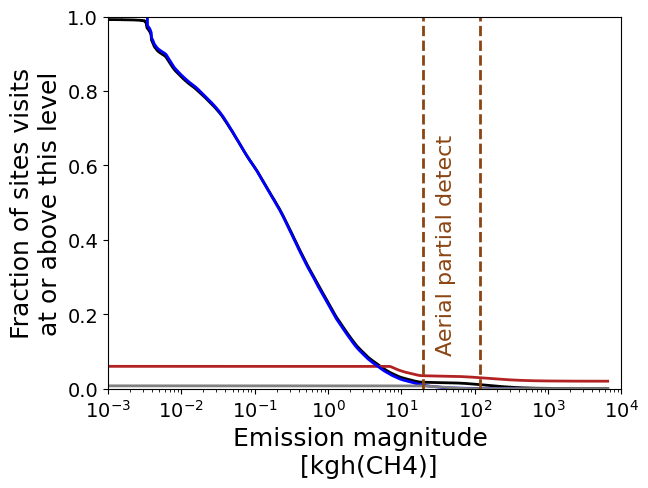

In [354]:
# Plot emission frequency CDFs
# Colormap: https://matplotlib.org/stable/gallery/color/named_colors.html

ax = plt.gca()
plt.semilogx(kairosPermian['Emission magnitude [kgh]'], kairosPermian['Fraction of sites emitting at or above this level'], linewidth=2, color="black")
plt.semilogx(kairosPermian['Emission magnitude [kgh]'], kairosPermian['Fraction of aerial detect sites at or above this level'], linewidth=2, color="firebrick")
plt.semilogx(kairosPermian['Emission magnitude Rutherford [kgh]'], kairosPermian['Fraction of sites emitting at or above this level'], linewidth=2, color="blue")
plt.semilogx(kairosPermian['Emission magnitude [kgh]'], kairosPermian['Cumulative fraction missed partial detect sites'], linewidth=2, color="gray")
ax.axvline(KairosMinDetect, color="saddlebrown", linestyle="--", lw=2, label="Kairos min detect")
ax.axvline(KairosFullDetect, color="saddlebrown", linestyle="--", lw=2, label="Kairos full detect")
# plt.legend(['Combined', 'Aerial survey (detected)', 'Engineering simulation', 'Partial detection'])
ax.set_xlabel('Emission magnitude \n [kgh(CH4)]', fontsize=18)
ax.set_ylabel('Fraction of sites visits\nat or above this level', fontsize=18)
ax.text(30, 0.1, 'Aerial partial detect', fontsize=16, color='saddlebrown', rotation='vertical')
# ax.get_yaxis().set_major_formatter(
#     ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_ylim(-0.001, 1)# ax.set_ylim(10**-5, 1)
ax.set_xlim(10**-3, 10**4)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.rcParams["figure.figsize"] = (6,5)
# plt.savefig('Emission frequency CDF construction Permian 20220208.pdf', format='pdf')
plt.show()

In [ ]:
# Plot cumulative emissions v. fraction of sites
# Colormap: https://matplotlib.org/stable/gallery/color/named_colors.html

ax = plt.gca()
plt.plot(kairosPermian['Cumulative fraction of sites'], kairosPermian['Cumulative emissions fraction [%]'], linewidth=2, color="black")
plt.plot(kairosPermian['Cumulative fraction of sites'], kairosPermian['Cumulative emissions fraction aerial [%]'], linewidth=2, color="firebrick")
plt.plot(kairosPermian['Cumulative fraction of sites'], kairosPermian['Cumulative emissions fraction Rutherford [%]'], linewidth=2, color="blue")
plt.plot(kairosPermian['Cumulative fraction of sites'], kairosPermian['Cumulative emissions fraction partial [%]'], linewidth=2, color="gray")
ax.axvline(KairosMinDetect, color="saddlebrown", linestyle="--", lw=2, label="Kairos min detect")
ax.axvline(KairosFullDetect, color="saddlebrown", linestyle="--", lw=2, label="Kairos full detect")
# plt.legend(['Combined', 'Aerial survey (detected)', 'Engineering simulation', 'Partial detection'])
ax.set_xlabel('Fraction of sites visits\nat or above this level', fontsize=18)
ax.set_ylabel('Cumulative emissions fraction\nSmallest to largest', fontsize=18)
# ax.set_ylabel('Fraction of total emissions', fontsize=18)
# ax.text(30, 0.1, 'Aerial partial detect', fontsize=16, color='saddlebrown', rotation='vertical')
# ax.get_yaxis().set_major_formatter(
#     ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_ylim(0, 1.01)# ax.set_ylim(10**-5, 1)
ax.set_xlim(0, 1.01)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.rcParams["figure.figsize"] = (6,5)
plt.savefig('Cumulative emissions v cumulative sites Permian 20220208.pdf', format='pdf')
# plt.show()

California Figure 1

In [ ]:
# California
# Plot cumulative emission CDFs
# Colormap: https://matplotlib.org/stable/gallery/color/named_colors.html

ax = plt.gca()
plt.semilogx(CMCA20162017['Emission magnitude [kgh]'], CMCA20162017['Cumulative emissions fraction [%]'], linewidth=2, color="black")
plt.semilogx(CMCA20162017['Emission magnitude [kgh]'], CMCA20162017['Cumulative emissions fraction aerial [%]'], linewidth=2, color="firebrick")
plt.semilogx(CMCA20162017['Emission magnitude Rutherford [kgh]'], CMCA20162017['Cumulative emissions fraction Rutherford [%]'], linewidth=2, color="blue")
# plt.semilogx(CMCA20162017['Emission magnitude [kgh]'], CMCA20162017['Cumulative emissions fraction partial [%]'], linewidth=2, color="gray")

# plt.semilogx(CMCA20162017['Emission magnitude [kgh]'], CMCA20162017['Cumulative emissions [kgh]'], linewidth=2, color="black")
# plt.semilogx(CMCA20162017['Emission magnitude [kgh]'], CMCA20162017['Cumulative aerial emissions [kgh]'], linewidth=2, color="firebrick")
# plt.semilogx(CMCA20162017['Emission magnitude Rutherford [kgh]'], CMCA20162017['Cumulative simulated emissions [kgh]'], linewidth=2, color="blue")
# plt.semilogx(kairosPermiankairosPermian['Emission magnitude [kgh]'], kairosPermian['Cumulative partial emissions [kgh]'], linewidth=2, color="gray")
ax.axvline(AVIRISMinDetect, color="saddlebrown", linestyle="--", lw=2, label="AVIRIS-NG min detect")
# ax.axvline(AVIRISFullDetect, color="saddlebrown", linestyle="--", lw=2, label="Kairos full detect")
# plt.legend(['Combined', 'Aerial survey (detected)', 'Engineering simulation'])
ax.set_xlabel('Emission magnitude \n [kgh(CH4)]', fontsize=18)
# ax.set_ylabel('Cumulative emissions \n [kgh(CH4)]', fontsize=18)
ax.set_ylabel('Cumulative emissions fraction\nSmallest to largest', fontsize=18)
ax.text(45, 0.07, 'Aerial min detect', fontsize=18, color='saddlebrown', rotation='vertical')
ax.text(10**-4.8, 0.92, CATotalEmissions + ' t/h', fontsize=18, color='black', rotation='horizontal')
# ax.text(40, 70000, 'Aerial min detect', fontsize=16, color='saddlebrown', rotation='vertical')
# ax.get_yaxis().set_major_formatter(
#     ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# ax.set_xlim(1920, 2020)
# ax.set_ylim(0, 160000)
ax.set_ylim(0.001, 1.01)
# ax.set_xlim(10**-3, 10**4)
ax.set_xlim(10**-6, 10**4)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.rcParams["figure.figsize"] = (6,5)
plt.savefig('Emission CDF construction California 20220208.pdf', format='pdf')
# plt.show()

In [ ]:
# Plot emission frequency CDFs
# California
# Colormap: https://matplotlib.org/stable/gallery/color/named_colors.html

ax = plt.gca()
plt.semilogx(CMCA20162017['Emission magnitude [kgh]'], CMCA20162017['Fraction of sites emitting at or above this level'], linewidth=2, color="black")
plt.semilogx(CMCA20162017['Emission magnitude [kgh]'], CMCA20162017['Fraction of aerial detect sites at or above this level'], linewidth=2, color="firebrick")
plt.semilogx(CMCA20162017['Emission magnitude Rutherford [kgh]'], CMCA20162017['Fraction of sites emitting at or above this level'], linewidth=2, color="blue")
# plt.semilogx(CMCA20162017['Emission magnitude [kgh]'], CMCA20162017['Cumulative fraction missed partial detect sites'], linewidth=2, color="gray")
ax.axvline(AVIRISMinDetect, color="saddlebrown", linestyle="--", lw=2, label="Kairos min detect")
# ax.axvline(AVIRISFullDetect, color="saddlebrown", linestyle="--", lw=2, label="Kairos full detect")
# plt.legend(['Combined', 'Aerial survey (detected)', 'Engineering simulation'])
ax.set_xlabel('Emission magnitude \n [kgh(CH4)]', fontsize=18)
ax.set_ylabel('Fraction of sites visits\nat or above this level', fontsize=18)
ax.text(45, 0.1, 'Aerial min detect', fontsize=16, color='saddlebrown', rotation='vertical')
# ax.get_yaxis().set_major_formatter(
#     ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_ylim(-0.001, 1)# ax.set_ylim(10**-5, 1)
ax.set_xlim(10**-6, 10**4)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.rcParams["figure.figsize"] = (6,5)
plt.savefig('Emission frequency CDF construction California 20220208.pdf', format='pdf')
# plt.show()

In [ ]:
# Plot cumulative emissions v. fraction of sites
# California
# Colormap: https://matplotlib.org/stable/gallery/color/named_colors.html

ax = plt.gca()
plt.plot(CMCA20162017['Cumulative fraction of sites'], CMCA20162017['Cumulative emissions fraction [%]'], linewidth=2, color="black")
plt.plot(CMCA20162017['Cumulative fraction of sites'], CMCA20162017['Cumulative emissions fraction aerial [%]'], linewidth=2, color="firebrick")
plt.plot(CMCA20162017['Cumulative fraction of sites'], CMCA20162017['Cumulative emissions fraction Rutherford [%]'], linewidth=2, color="blue")
# plt.plot(CMCA20162017['Cumulative fraction of sites'], CMCA20162017['Cumulative emissions fraction partial [%]'], linewidth=2, color="gray")
ax.axvline(KairosMinDetect, color="saddlebrown", linestyle="--", lw=2, label="Kairos min detect")
ax.axvline(KairosFullDetect, color="saddlebrown", linestyle="--", lw=2, label="Kairos full detect")
# plt.legend(['Combined', 'Aerial survey (detected)', 'Engineering simulation', 'Partial detection'])
ax.set_xlabel('Fraction of sites visits\nat or above this level', fontsize=18)
ax.set_ylabel('Cumulative emissions fraction\nSmallest to largest', fontsize=18)
# ax.text(30, 0.1, 'Aerial partial detect', fontsize=16, color='saddlebrown', rotation='vertical')
# ax.get_yaxis().set_major_formatter(
#     ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_ylim(0, 1.01)# ax.set_ylim(10**-5, 1)
ax.set_xlim(0, 1.01)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.rcParams["figure.figsize"] = (6,5)
plt.savefig('Cumulative emissions v cumulative sites California 20220208.pdf', format='pdf')
# plt.show()

Distribution comparison

In [ ]:
# Omara data prep
Omara_plumes_only = Omara_plumes.iloc[:,1]
Omara_plumes_pos = Omara_plumes_only[Omara_plumes_only > 0] #(Omara_plumes_only > 0.1) & (Omara_plumes_only < 20)]
Omara_num_plumes = Omara_plumes_pos.size
np.max(Omara_plumes_pos)

# Kairos ALl data prep
Kairos_plumes_only = all_permian_plumes['emission_rate_kgh']
Kairos_plumes_pos = Kairos_plumes_only[Kairos_plumes_only > 0] #(Omara_plumes_only > 0.1) & (Omara_plumes_only < 20)]
Kairos_num_plumes = Kairos_plumes_pos.size
np.max(Kairos_num_plumes)

# Kayrros data prep
Kayrros_plumes_only = Kayrros_plumes['emissions_rate_tons_hour']*1000
Kayrros_plumes_pos = Kayrros_plumes_only[Kayrros_plumes_only > 0] #(Omara_plumes_only > 0.1) & (Omara_plumes_only < 20)]
Kayrros_num_plumes = Kayrros_plumes_pos.size
np.max(Kayrros_num_plumes)

In [ ]:
# Robertson get fractiles
Robertson_plumes_only = Robertson_plumes['Flux in (kg/h)']
Robertson_plumes_pos = Robertson_plumes_only[Robertson_plumes_only > 0] #(Omara_plumes_only > 0.1) & (Omara_plumes_only < 20)]
Robertson_num_plumes = Robertson_plumes_pos.shape[0]
np.max(Robertson_plumes_pos)

In [ ]:
# Total estimated NM emissions
totNMEmissions = np.max(kairosPermian['Cumulative emissions [kgh]'])
# totNMEmissions

# Add column for cumulative fraction of sites
kairosPermian['Cumulative fraction of sites'] = 1 - kairosPermian.index/kairosPermian.shape[0]

In [ ]:
# Lognormal fit to combined distribution
# Fix, as this currently doesn't account for partial detection
logSizeDistCombinedStatsNM = kairosPermian.loc[kairosPermian['Log emission magnitude [log(kgh)]'] > -np.inf, 'Log emission magnitude [log(kgh)]'].describe()
logSizeDistCombinedStatsNM

In [ ]:
lognormSimCombinedNM = pd.DataFrame()
lognormSimCombinedNM['x'] = 2**(np.arange(-10000, 10000)/1000)
lognormSimCombinedNM['y'] = 1 - stats.lognorm.cdf(lognormSimCombinedNM['x'], logSizeDistCombinedStatsNM['std'], scale=np.exp(logSizeDistCombinedStatsNM['mean']))

In [ ]:
# Create data frame including only emissions above Kairos' min detect
Fig1distributionsAerialOnlyNM = kairosPermian.drop(kairosPermian[kairosPermian['Emission magnitude [kgh]'] < KairosMinDetect].index)
logSizeDistKairosStatsNM = Fig1distributionsAerialOnlyNM['Log emission magnitude [log(kgh)]'].describe()
logSizeDistKairosStatsNM

In [ ]:
fracAerialSiteVisitsNM =  np.max(kairosPermian["Fraction of aerial detect sites at or above this level"])
fracAerialSiteVisitsNM

In [ ]:
lognormSimAerialNM = pd.DataFrame()
lognormSimAerialNM['x'] = 2**(np.arange(-10000, 10000)/1000) # 2**(np.arange(-10000, 5800)/1000)
lognormSimAerialNM['y'] = 1 - stats.lognorm.cdf(lognormSimAerialNM['x'], logSizeDistKairosStatsNM['std'], scale=np.exp(logSizeDistKairosStatsNM['mean']))

In [ ]:
# Lognormal fit Permian
permianLogNormalNMAll = scipy.stats.lognorm.fit(kairosPermian['Emission magnitude [kgh]']) #, loc=0, scale=0.01) Fig1distributionsAerialOnlyNM
# permianLogNormalAll
permianLogNormalNMAerial = scipy.stats.lognorm.fit(Fig1distributionsAerialOnlyNM['Emission magnitude [kgh]']) #, loc=0, scale=0.01)
# permianLogNormalAerial

xx = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1, 2, 5, 10, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 30000, 40000, 50000, 70000, 80000, 100000, 500000, 1000000]
lognormCdfNMAll = scipy.stats.lognorm.cdf(x=xx, s=permianLogNormalNMAll[0], loc=permianLogNormalNMAll[1], scale=permianLogNormalNMAll[2])
# lognormCdfAll
# xx = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1, 2, 5, 10, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 30000, 40000, 50000, 70000, 80000, 100000, 500000, 1000000]
lognormCdfNMAerial = scipy.stats.lognorm.cdf(x=xx, s=permianLogNormalNMAerial[0], loc=permianLogNormalNMAerial[1], scale=permianLogNormalNMAerial[2])
# lognormCdfAerial

In [ ]:
# dir(permianLogNormalNMAerial)
np.mean(Fig1distributionsAerialOnlyNM['Emission magnitude [kgh]'])
# scipy.stats.lognorm.mean(s=permianLogNormalNMAerial[0], loc=permianLogNormalNMAerial[1], scale=permianLogNormalNMAerial[2])
# scipy.stats.lognorm.mean(s=permianLogNormalNMAll[0], loc=permianLogNormalNMAll[1], scale=permianLogNormalNMAll[2])

In [ ]:
plfitNM = plfit.plfit(Fig1distributionsAerialOnlyNM['Emission magnitude [kgh]'])
plfitNM._alpha, plfitNM._xmin

In [ ]:
# Plot a power law
plfitNM.plotcdf()

In [ ]:
# Kayrros power law fit
plfitKayrros = plfit.plfit(Kayrros_plumes_pos)
plfitKayrros._alpha, plfitKayrros._xmin

In [ ]:
# Plot a power law
plfitKayrros.plotcdf()

In [ ]:
ax = plt.gca()
plt.loglog(Kayrros_plumes_pos.sort_values(ascending=False), np.arange(1, Kayrros_num_plumes + 1, 1)/Kayrros_num_plumes, linewidth=2, color="black")
ax.set_xlim(10**3, 10**7)
plt.loglog([10**5.1, 10**6.1], [10**-0, 10**-4.5],color='firebrick',
         linestyle='dashed',linewidth=2)
plt.loglog([10**4.75, 10**5.75], [10**-0, 10**-2.4],color='saddlebrown',
         linestyle='dashed',linewidth=2)
ax.text(10**5.75, 10**-2.3, 'alpha=2.4', fontsize=16, color='saddlebrown', rotation='horizontal')
ax.text(10**5.9, 10**-3, 'alpha=4.5', fontsize=16, color='firebrick', rotation='horizontal')
ax.set_xlabel('Emission magnitude \n [kgh(CH4)]', fontsize=18)
ax.set_ylabel('Cumulative fraction of sites \n (largest to smallest)', fontsize=18)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.rcParams["figure.figsize"] = (6,5)
plt.legend(['Lauvaux et al. global'],
           loc='lower left', fontsize=12)

plt.savefig('Kayrros loglog 20221016.pdf', format='pdf')
# plt.show()

In [ ]:
# Permian

ax = plt.gca()
plt.loglog(kairosPermian['Emission magnitude [kgh]'], kairosPermian['Cumulative fraction of sites'], linewidth=2, color="black")
plt.loglog(xx, 1 - lognormCdfNMAll, linewidth=2, color="saddlebrown")
plt.loglog(xx, fracAerialSiteVisitsNM*(1 - lognormCdfNMAerial), linewidth=2, color="tan")


# plt.loglog(Omara_plumes_pos.sort_values(ascending=False), np.arange(1, Omara_num_plumes + 1, 1)/Omara_num_plumes, linewidth=2, color="blue")
# plt.loglog(Kayrros_plumes_pos.sort_values(ascending=False), np.arange(1, Kayrros_num_plumes + 1, 1)/Kayrros_num_plumes, linewidth=2, color="blue")

#plt.loglog(Kairos_plumes_pos.sort_values(ascending=False), np.arange(1, Kairos_num_plumes + 1, 1)/Kairos_num_plumes, linewidth=2, color="firebrick")
# plt.loglog(Robertson_plumes_pos.sort_values(ascending=False), np.arange(1, Robertson_num_plumes + 1, 1)/Robertson_num_plumes, linewidth=2, color="gray")
# plt.loglog(lognormSimCombinedNM['x'], lognormSimCombinedNM['y'], linewidth=2, color="saddlebrown")
# plt.loglog(lognormSimAerialNM['x'], lognormSimAerialNM['y'], linewidth=2, color="tan")
# plt.loglog([10**1.8, 10**(1.8 + 6/plfitNM._alpha)], [10**-0, 10**-6],color='firebrick',
#          linestyle='dashed',linewidth=2)
plt.loglog([10**1.1, 10**4.1], [10**-0, 10**-4.5],color='firebrick',
         linestyle='dashed',linewidth=2)
# plt.loglog([10**1.1, 10**3.1], [10**-0, 10**-4],color='black',
#         linestyle='dashed',linewidth=2)
# plt.semilogx(kairosPermian['SizeAerial'], kairosPermian['CumAerial'], linewidth=2, color="firebrick")
# ax.axvline(KairosMinDetect, color="saddlebrown", linestyle="--", lw=2, label="Kairos min detect")

plt.legend(['This study (Combined)', 'Lognormal fit (Combined)', 'Lognormal fit (Aerial only)', 'Power law (' + r'$\alpha$ = 1.5)'])
# plt.legend(['This study (Combined)', 'Power law (' + r'$\alpha$ = 1.5)'])
ax.set_xlabel('Emission magnitude \n [kgh(CH4)]', fontsize=18)
ax.set_ylabel('Cumulative fraction of sites \n (largest to smallest)', fontsize=18)
# ax.text(30, 65000, 'Aerial min detect', fontsize=16, color='saddlebrown', rotation='vertical')
# ax.get_yaxis().set_major_formatter(
#     ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# ax.set_xlim(1920, 2020)
ax.set_ylim(10**-6, 1.5) # ax.set_ylim(10**-5, 1.5)
ax.set_xlim(10**-3, 10**5) # ax.set_xlim(10**-3, 10**5)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.rcParams["figure.figsize"] = (6,5)
plt.savefig('Dist comparison lognormalNM 20220209.pdf', format='pdf')
# plt.savefig('Dist comparison NM 20220208b.pdf', format='pdf')
# plt.show()

In [ ]:
# Lognormal and power law moments
permianLogNormalNMAllScale1 = scipy.stats.lognorm.fit(kairosPermian['Emission magnitude [kgh]'], scale=1) #, loc=0, scale=0.01) Fig1distributionsAerialOnlyNM
mean, var, skew, kurt = scipy.stats.lognorm.stats(permianLogNormalNMAllScale1, moments='mvsk')
scipy.stats.lognorm.mean(permianLogNormalNMAllScale1)

In [ ]:
# np.exp(permianLogNormalNMAll[1] + (permianLogNormalNMAll[0]**2)/2)
scipy.stats.lognorm.mean(permianLogNormalNMAll)
# permianLogNormalNMAll

In [ ]:
# Generate random sample
lognormSampleNM = scipy.stats.lognorm.rvs(s=permianLogNormalNMAll[0], loc=permianLogNormalNMAll[1], scale=permianLogNormalNMAll[2],  size=100000)
lognormSampleNMScaled = lognormSampleNM*scipy.stats.lognorm.mean(permianLogNormalNMAll)[0]/np.mean(lognormSampleNM)
# np.mean(lognormSampleNMScaled)
lognormSampleNMAbove10below1000 = lognormSampleNMScaled[(lognormSampleNMScaled >= 10) * (lognormSampleNMScaled < 1000)]
np.mean(lognormSampleNMAbove10below1000)
lognormSampleNMAbove10below10000 = lognormSampleNMScaled[(lognormSampleNMScaled >= 10) * (lognormSampleNMScaled < 10000)]
lognormSampleNMAbove10below10000.size/lognormSampleNMAbove10below1000.size
lognormSampleNMAbove1below10000 = lognormSampleNMScaled[(lognormSampleNMScaled >= 1) * (lognormSampleNMScaled < 10000)]
lognormSampleNMAbove1below10000.size/lognormSampleNMAbove10below1000.size
np.mean(lognormSampleNMAbove1below10000)
lognormSampleNMAbove1 = lognormSampleNMScaled[(lognormSampleNMScaled >= 1)]
lognormSampleNMAbove1below10000.size/lognormSampleNMAbove10below1000.size
np.mean(lognormSampleNMAbove1)
# lognormSampleNMAbove10below10000 = lognormSampleNMScaled[(lognormSampleNMScaled >= 10) * (lognormSampleNMScaled < 10000)]
# np.mean(lognormSampleNMAbove10below10000)
# lognormSampleNMLocatedScales = (lognormSampleNM - permianLogNormalNMAll[1])/permianLogNormalNMAll[2]
# np.mean(lognormSampleNM)

In [ ]:
zz = np.arange(0, 10000)
lognormPdfNMAllEven = scipy.stats.lognorm.pdf(x=zz, s=permianLogNormalNMAll[0], loc=permianLogNormalNMAll[1], scale=permianLogNormalNMAll[2])
lognormPdfNMAllEvenSum = np.sum(lognormPdfNMAllEven)
lognormMeanAll1to1000 = np.sum(lognormPdfNMAllEven*zz)/lognormPdfNMAllEvenSum
lognormMeanAll1to1000
# plt.loglog(zz, lognormPdfNMAll/lognormPdfProbMass)

In [ ]:
# Plot lognormal and power law only
ax = plt.gca()
plt.loglog(xx, 1 - lognormCdfNMAll, linewidth=2, color="saddlebrown")
plt.loglog([10**0, 10**4.75], [10**-0, 10**-7],color='firebrick',
         linestyle='dashed',linewidth=2)
# plt.legend(['This study (Combined)', 'Lognormal fit (Combined)', 'Lognormal fit (Aerial only)', 'Power law (' + r'$\alpha$ = 1.5)'])
# plt.legend(['This study (Combined)', 'Power law (' + r'$\alpha$ = 1.5)'])
ax.set_xlabel('Emission magnitude \n [kgh(CH4)]', fontsize=18)
ax.set_ylabel('Cumulative fraction of sites \n (largest to smallest)', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_ylim(10**-7, 1.5) # ax.set_ylim(10**-5, 1.5)
ax.set_xlim(10**-3, 10**6) # ax.set_xlim(10**-3, 10**5)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.rcParams["figure.figsize"] = (6,5)
plt.savefig('Dist comparison lognormalNM PL only 20220209c.pdf', format='pdf')
# plt.show()

In [ ]:
# Lognormal integral
# scipy.stats.lognorm.cdf(x=xx, s=permianLogNormalNMAll[0], loc=permianLogNormalNMAll[1], scale=permianLogNormalNMAll[2])
# permianLogNormalNMAll
mean, var, skew, kurt = scipy.stats.lognorm.stats(permianLogNormalNMAll, moments='mvsk')
scipy.stats.lognorm.stats(permianLogNormalNMAll, moments='mvsk')

In [ ]:
# California

# Total estimated CA emissions
totCAEmissions = np.max(CMCA20162017['Cumulative emissions [kgh]'])
# totNMEmissions

# Add column for cumulative fraction of sites
CMCA20162017['Cumulative fraction of sites'] = 1 - CMCA20162017.index/CMCA20162017.shape[0]

In [ ]:
# Lognormal fit to combined distribution
# Fix, as this currently doesn't account for partial detection
logSizeDistCombinedStatsCA = CMCA20162017.loc[CMCA20162017['Log emission magnitude [log(kgh)]'] > -np.inf, 'Log emission magnitude [log(kgh)]'].describe()
logSizeDistCombinedStatsCA

In [ ]:
lognormSimCombinedCA = pd.DataFrame()
lognormSimCombinedCA['x'] = 2**(np.arange(-10000, 5000)/1000)
lognormSimCombinedCA['y'] = 1 - stats.lognorm.cdf(lognormSimCombinedCA['x'], logSizeDistCombinedStatsCA['std'], scale=np.exp(logSizeDistCombinedStatsCA['mean']))

In [ ]:
# Create data frame including only emissions above AVIRIS-NG's min detect
Fig1distributionsAerialOnlyCA = CMCA20162017.drop(CMCA20162017[CMCA20162017['Emission magnitude [kgh]'] < AVIRISMinDetect].index)
logSizeDistStatsCA = Fig1distributionsAerialOnlyCA['Log emission magnitude [log(kgh)]'].describe()
logSizeDistStatsCA

In [ ]:
lognormSimAerialCA = pd.DataFrame()
lognormSimAerialCA['x'] = 2**(np.arange(-10000, 5800)/1000)
lognormSimAerialCA['y'] = 1 - stats.lognorm.cdf(lognormSimAerialCA['x'], logSizeDistStatsCA['std'], scale=np.exp(logSizeDistStatsCA['mean']))

In [ ]:
fracAerialSiteVisitsCA =  np.max(CMCA20162017["Fraction of aerial detect sites at or above this level"])
fracAerialSiteVisitsCA


In [ ]:
# Lognormal fit
LogNormalCAAll = scipy.stats.lognorm.fit(CMCA20162017['Emission magnitude [kgh]']) #, loc=0, scale=0.01) Fig1distributionsAerialOnlyNM
# permianLogNormalAll
LogNormalCAAerial = scipy.stats.lognorm.fit(Fig1distributionsAerialOnlyCA['Emission magnitude [kgh]']) #, loc=0, scale=0.01)
# permianLogNormalAerial

xx = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1, 2, 5, 10, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 30000, 40000, 50000, 70000, 80000, 100000, 500000, 1000000]
lognormCdfCAAll = scipy.stats.lognorm.cdf(x=xx, s=LogNormalCAAll[0], loc=LogNormalCAAll[1], scale=LogNormalCAAll[2])
# lognormCdfAll
# xx = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1, 2, 5, 10, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 30000, 40000, 50000, 70000, 80000, 100000, 500000, 1000000]
lognormCdfCAAerial = scipy.stats.lognorm.cdf(x=xx, s=LogNormalCAAerial[0], loc=LogNormalCAAerial[1], scale=LogNormalCAAerial[2])
# lognormCdfAerial

In [ ]:
# LogNormalCAAll
LogNormalCAAerial

In [ ]:
# plfit.plfit(Fig1distributionsAerialOnlyCA['Emission magnitude [kgh]'])
plfitCA = plfit.plfit(Fig1distributionsAerialOnlyCA['Emission magnitude [kgh]'])
# plfit.plfit.alpha_gen(Fig1distributionsAerialOnlyCA['Emission magnitude [kgh]'])
# dir(plfitCA)
plfitCA._alpha, plfitCA._xmin

In [ ]:
# Plot a power law
plfitCA.plotcdf()

In [ ]:
# California

ax = plt.gca()
plt.loglog(CMCA20162017['Emission magnitude [kgh]'], CMCA20162017['Cumulative fraction of sites'], linewidth=2, color="black")
plt.loglog(xx, 1 - lognormCdfCAAll, linewidth=2, color="saddlebrown")
plt.loglog(xx, fracAerialSiteVisitsCA*(1 - lognormCdfCAAerial), linewidth=2, color="tan")


# plt.loglog(Omara_plumes_pos.sort_values(ascending=False), np.arange(1, Omara_num_plumes + 1, 1)/Omara_num_plumes, linewidth=2, color="blue")
# plt.loglog(Robertson_plumes_pos.sort_values(ascending=False), np.arange(1, Robertson_num_plumes + 1, 1)/Robertson_num_plumes, linewidth=2, color="gray")
# plt.loglog(lognormSimCombinedCA['x'], lognormSimCombinedCA['y'], linewidth=2, color="saddlebrown")
# plt.loglog(lognormSimAerialCA['x'], lognormSimAerialCA['y'], linewidth=2, color="tan")
# plt.loglog([10**1.6, 10**(1.6 + 6/plfitCA._alpha)], [10**-0, 10**-6],color='firebrick',
#          linestyle='dashed',linewidth=2)
plt.loglog([10**1.1, 10**4.1], [10**-0, 10**-6],color='firebrick',
         linestyle='dashed',linewidth=2)
# plt.semilogx(CMCA20162017['SizeAerial'], CMCA20162017['CumAerial'], linewidth=2, color="firebrick")
# ax.axvline(KairosMinDetect, color="saddlebrown", linestyle="--", lw=2, label="Kairos min detect")

plt.legend(['This study (Combined)', 'Lognormal fit (Combined)', 'Lognormal fit (Aerial only)', 'Power law (' + r'$\alpha$ = 2)'])
# plt.legend(['This study (Combined)', 'Power law (' + r'$\alpha$ = 2)'])
ax.set_xlabel('Emission magnitude \n [kgh(CH4)]', fontsize=18)
ax.set_ylabel('Cumulative fraction of sites \n (largest to smallest)', fontsize=18)
# ax.text(30, 65000, 'Aerial min detect', fontsize=16, color='saddlebrown', rotation='vertical')
# ax.get_yaxis().set_major_formatter(
#     ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# ax.set_xlim(1920, 2020)
ax.set_ylim(10**-6, 1.5)# ax.set_ylim(10**-7, 1.5)
ax.set_xlim(10**-3, 10**5)# ax.set_xlim(10**-3, 10**4)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.rcParams["figure.figsize"] = (6,5)
plt.savefig('Dist comparison lognormalCA 20220208b.pdf', format='pdf')
# plt.savefig('Dist comparison CA 20220208b.pdf', format='pdf')
plt.show()

OTM 33A ceiling exercise

In [ ]:
# Mean and 95% CI for full Rutherford simulation
Rutherford_mean_site_emissions = np.array([1.301654235598136, 1.264411463164507, 1.358324860344864])
Rutherford_half_CI_width = (Rutherford_mean_site_emissions[2] - Rutherford_mean_site_emissions[1])/2

# Mean and 95% CI for full Combined simulation
Combined_mean_site_emissions = np.array([4.908561258, 4.713596973, 5.087791706])
Combined_half_CI_width = (Combined_mean_site_emissions[2] - Combined_mean_site_emissions[1])/2

# Convert the ceiling variable to categorical
OTM_sim_results['Ceiling'] = OTM_sim_results['Ceiling'].apply(str)
OTM_sim_results.iloc[-1,0] = 'Inf'

In [ ]:
ax = plt.gca()
# plt.bar(OTM_sim_results['Ceiling'], OTM_sim_results['Site mean'], linewidth=2, color="black")
plt.scatter(OTM_sim_results['Ceiling'], OTM_sim_results['Site mean'], linewidth=2, color="saddlebrown", s=0.1)
plt.errorbar(OTM_sim_results['Ceiling'], OTM_sim_results['Site mean'], yerr=(OTM_sim_results['Site P97.5'] - OTM_sim_results['Site P2.5'])/2, fmt="o", color="saddlebrown")
ax.set_xlabel('Ground measurement ceiling \n [kgh(CH4)]', fontsize=18)
ax.set_ylabel('Mean site-level emissions \n [kgh(CH4)]', fontsize=18)
# ax.axhline(Rutherford_mean_site_emissions[0], color="blue", linestyle="-", lw=2)
# ax.axhline(Rutherford_mean_site_emissions[1], color="blue", linestyle="--", lw=2)
# ax.axhline(Rutherford_mean_site_emissions[2], color="blue", linestyle="--", lw=2)
# ax.text(4.3, 1.5, 'Emissions simulation', fontsize=16, color='blue', rotation='horizontal')
ax.text(1, 4.2, 'Combined distribution', fontsize=16, color='black', rotation='horizontal')
ax.axhline(Combined_mean_site_emissions[0], color="black", linestyle="-", lw=2)
ax.axhline(Combined_mean_site_emissions[1], color="black", linestyle="--", lw=2)
ax.axhline(Combined_mean_site_emissions[2], color="black", linestyle="--", lw=2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_ylim(0, 6)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.rcParams["figure.figsize"] = (6,5)
# ax2 = ax.twiny()
# ax2.set_ylim(0,550)
plt.savefig('OTM ceiling exercise noSimLine 20220112.pdf', format='pdf')
# plt.show()

Total emissions breakdown comparison by scenario

In [ ]:
ax = plt.gca()
plt.bar(tot_comparison_scenario['Scenario'], tot_comparison_scenario['Aerial survey'], bottom=tot_comparison_scenario['Emissions simulation'] + tot_comparison_scenario['Partial detection correction'], linewidth=2, color="firebrick")
plt.bar(tot_comparison_scenario['Scenario'], tot_comparison_scenario['Partial detection correction'], bottom=tot_comparison_scenario['Emissions simulation'], linewidth=2, color="grey")
plt.bar(tot_comparison_scenario['Scenario'], tot_comparison_scenario['Emissions simulation'], linewidth=2, color="blue")
# plt.legend(['Aerial survey (detected)', 'Partial detection ', 'Emissions simulation'])
# ax.set_xlabel('Emission magnitude \n [kgh(CH4)]', fontsize=18)
ax.set_ylabel('Fraction of total emissions', fontsize=18)
ax.text(-0.1, 0.5, 'Aerial', fontsize=24, color='black', rotation='vertical', fontweight='bold')
ax.text(2.9, 0.3, 'Simulated', fontsize=24, color='blue', rotation='vertical', fontweight='bold')
ax.text(0.6, 0.35, 'Partial detect', fontsize=24, color='grey', rotation='vertical', fontweight='bold')
plt.arrow(0.6, .3, -0.08, -0.03, width = 0.02, head_width = 0.07, color='grey')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=30, ha="right", rotation_mode="anchor")
# ax.tick_params('x', rotation=40, rotation_mode="anchor")
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.rcParams["figure.figsize"] = (6,5)
plt.savefig('Emissions breakdown comparison 20220208.pdf', format='pdf')
plt.show()

In [ ]:
# Leakage rate illustration figure

# NG CO2 emissions of combustion
# kgCO2perMMBtuNG = 52.91 # https://www.eia.gov/environment/emissions/co2_vol_mass.php
kgCO2perkgMethane = 2.75 # https://www.engineeringtoolbox.com/co2-emission-fuels-d_1085.html
GWP100 = 25 # From IPCC AR4 https://www.epa.gov/sites/default/files/2021-02/documents/us-ghg-inventory-2021-annex-6-additional-information.pdf
GWP20 = 72
lossRate = np.array([0, 1, 2, 5, 10, 20, 50, 100])/1000 # In %
lifeCycleEmissionskgMethane = pd.DataFrame(lossRate)
lifeCycleEmissionskgMethane['Loss rate [%]'] = lossRate*100
lifeCycleEmissionskgMethane['Combustion emissions'] = kgCO2perkgMethane
lifeCycleEmissionskgMethane['GWP20'] = lossRate*GWP20
lifeCycleEmissionskgMethane['GWP100'] = lossRate*GWP100
#lifeCycleEmissionskgMethane

# fig = plt.figure()
# a1 = fig.add_axes([0,0,1,1])
ax = lifeCycleEmissionskgMethane.plot(x='Loss rate [%]', y=['GWP100', 'GWP20'], bottom=kgCO2perkgMethane, kind="bar", width=0.8, color=["navy", "firebrick"])
ax.set_ylim([0, 10])
ax.set_xlim([0, 7.5])
ax.axhline(kgCO2perkgMethane, color="saddlebrown", linestyle="--", lw=2)
ax.fill_between([-0.1, 10], kgCO2perkgMethane, 0, color='none', alpha=1, hatch="/", edgecolor="saddlebrown")
ax.set_xlabel('Loss rate [%]', fontsize=18)
ax.set_ylabel('Life-cycle emissions\n[$kg(CO_{2}e)$/$kg(CH_4)$]', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(rotation=0)
# ax.set_xlim([0, 0.1])# ax.set_xlim(10**-3, 10**4)
# plt.bar(lifeCycleEmissionskgMethane[0], lifeCycleEmissionskgMethane['GWP20'], bottom=lifeCycleEmissionskgMethane['Combustion emissions'], linewidth=2, color="firebrick")
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.rcParams["figure.figsize"] = (10,5)
plt.savefig('Methane LCA by loss rate 20220204.pdf', format='pdf')
# plt.show()

In [ ]:
inventories.index = ["EPA GHGI", "Alvarez et al.", "Rutherford et al."]
inventoriesTotals = inventories.sum(1)
# inventoriesTotals[1]
inventoriesLossRate = inventories.iloc[: , 1:]*(2.3*7.6/13/inventoriesTotals[1])
inventoriesLossRate

In [ ]:
ax = inventoriesLossRate.plot(kind="bar", stacked=True, color=["blue", "firebrick"])
ax.set_ylabel('Fractional loss rate [%]', fontsize=18)
ax.text(1.9, 0.6, 'Top 5%', fontsize=28, color='black', rotation='vertical', fontweight='bold')
ax.text(1.8, 0.04, 'Bottom\n   95%', fontsize=28, color='black', rotation='vertical', fontweight='bold')
# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles[::-1], labels[::-1], loc='upper right', bbox_to_anchor=(0.99, 1))
# plt.legend(bbox_to_anchor=(0.99, 1), loc='upper right', borderaxespad=0)#, title_fontsize= 'large')
ax.legend_ = None
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(rotation=0)
# ax.set_xlim([0, 0.1])# ax.set_xlim(10**-3, 10**4)
# plt.bar(lifeCycleEmissionskgMethane[0], lifeCycleEmissionskgMethane['GWP20'], bottom=lifeCycleEmissionskgMethane['Combustion emissions'], linewidth=2, color="firebrick")
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.rcParams["figure.figsize"] = (8,5)
plt.savefig('Loss rate by study 20220208.pdf', format='pdf')
# plt.show()

In [ ]:
# Draft figure for satellites paper

In [ ]:
# Fractional loss rates

fraction_to_percent = 100

KairosPermianLossRate = fraction_to_percent*surveyStats.loc[surveyStats['Basin/Campaign']=='Kairos Permian', 'Methane fractional loss total'].iloc[0]
CMPermianLossRate2019 = fraction_to_percent*surveyStats.loc[surveyStats['Basin/Campaign']=='Permian/2019', 'Methane fractional loss total'].iloc[0]
CMPermianLossRate2020 = fraction_to_percent*surveyStats.loc[surveyStats['Basin/Campaign']=='Permian/2020', 'Methane fractional loss total'].iloc[0]
CMPermianLossRateSummer2021 = fraction_to_percent*surveyStats.loc[surveyStats['Basin/Campaign']=='Permian/Summer 2021', 'Methane fractional loss total'].iloc[0]
CMPermianLossRateFall2021 = fraction_to_percent*surveyStats.loc[surveyStats['Basin/Campaign']=='Permian/Fall 2021', 'Methane fractional loss total'].iloc[0]
CALossRate20162017 = fraction_to_percent*surveyStats.loc[surveyStats['Basin/Campaign']=='San Joaquin/2016-2017', 'Methane fractional loss total'].iloc[0]
CALossRate2016 = fraction_to_percent*surveyStats.loc[surveyStats['Basin/Campaign']=='San Joaquin/2016', 'Methane fractional loss total'].iloc[0]
CALossRate2017 = fraction_to_percent*surveyStats.loc[surveyStats['Basin/Campaign']=='San Joaquin/2017', 'Methane fractional loss total'].iloc[0]
CALossRate2020COVID = fraction_to_percent*surveyStats.loc[surveyStats['Basin/Campaign']=='San Joaquin/COVID 2020', 'Methane fractional loss total'].iloc[0]
CALossRate2020 = fraction_to_percent*surveyStats.loc[surveyStats['Basin/Campaign']=='San Joaquin/2020', 'Methane fractional loss total'].iloc[0]
CALossRate2021 = fraction_to_percent*surveyStats.loc[surveyStats['Basin/Campaign']=='San Joaquin/Fall 2021', 'Methane fractional loss total'].iloc[0]
DJLossRateSummer2021 = fraction_to_percent*surveyStats.loc[surveyStats['Basin/Campaign']=='DJ/Summer 2021', 'Methane fractional loss total'].iloc[0]
DJLossRateFall2021 = fraction_to_percent*surveyStats.loc[surveyStats['Basin/Campaign']=='DJ/Fall 2021', 'Methane fractional loss total'].iloc[0]
AppalachiaLossRate = fraction_to_percent*surveyStats.loc[surveyStats['Basin/Campaign']=='Appalachia/2021', 'Methane fractional loss total'].iloc[0]
UintaLossRate = fraction_to_percent*surveyStats.loc[surveyStats['Basin/Campaign']=='Uinta/2020', 'Methane fractional loss total'].iloc[0]
BarnettLossRate = fraction_to_percent*surveyStats.loc[surveyStats['Basin/Campaign']=='Kairos Barnett', 'Methane fractional loss total'].iloc[0]

KairosPermianLossRate, CMPermianLossRate2019, CMPermianLossRateSummer2021, CMPermianLossRateFall2021, CALossRate20162017, CALossRate2016, CALossRate2017, CALossRate2020COVID, CALossRate2020, CALossRate2021, \
DJLossRateSummer2021, DJLossRateFall2021, AppalachiaLossRate, UintaLossRate, BarnettLossRate

In [ ]:
# Satellite visible fraction distributions

ax = plt.gca()
# Main plot
plt.semilogx(kairosPermian['Emission magnitude [kgh]'], KairosPermianLossRate*(1 - kairosPermian['Cumulative emissions fraction [%]']), linewidth=2, color=colors[0], linestyle='solid')
plt.semilogx(CMPermian2019['Emission magnitude [kgh]'], CMPermianLossRate2019*(1 - CMPermian2019['Cumulative emissions fraction [%]']), linewidth=2, color=colors[0], linestyle='dashed')
plt.semilogx(CMCA2020COVID['Emission magnitude [kgh]'], CALossRate2020COVID*(1 - CMCA2020COVID['Cumulative emissions fraction [%]']), linewidth=2, color=colors[1], linestyle='solid')
plt.semilogx(CMCA2017['Emission magnitude [kgh]'], CALossRate2017*(1 - CMCA2017['Cumulative emissions fraction [%]']), linewidth=2, color=colors[1], linestyle=(0, (1, 5)))
plt.semilogx(CMCA2016['Emission magnitude [kgh]'], CALossRate2016*(1 - CMCA2016['Cumulative emissions fraction [%]']), linewidth=2, color=colors[1], linestyle="dotted")
plt.semilogx(CMCA2021['Emission magnitude [kgh]'], CALossRate2021*(1 - CMCA2021['Cumulative emissions fraction [%]']), linewidth=2, color=colors[1], linestyle="dashdot")
plt.semilogx(CMCA2020['Emission magnitude [kgh]'], CALossRate2020*(1 - CMCA2020['Cumulative emissions fraction [%]']), linewidth=2, color=colors[1], linestyle="dashed")
plt.semilogx(CMDJ2021Summer['Emission magnitude [kgh]'], DJLossRateSummer2021*(1 - CMDJ2021Summer['Cumulative emissions fraction [%]']), linewidth=2, color=colors[2], linestyle=(5, (2, 5)))
plt.semilogx(CMDJ2021Fall['Emission magnitude [kgh]'], DJLossRateFall2021*(1 - CMDJ2021Fall['Cumulative emissions fraction [%]']), linewidth=2, color=colors[2], linestyle=(1, (1, 5)))
# plt.semilogx(CMAppalachia2021['Emission magnitude [kgh]'], AppalachiaLossRate*(1 - CMAppalachia2021['Cumulative emissions fraction [%]']), linewidth=2, color=colors[3])
plt.semilogx(CMUinta2020['Emission magnitude [kgh]'], UintaLossRate*(1 - CMUinta2020['Cumulative emissions fraction [%]']), linewidth=2, color=colors[4], linestyle="solid")
plt.semilogx(KairosBarnett['Emission magnitude [kgh]'], BarnettLossRate*(1 - KairosBarnett['Cumulative emissions fraction [%]']), linewidth=2, color=colors[5], linestyle="solid")

plt.axvline(100, color=colors[0], linestyle="--", lw=1, label="Targeted")
plt.text(10**1.9, 5.1, 'Targeted', size=16, color='black', rotation=0, ha='center')
plt.axvline(1000, color=colors[0], linestyle="--", lw=1, label="Scanning")
plt.text(10**3.1, 5.1, 'Scanning', size=16, color='black', rotation=0, ha='center')

plt.text(10**1.4, 3, 'Uinta', size=16, color=colors[4], rotation=0, ha='center')
# plt.text(10**3.4, 4, 'NM Permian', size=16, color=colors[0], rotation=0, ha='center')
plt.text(10**3.5, 3, 'Permian', size=16, color=colors[0], rotation=0, ha='center')
plt.text(10**-0.2, 0.9, 'San Joaquin', size=16, color=colors[1], rotation=0, ha='center')
plt.text(10**2.5, 0.25, 'Barnett', size=16, color=colors[5], rotation=0, ha='center')
plt.text(10**3.5, 0.5, 'Denver', size=16, color=colors[3], rotation=0, ha='center')

# plt.legend(['Kairos NM Permian 2018-2020',
#             'CM Permian 2019',
#             'CM San Joaquin Su2020',
#             'CM San Joaquin 2017',
#             'CM San Joaquin 2016',
#             'CM San Joaquin 2021',
#             'CM San Joaquin F2020',
#             'CM Denver-Julesburg Su2021',
#             'CM Denver-Julesburg F2021',
#             'CM Pennsylvania 2021',
#             'CM Uinta 2021',
#             'Kairos Barnett 2021'],
#            loc='upper left', fontsize=12)
ax.set_ylim(0, 5)
ax.set_xlim(10**-1, 10**4)
plt.xlabel('Site emission magnitude [kg(CH4)/hr]', size=16)
plt.ylabel('Cumulative methane loss [%]', size=16)
# plt.text(10**-2.8, 0.7, 'Permian', fontsize=24, color='black', rotation=0, ha='left')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('Satellites distributions 20221019.pdf', format='pdf', bbox_inches="tight")
# plt.show()

In [ ]:
# Satellite min detect needed to guarantee a given fractional loss

ax = plt.gca()
# Main plot
plt.loglog(KairosPermianLossRate*(1 - kairosPermian['Cumulative emissions fraction [%]'])/fraction_to_percent, kairosPermian['Emission magnitude [kgh]'], linewidth=2, color=colors[0], linestyle='solid')
plt.loglog(CMPermianLossRate2019*(1 - CMPermian2019['Cumulative emissions fraction [%]'])/fraction_to_percent, CMPermian2019['Emission magnitude [kgh]'], linewidth=2, color=colors[0], linestyle='dashed')
plt.loglog(CALossRate2020COVID*(1 - CMCA2020COVID['Cumulative emissions fraction [%]'])/fraction_to_percent, CMCA2020COVID['Emission magnitude [kgh]'], linewidth=2, color=colors[1], linestyle='solid')
plt.loglog(CALossRate2017*(1 - CMCA2017['Cumulative emissions fraction [%]'])/fraction_to_percent, CMCA2017['Emission magnitude [kgh]'], linewidth=2, color=colors[1], linestyle=(0, (1, 5)))
plt.loglog(CALossRate2016*(1 - CMCA2016['Cumulative emissions fraction [%]'])/fraction_to_percent, CMCA2016['Emission magnitude [kgh]'], linewidth=2, color=colors[1], linestyle="dotted")
plt.loglog(CALossRate2021*(1 - CMCA2021['Cumulative emissions fraction [%]'])/fraction_to_percent, CMCA2021['Emission magnitude [kgh]'], linewidth=2, color=colors[1], linestyle="dashdot")
plt.loglog(CALossRate2020*(1 - CMCA2020['Cumulative emissions fraction [%]'])/fraction_to_percent, CMCA2020['Emission magnitude [kgh]'], linewidth=2, color=colors[1], linestyle="dashed")
plt.loglog(DJLossRateSummer2021*(1 - CMDJ2021Summer['Cumulative emissions fraction [%]'])/fraction_to_percent, CMDJ2021Summer['Emission magnitude [kgh]'], linewidth=2, color=colors[2], linestyle=(5, (2, 5)))
plt.loglog(DJLossRateFall2021*(1 - CMDJ2021Fall['Cumulative emissions fraction [%]'])/fraction_to_percent, CMDJ2021Fall['Emission magnitude [kgh]'], linewidth=2, color=colors[2], linestyle=(1, (1, 5)))
# plt.semilogx(CMAppalachia2021['Emission magnitude [kgh]'], AppalachiaLossRate*(1 - CMAppalachia2021['Cumulative emissions fraction [%]']), linewidth=2, color=colors[3])
plt.loglog(UintaLossRate*(1 - CMUinta2020['Cumulative emissions fraction [%]'])/fraction_to_percent, CMUinta2020['Emission magnitude [kgh]'], linewidth=2, color=colors[4], linestyle="solid")
plt.loglog(BarnettLossRate*(1 - KairosBarnett['Cumulative emissions fraction [%]'])/fraction_to_percent, KairosBarnett['Emission magnitude [kgh]'], linewidth=2, color=colors[5], linestyle="solid")

plt.axvline(2*10**-3, color=colors[0], linestyle="--", lw=1, label="Targeted")
plt.text(10**-3.28, 10**3, 'Industry target\n0.2%', size=16, color='black', rotation=0, ha='center')
# plt.axvline(1000, color=colors[0], linestyle="--", lw=1, label="Scanning")
# plt.text(10**3.1, 5.1, 'Scanning', size=16, color='black', rotation=0, ha='center')
#
plt.text(10**-1.4, 10**0.9, 'Uinta', size=16, color=colors[4], rotation=0, ha='center')
# plt.text(10**3.4, 4, 'NM Permian', size=16, color=colors[0], rotation=0, ha='center')
plt.text(10**-1.5, 10**1.9, 'Permian', size=16, color=colors[0], rotation=0, ha='center')
plt.text(10**-2.2, 10**-0.7, 'San Joaquin', size=16, color=colors[1], rotation=0, ha='center')
plt.text(10**-2.82, 10**1, 'Barnett', size=16, color=colors[5], rotation=0, ha='center')
plt.text(10**-3.5, 10**0.1, 'Denver', size=16, color=colors[3], rotation=0, ha='center')

ax.set_xlim(10**-4, 10**-1)
ax.set_ylim(10**-1, 10**4)
plt.ylabel('Minimum sensitivity needed\n[kg(CH4)/hr]', size=16)
plt.xlabel('Target methane loss [%]', size=16)
# plt.text(10**-2.8, 0.7, 'Permian', fontsize=24, color='black', rotation=0, ha='left')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('Satellites min detect 20221019.pdf', format='pdf', bbox_inches="tight")
# plt.show()


In [ ]:
# Key variables for CDFs of aerially measured emissions by source category

source_category_all = ["Production", "Midstream", "Coal", "Waste management", "Agriculture", "Power plant", "Unknown"]
source_category_to_include = ["Coal", "Waste management", "Agriculture", "Power plant", "Unknown"]
kg_per_t = 1000
percent_per_unit = 100
# CMPermianByCat2019
# CMPermianByCat2019['Value'] = pd.to_numeric(CMPermianByCat2019['Value'], errors='coerce')
# CMPermianByCat2019.loc[CMPermianByCat2019['Emissions_by_categor']=='Emission magnitude [kgh]', 'Value'].describe()

In [ ]:
# Cumulative emissions Permian by source category

ax = plt.gca()
# Main plot
# plt.semilogx(kairosPermian.loc[kairosPermian['Emission magnitude [kgh]'] <= KairosPermianMinDetect, 'Emission magnitude [kgh]'], kairosPermian.loc[kairosPermian['Emission magnitude [kgh]'] <= KairosPermianMinDetect, 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[0], linestyle='solid')
# CMPermianByCat2019.loc[CMPermianByCat2019['Emissions_by_categor']=='Cumulative emissions fraction [%]', 'CM_broad_category1']

# for jj in np.arange(len(source_category_to_include)):
#     plt.semilogx(CMPermianByCat2019.loc[(CMPermianByCat2019['Emissions_by_categor']=='Emission magnitude [kgh]') & (CMPermianByCat2019['CM_broad_category1']==source_category_to_include[jj]), 'Value'], CMPermianByCat2019.loc[(CMPermianByCat2019['Emissions_by_categor']=='Cumulative emissions [kgh]') & (CMPermianByCat2019['CM_broad_category1']==source_category_to_include[jj]), 'Value'], color=colors[jj])
#
for jj in np.arange(len(source_category_to_include)):
    plt.semilogx(CMPermianByCat2019.loc[(CMPermianByCat2019['Emissions_by_categor']=='Emission magnitude [kgh]') & (CMPermianByCat2019['CM_broad_category1']==source_category_to_include[jj]), 'Value'],
                 CMPermianByCat2019.loc[(CMPermianByCat2019['Emissions_by_categor']=='Cumulative emissions [kgh]') & (CMPermianByCat2019['CM_broad_category1']==source_category_to_include[jj]), 'Value']
                 /(CMPermianMethaneProd2019*kg_per_t/percent_per_unit), color=colors[jj], linestyle='dashed')
    plt.semilogx(CMPermianByCat2020.loc[(CMPermianByCat2020['Emissions_by_categor']=='Emission magnitude [kgh]') & (CMPermianByCat2020['CM_broad_category1']==source_category_to_include[jj]), 'Value'],
                 CMPermianByCat2020.loc[(CMPermianByCat2020['Emissions_by_categor']=='Cumulative emissions [kgh]') & (CMPermianByCat2020['CM_broad_category1']==source_category_to_include[jj]), 'Value']
                 /(CMPermianMethaneProd2020*kg_per_t/percent_per_unit), color=colors[jj], linestyle=(0, (1, 5)))
    plt.semilogx(CMPermianByCat2021Summer.loc[(CMPermianByCat2021Summer['Emissions_by_categor']=='Emission magnitude [kgh]') & (CMPermianByCat2021Summer['CM_broad_category1']==source_category_to_include[jj]), 'Value'],
                 CMPermianByCat2021Summer.loc[(CMPermianByCat2021Summer['Emissions_by_categor']=='Cumulative emissions [kgh]') & (CMPermianByCat2021Summer['CM_broad_category1']==source_category_to_include[jj]), 'Value']
                 /(CMPermianMethaneProdSummer2021 *kg_per_t/percent_per_unit), color=colors[jj], linestyle='dotted')
for jj in np.arange(len(source_category_to_include)):
    plt.semilogx(CMPermianByCat2021Fall.loc[(CMPermianByCat2021Fall['Emissions_by_categor']=='Emission magnitude [kgh]') & (CMPermianByCat2021Fall['CM_broad_category1']==source_category_to_include[jj]), 'Value'],
                 CMPermianByCat2021Fall.loc[(CMPermianByCat2021Fall['Emissions_by_categor']=='Cumulative emissions [kgh]') & (CMPermianByCat2021Fall['CM_broad_category1']==source_category_to_include[jj]), 'Value']
                 /(CMPermianMethaneProdFall2021*kg_per_t/percent_per_unit), color=colors[jj], linestyle='dashdot')

plt.text(10**1.1, 0.15, 'Unknown', size=16, color=colors[4], rotation=0, ha='center')
# plt.text(10**1.2, 0.13, 'Waste management', size=16, color=colors[1], rotation=0, ha='center')

ax.set_ylim(0, 0.5)
ax.set_xlim(10**0, 10**4)
plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
plt.ylabel('% of methane\nproduced from oil & gas', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('Permian distributions by category 20221022b.pdf', format='pdf', bbox_inches="tight")
# plt.show()

In [ ]:
# Cumulative emissions San Joaquin by source category

ax = plt.gca()

for jj in np.arange(len(source_category_to_include)):
    plt.semilogx(CMCA2020COVIDByCat.loc[(CMCA2020COVIDByCat['Emissions_by_categor']=='Emission magnitude [kgh]') & (CMCA2020COVIDByCat['CM_broad_category1']==source_category_to_include[jj]), 'Value'],
                 CMCA2020COVIDByCat.loc[(CMCA2020COVIDByCat['Emissions_by_categor']=='Cumulative emissions [kgh]') & (CMCA2020COVIDByCat['CM_broad_category1']==source_category_to_include[jj]), 'Value']
                 /(CAMethaneProd2020COVID*kg_per_t/percent_per_unit), color=colors[jj], linestyle='dashed')
    plt.semilogx(CMCA2020ByCat.loc[(CMCA2020ByCat['Emissions_by_categor']=='Emission magnitude [kgh]') & (CMCA2020ByCat['CM_broad_category1']==source_category_to_include[jj]), 'Value'],
                 CMCA2020ByCat.loc[(CMCA2020ByCat['Emissions_by_categor']=='Cumulative emissions [kgh]') & (CMCA2020ByCat['CM_broad_category1']==source_category_to_include[jj]), 'Value']
                 /(CAMethaneProd2020*kg_per_t/percent_per_unit), color=colors[jj], linestyle=(0, (1, 5)))
    plt.semilogx(CMCA2021ByCat.loc[(CMCA2021ByCat['Emissions_by_categor']=='Emission magnitude [kgh]') & (CMCA2021ByCat['CM_broad_category1']==source_category_to_include[jj]), 'Value'],
                 CMCA2021ByCat.loc[(CMCA2021ByCat['Emissions_by_categor']=='Cumulative emissions [kgh]') & (CMCA2021ByCat['CM_broad_category1']==source_category_to_include[jj]), 'Value']
                 /(CAMethaneProd2021*kg_per_t/percent_per_unit), color=colors[jj], linestyle='dashdot')

# plt.text(10**1.5, 0.3, 'Waste management,\npower plant', size=16, color=colors[0], rotation=0, ha='center')
plt.text(10**1, 3, 'Agriculture', size=16, color=colors[4], rotation=0, ha='center')

ax.set_ylim(0, 5)
ax.set_xlim(10**0, 10**4)
plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
plt.ylabel('% of methane\nproduced from oil & gas', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('San Joaquin distributions by category 20221022.pdf', format='pdf', bbox_inches="tight")
# plt.show()

In [ ]:
# Cumulative emissions San Joaquin by source category

ax = plt.gca()

for jj in np.arange(len(source_category_to_include)):
    plt.semilogx(CMDJ2021SummerByCat.loc[(CMDJ2021SummerByCat['Emissions_by_categor']=='Emission magnitude [kgh]') & (CMDJ2021SummerByCat['CM_broad_category1']==source_category_to_include[jj]), 'Value'],
                 CMDJ2021SummerByCat.loc[(CMDJ2021SummerByCat['Emissions_by_categor']=='Cumulative emissions [kgh]') & (CMDJ2021SummerByCat['CM_broad_category1']==source_category_to_include[jj]), 'Value']
                 /(DJMethaneProdSummer2021*kg_per_t/percent_per_unit), color=colors[jj], linestyle='dashed')
for jj in np.arange(len(source_category_to_include)):
    plt.semilogx(CMDJ2021FallByCat.loc[(CMDJ2021FallByCat['Emissions_by_categor']=='Emission magnitude [kgh]') & (CMDJ2021FallByCat['CM_broad_category1']==source_category_to_include[jj]), 'Value'],
                 CMDJ2021FallByCat.loc[(CMDJ2021FallByCat['Emissions_by_categor']=='Cumulative emissions [kgh]') & (CMDJ2021FallByCat['CM_broad_category1']==source_category_to_include[jj]), 'Value']
                 /(DJMethaneProdFall2021*kg_per_t/percent_per_unit), color=colors[jj], linestyle=(0, (1, 5)))

plt.text(10**1.2, 0.07, 'Waste management', size=16, color=colors[1], rotation=0, ha='center')
plt.text(10**1, 0.17, 'Agriculture', size=16, color=colors[2], rotation=0, ha='center')

ax.set_ylim(0, 0.5)
ax.set_xlim(10**0, 10**4)
plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
plt.ylabel('% of methane\nproduced from oil & gas', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('Denver-Julesburg distributions by category 20221022.pdf', format='pdf', bbox_inches="tight")
# plt.show()

In [ ]:
# Cumulative emissions Pennsylvania by source category

ax = plt.gca()

for jj in np.arange(len(source_category_to_include)):
    plt.semilogx(CMAppalachiaByCat2021.loc[(CMAppalachiaByCat2021['Emissions_by_categor']=='Emission magnitude [kgh]') & (CMAppalachiaByCat2021['CM_broad_category1']==source_category_to_include[jj]), 'Value'],
                 CMAppalachiaByCat2021.loc[(CMAppalachiaByCat2021['Emissions_by_categor']=='Cumulative emissions [kgh]') & (CMAppalachiaByCat2021['CM_broad_category1']==source_category_to_include[jj]), 'Value']
                 /(AppalachiaMethaneProd*kg_per_t/percent_per_unit), color=colors[jj])
plt.text(10**2.2, 0.43, 'Coal', size=16, color=colors[0], rotation=0, ha='center')
plt.text(10**1.2, 0.1, 'Waste management', size=16, color=colors[1], rotation=0, ha='center')

ax.set_ylim(0, 0.5)
ax.set_xlim(10**0, 10**4)
plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
plt.ylabel('% of methane\nproduced from oil & gas', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('Pennsylvania distributions by category 20221022.pdf', format='pdf', bbox_inches="tight")
# plt.show()

In [ ]:
# Cumulative emissions Uinta by source category

ax = plt.gca()

for jj in np.arange(len(source_category_to_include)):
    plt.semilogx(CMUinta2020ByCat.loc[(CMUinta2020ByCat['Emissions_by_categor']=='Emission magnitude [kgh]') & (CMUinta2020ByCat['CM_broad_category1']==source_category_to_include[jj]), 'Value'],
                 CMUinta2020ByCat.loc[(CMUinta2020ByCat['Emissions_by_categor']=='Cumulative emissions [kgh]') & (CMUinta2020ByCat['CM_broad_category1']==source_category_to_include[jj]), 'Value']
                 /(UintaMethaneProd*kg_per_t/percent_per_unit), color=colors[jj])
plt.text(10**1.2, 0.13, 'Coal', size=16, color=colors[0], rotation=0, ha='center')
# plt.text(10**1.2, 0.13, 'Waste management', size=16, color=colors[1], rotation=0, ha='center')

ax.set_ylim(0, 0.5)
ax.set_xlim(10**0, 10**4)
plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
plt.ylabel('% of methane\nproduced from oil & gas', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('Uinta distributions by category 20221022.pdf', format='pdf', bbox_inches="tight")
# plt.show()

In [ ]:
campaigns_to_include = ["Kairos Permian","Permian/2019","Permian/2020","Permian/Summer 2021",
                        "Permian/Fall 2021","San Joaquin/2016","San Joaquin/2017",
                        "San Joaquin/COVID 2020","San Joaquin/2020","San Joaquin/Fall 2021",
                        "DJ/Fall 2021", "DJ/Summer 2021", "Appalachia/2021", "Uinta/2020",
                        "Kairos Barnett"]
surveyStats_to_include = surveyStatsAerialByCat.set_index("Basin/Campaign")
surveyStats_to_include = surveyStats_to_include.loc[campaigns_to_include].apply(pd.to_numeric, errors='coerce')
# tot_emissions_by_campaign = ((surveyStats.set_index("Basin/Campaign")).loc[campaigns_to_include])['Total covered production (t(CH4)/hr)']
surveyStats_to_include['Total covered production (t(CH4)/hr)'] = ((surveyStats.set_index("Basin/Campaign")).loc[campaigns_to_include])['Total covered production (t(CH4)/hr)']
surveyStats_to_include = 100*surveyStats_to_include.div(surveyStats_to_include['Total covered production (t(CH4)/hr)'], axis=0)
surveyStats_to_include

In [ ]:
ax = plt.gca()
campaigns_to_include = ["Kairos Permian","Permian/2019","Permian/2020","Permian/Summer 2021",
                        "Permian/Fall 2021","San Joaquin/2016","San Joaquin/2017",
                        "San Joaquin/COVID 2020","San Joaquin/2020","San Joaquin/Fall 2021",
                        "DJ/Fall 2021", "DJ/Summer 2021", "Appalachia/2021", "Uinta/2020",
                        "Kairos Barnett"]
pct_per_unit = 100

surveyStats_to_include = surveyStatsAerialByCat.set_index("Basin/Campaign")
surveyStats_to_include = surveyStats_to_include.loc[campaigns_to_include].apply(pd.to_numeric, errors='coerce')
# tot_emissions_by_campaign = ((surveyStats.set_index("Basin/Campaign")).loc[campaigns_to_include])['Total covered production (t(CH4)/hr)']
surveyStats_to_include['Total covered production (t(CH4)/hr)'] = ((surveyStats.set_index("Basin/Campaign")).loc[campaigns_to_include])['Total covered production (t(CH4)/hr)']
surveyStats_to_include = pct_per_unit*surveyStats_to_include.div(surveyStats_to_include['Total covered production (t(CH4)/hr)'], axis=0)

source_type_to_include = ['Coal', 'Waste', 'Agriculture', 'PowerPlant', 'Unknown']

fractionalLossDF = surveyStats_to_include[source_type_to_include]

# errorbars = np.concatenate((np.zeros([6, fractionalLossDF.index.size]), 100*fractionalLossDF[['FracLossP2.5', 'FracLossP97.5']].transpose().to_numpy()), axis=0)
fractionalLossPlot = fractionalLossDF.plot(kind='bar', stacked=True, color=colors[[0,1,2,5,4]], ax=ax)
# fractionalLossPlot = fractionalLossDF.plot(kind='bar', stacked=True, color=colors[[0,1,2,5,4]], yerr=errorbars, ax=ax)
plt.yticks(fontsize=14)
plt.ylabel('% of methane\nproduced from oil & gas', size=16)
plt.xlabel('')

hatch_marks = ((surveyStats.set_index("Basin/Campaign")).loc[campaigns_to_include])['High prod']
hatches = np.append(hatch_marks,
                    np.append(hatch_marks,
                              np.append(hatch_marks,
                                        np.append(hatch_marks,
                                                   np.append(hatch_marks,
                                                   hatch_marks)))))
for patch, hatch in zip(fractionalLossPlot.patches, hatches):
   patch.set_hatch(hatch)
plt.rcParams['hatch.linewidth'] = 1.5
plt.rcParams['hatch.color'] = 'white'

# fractionalLossPlot.set_xticklabels(fractionalLossPlot.get_xticklabels(), fontsize=14, rotation=45, horizontalalignment='right', rotation_mode='anchor')
fractionalLossPlot.set_xticklabels(['Kairos 2018-2020', 'CM 2019', 'CM 2020', 'CM Summer 2021', 'CM Fall 2021', 'CM 2016', 'CM 2017', 'CM Summer 2020', 'CM Fall 2020', 'CM Fall 2021', 'CM Fall 2021', 'CM Summer 2021', 'CM 2021', 'CM 2020', 'Kairos 2021'], fontsize=12, rotation=45, horizontalalignment='right', rotation_mode='anchor')
# letterheight = 5.6
letterheight = 4.2
plt.text(0.05, letterheight, 'NM', fontsize=15, color='black', rotation=0, ha='center') # -63
plt.text(2.5, letterheight, 'Permian', fontsize=15, color='black', rotation=0, ha='center') # -63
plt.text(6.8, letterheight, 'San Joaquin', fontsize=15, color='black', rotation=0, ha='center') # -70
plt.text(10.5, letterheight, 'DJ', fontsize=15, color='black', rotation=0, ha='center') # -64
plt.text(12, letterheight, 'PA', fontsize=15, color='black', rotation=0, ha='center') # -68
plt.text(13, letterheight, 'U', fontsize=15, color='black', rotation=0, ha='center') # -55
plt.text(14, letterheight, 'FW', fontsize=15, color='black', rotation=0, ha='center') # -55
plt.axvline(0.6, ls='--', linewidth=1, color='black', ymin=-70)
plt.axvline(4.45, ls='-', linewidth=1, color='black', ymin=-70)
# plt.axvline(6.5, ls='-', linewidth=1, color='black', ymin=-70)
plt.axvline(9.55, ls='-', linewidth=1, color='black', ymin=-70)
plt.axvline(11.5, ls='-', linewidth=1, color='black', ymin=-70)
plt.axvline(12.5, ls='-', linewidth=1, color='black', ymin=-70)
plt.axvline(13.5, ls='-', linewidth=1, color='black', ymin=-70)
plt.legend([])
fractionalLossPlot.get_legend().remove()
plt.savefig('Loss rates non-O&G 20221022b.pdf', format='pdf', bbox_inches="tight")
# plt.savefig('Loss rates by visit 20221018.pdf', format='pdf', bbox_inches="tight")
# plt.savefig('Loss rates no strat 20220919.pdf', format='pdf', bbox_inches="tight")
# plt.show()

In [11]:
# CDF to PDF

def ecdfToLogLogPDF (df, knot_numbers=100):
    # Source: https://www.datatechnotes.com/2021/11/scattered-data-spline-fitting-example.html
    knot_numbers = knot_numbers
    x = np.log(df.loc[df['Emission magnitude [kgh]'] > 0,'Emission magnitude [kgh]'])
    y = np.log(df.loc[df['Emission magnitude [kgh]'] > 0, 'Cumulative fraction of sites'])
    x_new = np.linspace(0, 1, knot_numbers+2)[1:-1]
    q_knots = np.quantile(x, x_new)
    # q_knots
    t,c,k = interpolate.splrep(x, y, t=q_knots, s=1)
    # kairosPermian.loc[kairosPermian['Emission magnitude [kgh]'] <= KairosPermianMinDetect, 'Emission magnitude [kgh]'], kairosPermian.loc[kairosPermian['Emission magnitude [kgh]'] <= KairosPermianMinDetect, 'Cumulative emissions fraction [%]'], linewidth=2, color=colors[0], linestyle='solid')
    # yfit = interpolate.BSpline(t,c,k)(x)
    x_even_log_space = np.arange(-10, 6.1, 0.1)
    yfit_even = pd.DataFrame(interpolate.BSpline(t,c,k)(x_even_log_space)).diff()[0]
    return x_even_log_space, yfit_even

In [14]:
knot_numbers = 100
x = np.log(df.loc[df['Emission magnitude [kgh]'] > 0,'Emission magnitude [kgh]'])
y = np.log(df.loc[df['Emission magnitude [kgh]'] > 0, 'Cumulative fraction of sites'])
x_new = np.linspace(0, 1, knot_numbers+2)[1:-1]
q_knots = np.quantile(x, x_new)
# t,c,k = interpolate.splrep(x, y, t=q_knots, s=1)
# x_even_log_space = np.arange(-10, 6.1, 0.1)
# yfit_even = pd.DataFrame(interpolate.BSpline(t,c,k)(x_even_log_space)).diff()[0]

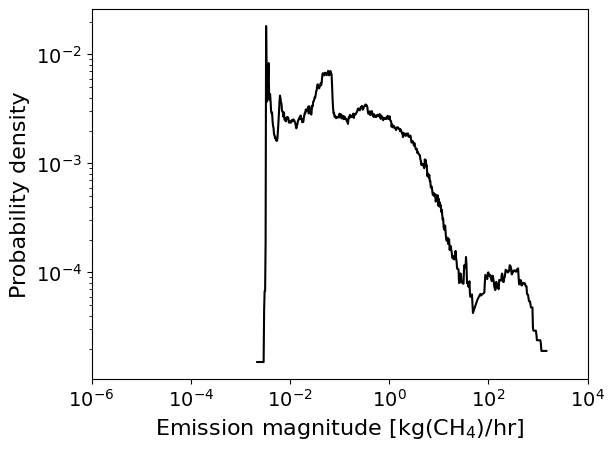

In [346]:
# x_untransformed = kairosPermian.loc[kairosPermian['Emission magnitude [kgh]'] > 0,'Emission magnitude [kgh]']
# y_untransformed = kairosPermian.loc[kairosPermian['Emission magnitude [kgh]'] > 0, 'Cumulative fraction of sites']
#kairosPermian, CMPermian2019, CMPermian2020, CMPermian2021Summer, CMPermian2021Fall
# CMCA2016, CMCA2017, CMCA2020COVID, CMCA2020, CMCA2021
# CMAppalachia2021
permian_dfs = [kairosPermian, CMPermian2019, CMPermian2020, CMPermian2021Summer, CMPermian2021Fall]
ca_dfs = [CMCA2016, CMCA2017, CMCA2020COVID, CMCA2020, CMCA2021]
dj_dss = [CMDJ2021Summer, CMDJ2021Fall]
remaining_dfs = [CMAppalachia2021, CMUinta2020, KairosBarnett]

# selected_dfs = permian_dfs
# selected_dfs = ca_dfs
# selected_dfs = dj_dss
# selected_dfs = [CMAppalachia2021]
# selected_dfs = [CMUinta2020]
selected_dfs = [KairosBarnett]
for jj in np.arange(len(selected_dfs)):
    df = selected_dfs[jj]
    # Full distributions
    x = np.log10(df.loc[df['Emission magnitude [kgh]'] > 0,'Emission magnitude [kgh]'])
    y = df.loc[df['Emission magnitude [kgh]'] > 0, 'Cumulative fraction of sites']
    partial_detect = df.loc[df['Emission magnitude [kgh]'] > 0, 'Partial detection correction [%]']

    # Simulation-only PDFs
    # x = np.log10(df.loc[df['Emission magnitude Rutherford [kgh]'] > 0,'Emission magnitude Rutherford [kgh]'])
    # y = df.loc[df['Emission magnitude Rutherford [kgh]'] > 0, 'Cumulative fraction of sites']

    # x_even_log_space, yfit_even =  ecdfToLogLogPDF (df, knot_numbers=100)
    y_interp = scipy.interpolate.interp1d(x, y)
    partial_detect_interp = scipy.interpolate.interp1d(x, partial_detect)
    xx = np.arange(x.min(), x.max(), 0.01)

    # Drops the NaN introduced at the beginning of the y.diff() and partial detect and drops the last element of x
    # plt.loglog(10**(xx[:-1]), pd.DataFrame(y_interp(xx)).diff()[0][1:], color=colors[jj])
    plt.loglog(10**(xx[:-1]), pd.DataFrame(y_interp(xx)).diff()[0][1:]*(1 + pd.DataFrame(partial_detect_interp(xx))[0][1:]), color=colors[jj])
    plt.xlim(10**-6, 10**4)
plt.xlabel('Emission magnitude [kg(CH$_4$)/hr]', fontsize=16)
plt.ylabel('Probability density', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.savefig('Permian PDF 20221105.pdf', format='pdf', bbox_inches="tight")
# plt.savefig('San Joaquin PDF 20221105.pdf', format='pdf', bbox_inches="tight")
# plt.savefig('Denver-Julesburg PDF 20221105.pdf', format='pdf', bbox_inches="tight")
# plt.savefig('Pennsylvania PDF 20221105.pdf', format='pdf', bbox_inches="tight")
# plt.savefig('Uinta PDF 20221105.pdf', format='pdf', bbox_inches="tight")
# plt.savefig('Fort Worth PDF 20221105.pdf', format='pdf', bbox_inches="tight")
plt.show()

In [341]:
# KairosBarnett
# len(10**(xx[:-1])), len(pd.DataFrame(y_interp(xx)).diff()[0][1:]), len(pd.DataFrame(partial_detect_interp(xx))[0][1:])

(584, 584, 584)

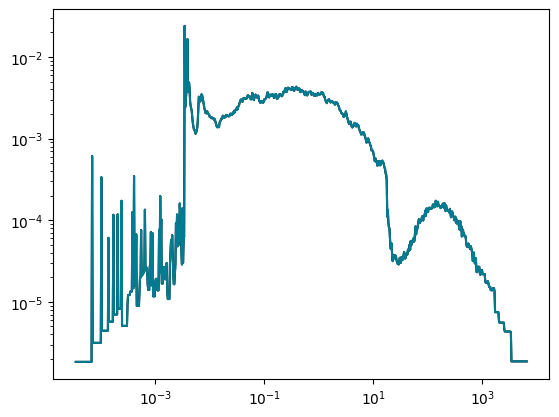

In [295]:
df = kairosPermian
x = np.log10(df.loc[df['Emission magnitude [kgh]'] > 0,'Emission magnitude [kgh]'])
y = df.loc[df['Emission magnitude [kgh]'] > 0, 'Cumulative fraction of sites']
partial_detect = df.loc[df['Emission magnitude [kgh]'] > 0, 'Cumulative fraction missed partial detect sites']

# Simulation-only PDFs
# x = np.log10(df.loc[df['Emission magnitude Rutherford [kgh]'] > 0,'Emission magnitude Rutherford [kgh]'])
# y = df.loc[df['Emission magnitude Rutherford [kgh]'] > 0, 'Cumulative fraction of sites']

# x_even_log_space, yfit_even =  ecdfToLogLogPDF (df, knot_numbers=100)
y_interp = scipy.interpolate.interp1d(x, y)
partial_detect_interp = scipy.interpolate.interp1d(10**x, partial_detect)
xx = np.arange(x.min(), x.max(), 0.01)
plt.loglog(10**(xx[:-1]), pd.DataFrame(y_interp(xx)).diff()[0][1:], color=colors[0])
plt.loglog(10**(xx[:-1]), pd.DataFrame(y_interp(xx)).diff()[0][1:]*(1 - pd.DataFrame(partial_detect_interp(10**xx)).diff()[0][1:]), color=colors[1])
# pd.DataFrame(y_interp(xx[580:600])).diff()[0][1:]*(1-pd.DataFrame(partial_detect_interp(10**xx[580:600])).diff()[0][1:])
# 10**xx[580:600], (1-pd.DataFrame(partial_detect_interp(10**xx[580:600])).diff()[0][1:])
# partial_detect_interp(xx)
# xx

In [312]:
offset = 200
partial_detect[partial_detect.shape[0]-20-offset:partial_detect.shape[0]-offset]

17736    0.000594
17737    0.000549
17738    0.000509
17739    0.000470
17740    0.000434
17741    0.000400
17742    0.000368
17743    0.000339
17744    0.000311
17745    0.000286
17746    0.000263
17747    0.000241
17748    0.000220
17749    0.000201
17750    0.000183
17751    0.000166
17752    0.000151
17753    0.000136
17754    0.000123
17755    0.000111
Name: Cumulative fraction missed partial detect sites, dtype: float64

In [ ]:
df = CMCA2016
x = np.log10(df.loc[df['Emission magnitude [kgh]'] > 0,'Emission magnitude [kgh]'])
y = df.loc[df['Emission magnitude [kgh]'] > 0, 'Cumulative fraction of sites']

# x_even_log_space, yfit_even =  ecdfToLogLogPDF (df, knot_numbers=100)
y_interp = scipy.interpolate.interp1d(x, y)
xx = np.arange(x.min(), x.max(), 0.01)

# Drops the NaN introduced at the beginning of the y.diff() and drops the last element of x for consistency
plt.loglog(10**(xx[:-1]), pd.DataFrame(y_interp(xx)).diff()[0][1:])
# plt.loglog(10**(xx[:-1]), pd.DataFrame(y_interp(xx)).diff()[0][1:].cumsum().max() - pd.DataFrame(y_interp(xx)).diff()[0][1:].cumsum())
# plt.loglog(10**(xx[:-1]), 1 - pd.DataFrame(y_interp(xx)).diff()[0][1:].cumsum())
# plt.loglog(10**x, 1 - y)
# yfit_even.diff()
# plt.plot(x_even_log_space, yfit_even.diff()[0])
# plt.plot(x_even_log_space, yfit_even)
plt.xlim(10**-6, 10**4)

In [162]:
# pd.DataFrame(y_interp(xx)).diff()[0][1:].cumsum().max()
pd.DataFrame(y_interp(xx)).diff()[0][1:].cumsum().max()

0.9613123418916111

In [131]:
pd.DataFrame(y_interp(xx)).diff()[0][1:].cumsum().max()

1.103945123244866

In [ ]:
# ax = plt.gca()

plt.plot(x, yfit)
plt.plot(x, y, linewidth=2, color=colors[0], linestyle='solid')

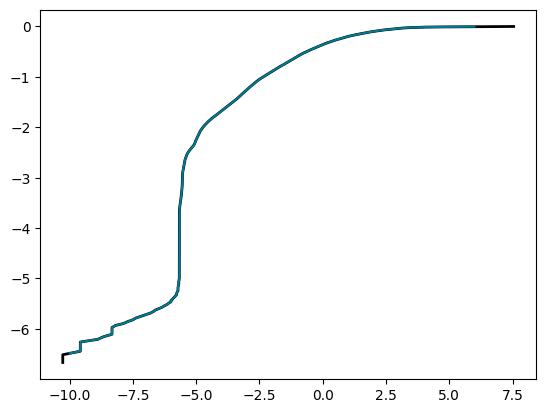

In [19]:
y_interp = scipy.interpolate.interp1d(x, y)

#find y-value associated with x-value of 13
xx = np.arange(-10, 6.01, 0.01)
plt.plot(x, y, linewidth=2, color=colors[0], linestyle='solid')
plt.plot(xx, y_interp(xx), color=colors[1])


In [ ]:
# Adapted from https://fda.readthedocs.io/en/stable/auto_examples/plot_kernel_smoothing.html#sphx-glr-auto-examples-plot-kernel-smoothing-py
fd = pd.DataFrame({'xx':xx, 'y_interp':pd.DataFrame(y_interp(xx)).diff()[0]})
scale_factor = (
    (fd.domain_range[0][1] - fd.domain_range[0][0])
    / len(fd.grid_points[0])
)



In [112]:
import itertools
fd_os.grid_points[0],  fd_os.data_matrix[0][:, 0].transpose()# np.array(list(itertools.chain(*fd_os.data_matrix))).transpose()

(array([-9.99, -9.98, -9.97, ...,  5.98,  5.99,  6.  ]),
 array([9.95356736e-04, 9.95356736e-04, 9.95356736e-04, ...,
        3.96109603e-05, 3.94481264e-05, 3.94233805e-05]))

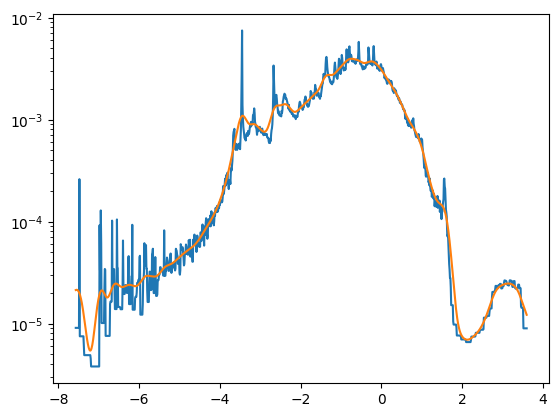

In [158]:
# fig, ax = plt.gca()
# Removes the NaN introduced by differencing
fd_grid = FDataGrid(pd.DataFrame(y_interp(xx)).diff()[0][1:], xx[1:])
fd_os = ks.NadarayaWatsonSmoother(smoothing_parameter=0.1,).fit_transform(fd_grid)
# fd_os = KernelSmoother(kernel_estimator=NadarayaWatsonHatMatrix(bandwidth=1),
#                        ).fit_transform(fd)
# fd_grid
# fd_os.plot()
plt.semilogy(xx[1:], pd.DataFrame(y_interp(xx)).diff()[0][1:])
plt.semilogy(fd_os.grid_points[0], fd_os.data_matrix[0][:, 0].transpose())
# plt.semilogy(fd_grid.grid_points[0], fd_grid.data_matrix[0][:, 0].transpose())
# plt.xlim(-5, 6)
# plt.plot(xx, pd.DataFrame(y_interp(xx)).diff()[0])

Plot midstream emission cumulative emissions function

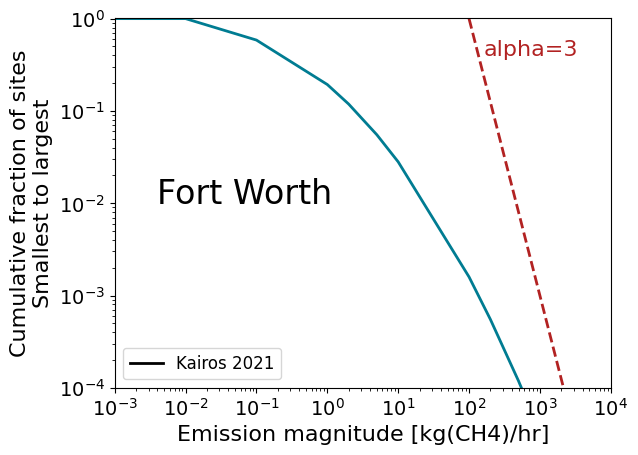

In [348]:
# Cumulative loglog midstream emissions Fort Worth

ax = plt.gca()

# Loglog of full distribution
plt.loglog(KairosBarnettMidstream['Emission magnitude [kgh]'], 1 - KairosBarnettMidstream['Cumulative fraction of sites'], linewidth=2, color=colors[0], linestyle="solid")

# Min detected
# plt.axvline(BarnettMinDetected, color=colors[0], linestyle="--", lw=1, label="CM min detected")
# plt.text(10**2.9, 0.8, 'Kairos\n min detected', size=14, color='black', rotation=0, ha='center')

# Fraction sites emitting
# plt.text(10**3.2, 0.35, str("{:.2%}".format(BarnettFracEmitting)) + '\n of sites', size=14, color=colors[2], rotation=0, ha='center')

# Lognormal fit
# BarnettLogNormal = scipy.stats.lognorm.fit(KairosBarnett['Emission magnitude [kgh]'])
BarnettLogNormal = scipy.stats.lognorm.fit(KairosBarnett.loc[KairosBarnett['Emission magnitude [kgh]'] >= 10**-2, 'Emission magnitude [kgh]'])
xx = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1, 2, 5, 10, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 30000, 40000, 50000, 70000, 80000, 100000, 500000, 1000000]
lognormCdfNMAll = scipy.stats.lognorm.cdf(x=xx, s=BarnettLogNormal[0], loc=BarnettLogNormal[1], scale=BarnettLogNormal[2])
plt.loglog(xx, 1 - lognormCdfNMAll, linewidth=2, color=colors[1])

# Power law approximation
plt.loglog([10**2, 10**4], [10**0, 10**-6],color='firebrick',
         linestyle='dashed',linewidth=2)
ax.text(10**2.2, 10**-0.4, 'alpha=3', fontsize=16, color='firebrick', rotation='horizontal')

plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
plt.ylabel('Cumulative fraction of sites\nSmallest to largest', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_ylim(0.0001, 1.01)
# ax.set_ylim(10**-1, 10**0)
ax.set_xlim(10**-3, 10**4)
plt.legend(['Kairos 2021'],
           loc='lower left', fontsize=12)
plt.text(10**-2.4, 10**-2, 'Fort Worth', fontsize=24, color='black', rotation=0, ha='left')

# plt.semilogx(CMUinta2020['Emission magnitude [kgh]'], CMUinta2020['Cumulative emissions fraction [%]'], linewidth=2, color="black")
# ax.axvline(KairosMinDetect, color="saddlebrown", linestyle="--", lw=2, label="Kairos min detect")
# ax.axvline(KairosFullDetect, color="saddlebrown", linestyle="--", lw=2, label="Kairos full detect")
# plt.savefig('Fort Worth midstream distribution loglog 20221106.pdf', format='pdf', bbox_inches="tight")
plt.show()

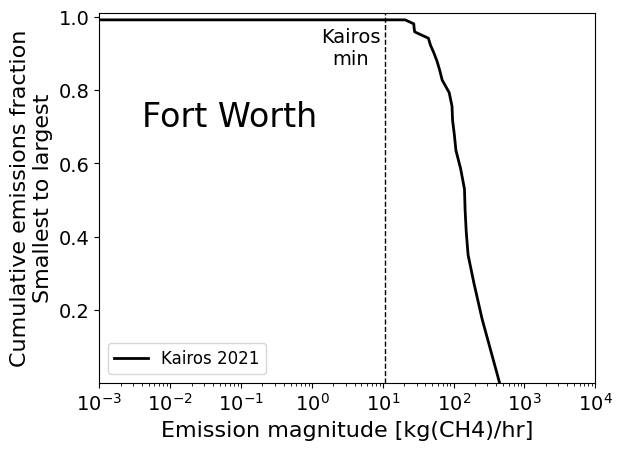

In [353]:
# Cumulative emissions Fort Worth

ax = plt.gca()

# Main plot
plt.semilogx(KairosBarnettMidstream['Emission magnitude [kgh]'], KairosBarnettMidstream['Cumulative emissions fraction [%]'], linewidth=2, color=colors[0], linestyle="solid")
plt.semilogx(KairosBarnettMidstream['Emission magnitude [kgh]'], KairosBarnettMidstream['Cumulative emissions fraction [%]'], linewidth=2, color=colors[1], linestyle="solid")
plt.xlabel('Emission magnitude [kg(CH4)/hr]', size=16)
plt.ylabel('Cumulative emissions fraction\nSmallest to largest', size=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_ylim(0.001, 1.01)
ax.set_xlim(10**-3, 10**4)
plt.legend(['Kairos 2021'],
           loc='lower left', fontsize=12)
plt.text(10**-2.4, 0.7, 'Fort Worth', fontsize=24, color='black', rotation=0, ha='left')

# Min detected
plt.axvline(BarnettMinDetected, color=colors[0], linestyle="--", lw=1, label="CM min detected")
plt.text(10**0.55, 0.87, 'Kairos\nmin', size=14, color='black', rotation=0, ha='center')

# plt.semilogx(CMUinta2020['Emission magnitude [kgh]'], CMUinta2020['Cumulative emissions fraction [%]'], linewidth=2, color="black")
# ax.axvline(KairosMinDetect, color="saddlebrown", linestyle="--", lw=2, label="Kairos min detect")
# ax.axvline(KairosFullDetect, color="saddlebrown", linestyle="--", lw=2, label="Kairos full detect")
plt.savefig('Fort Worth midstream distribution 2022106.pdf', format='pdf', bbox_inches="tight")
# plt.show()